In [97]:
# from css_utility import *
from css_utility_working import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from motif_utils import kmer2seq

In [98]:
mat_path="../database/ft_result/pred/4_compNg/atten.npy"
dev_path="../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv"

In [99]:
mat_path="../database/ft_result/pred/4_compNg/atten.npy"
dev_path="../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv"

In [100]:
pred_path="../database/ft_result/prom/up2kdown4k/gene_exp/4mer/atten_mat/rpkm0_n_rpkm50/pred_results.npy"
pred=np.load(pred_path)

In [101]:
pred

array([0.02869045, 0.97501737, 0.6317053 , 0.9155265 , 0.9435043 ,
       0.23325393, 0.05823139, 0.9342135 , 0.97709   , 0.9896945 ,
       0.67107755, 0.9815933 , 0.09206646, 0.25839046, 0.01060762,
       0.9749605 , 0.09206646, 0.4256211 , 0.98148215, 0.01556844,
       0.09206646, 0.05690273, 0.09206646, 0.9903323 , 0.03841122,
       0.6364244 , 0.05823139, 0.00966577, 0.41879177, 0.98975605,
       0.56065285, 0.09206646, 0.00948538, 0.09206646, 0.9864281 ,
       0.0182617 , 0.63617444, 0.9902755 , 0.89502305, 0.41879177,
       0.19620064, 0.8734445 , 0.01420947, 0.07892045, 0.17908095,
       0.8734445 , 0.8734445 , 0.9909991 , 0.08411626, 0.8734445 ,
       0.9898981 , 0.08928513, 0.09206646, 0.20912114, 0.9890274 ,
       0.89601564, 0.11797391, 0.58151424, 0.99034005, 0.9883979 ,
       0.04561673, 0.99054515, 0.04408791, 0.99052143, 0.09206646,
       0.9894104 , 0.09206646, 0.26877692, 0.01845793, 0.9905676 ,
       0.09206646, 0.08481442, 0.01177054, 0.9897664 , 0.62086

In [102]:
atten_raw=np.load(mat_path)
atten=pd.DataFrame(atten_raw)

dev_raw=dev_conv(dev_file_path) #dev_conv is a function in css_utility
dev=dev_raw[["ori_seq","label"]]
dev.reset_index(drop=True, inplace=True)  # remove the header

NameError: name 'dev_file_path' is not defined

In [ ]:
atten["label"] = dev["label"].values

In [ ]:
dev

ori_seq  label
0    GGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...      0
1    OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...      0
2    OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...      0
3                                         JJJJJJKKLLLL      1
4    GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGNLLJJJAABGNNNN...      1
..                                                 ...    ...
995  OOOOOOOGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...      0
996  AAAAAAAAAEEEGBGGEEEEEEEDDDDDDDDDDDDDDDDDDDDDDD...      1
997                                               NNNG      1
998                        DEEEEEEEEEEEEEEEEEEEEEEEEEB      1
999        OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO      0

[1000 rows x 2 columns]

In [ ]:
sum(atten.iloc[500])

8.945449748147963

In [ ]:
def get_matWcss(mat_path,dev_path):
    atten_raw=np.load(mat_path)
    atten=pd.DataFrame(atten_raw)
    dev_raw=dev_conv(dev_path) #dev_conv is a function in css_utility
    dev=dev_raw[["ori_seq","label"]]
    dev.reset_index(drop=True, inplace=True)  # remove the header
    
    dev_label_1=dev[dev["label"]==1]
    dev_label_0=dev[dev["label"]==0]

    atten["label"] = dev["label"].values
    atten_label_1=atten[atten["label"]==1]
    dev_label_1.pop("label") # remove the label column
    atten_label_1.pop("label") # remove the label column
    atten_label_0=atten[atten["label"]==0]
    dev_label_0.pop("label") # remove the label column
    atten_label_0.pop("label") # remove the label column
    
    assert len(dev_label_1)==len(atten_label_1)
    assert len(dev_label_0)==len(atten_label_0)
    
    all_dict_1={i:(dev_label_1.loc[i], atten_label_1.loc[i]) for i in dev_label_1.index}
    all_dict_0={i:(dev_label_0.loc[i], atten_label_0.loc[i]) for i in dev_label_0.index}

    ### to use, apply following 
#     for index, (dev_entry, atten_entry) in list(atten_dict_1.items()):
#         dev_tar=dev_entry['ori_seq']
#         atten_tar=atten_entry.values
    
    return all_dict_1, all_dict_0

In [ ]:
mat_path="../database/ft_result/pred/4_compNg/atten.npy"
dev_path="../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv"

In [ ]:
all_dict_1, all_dict_0=get_matWcss(mat_path,dev_path)

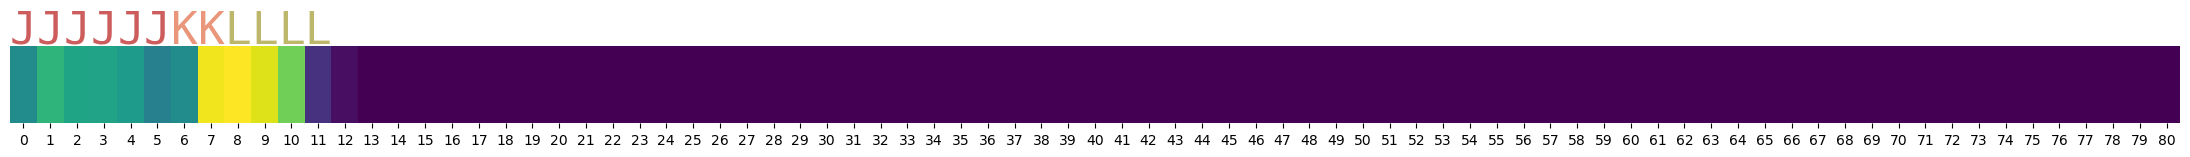

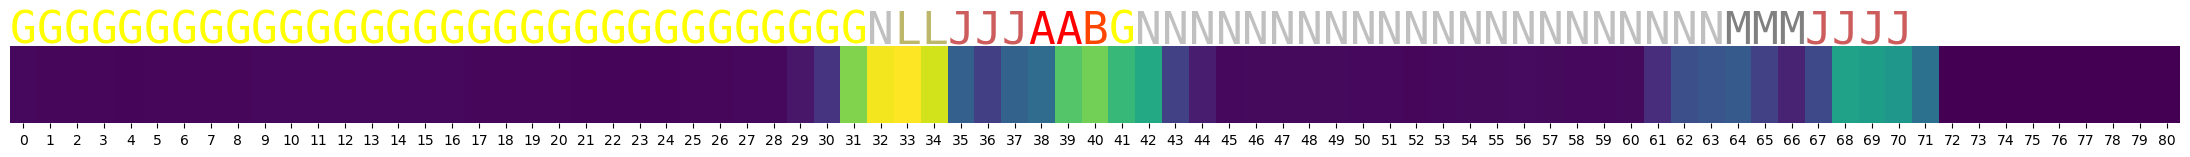

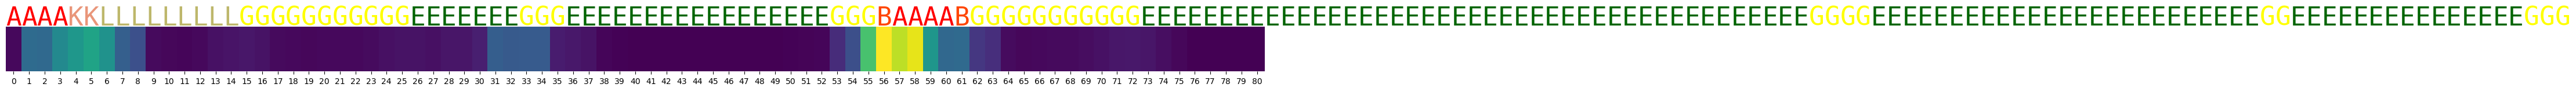

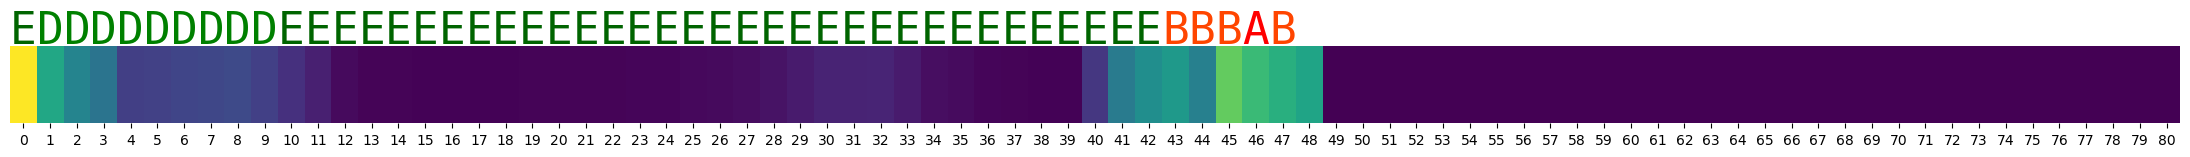

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

for index, (dev_entry, atten_entry) in list(atten_dict_1.items()):
    if index >= 10:
        break
    dev_tar = dev_entry['ori_seq']
    atten_tar = atten_entry.values.reshape(-1, 1).T  # Reshape to 2D array for heatmap

    plt.figure(figsize=(28, 1))  # Increased height to give space for text

    # Add colored text for each letter in dev_tar above where the heatmap will be
    for i, letter in enumerate(dev_tar):
        plt.text(i+0.5, -0.2, letter, color=state_col_dict.get(letter, 'black'),
                 ha='center', va='center', fontsize=32, family='monospace')
    sns.heatmap(data=atten_tar, cmap="viridis", yticklabels=False, cbar=False)

    plt.show()  # Display the figure

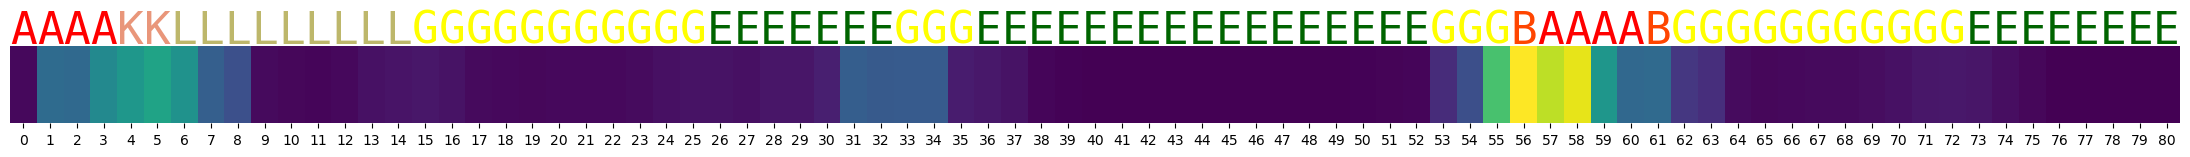

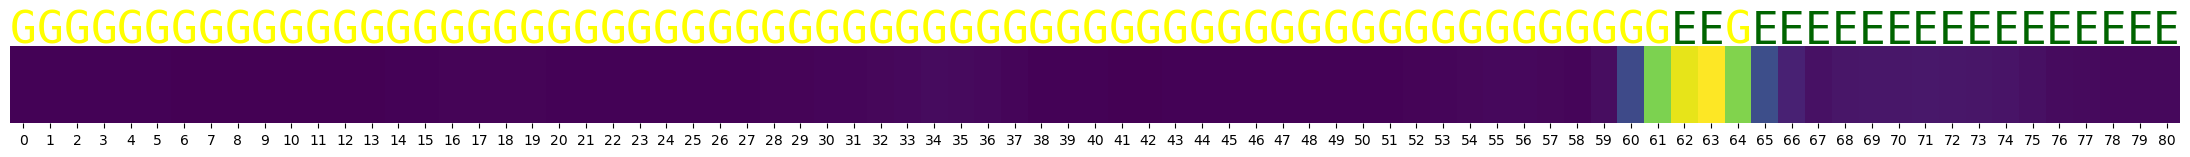

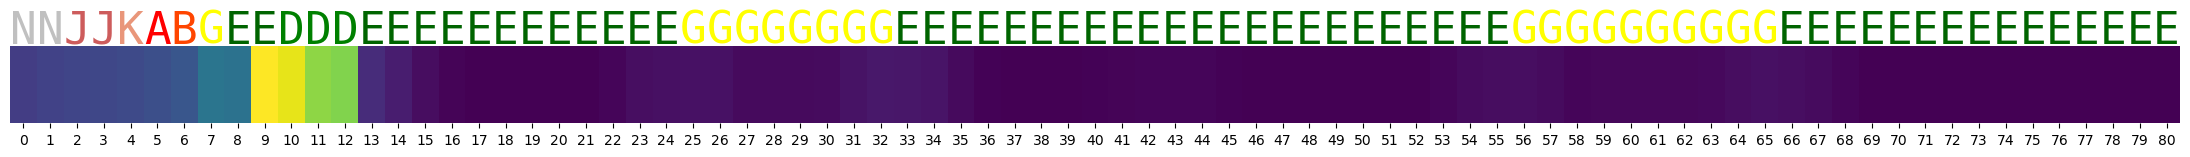

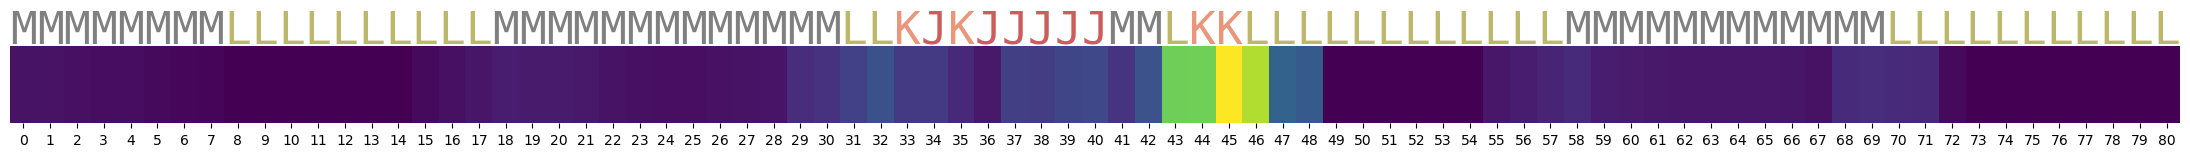

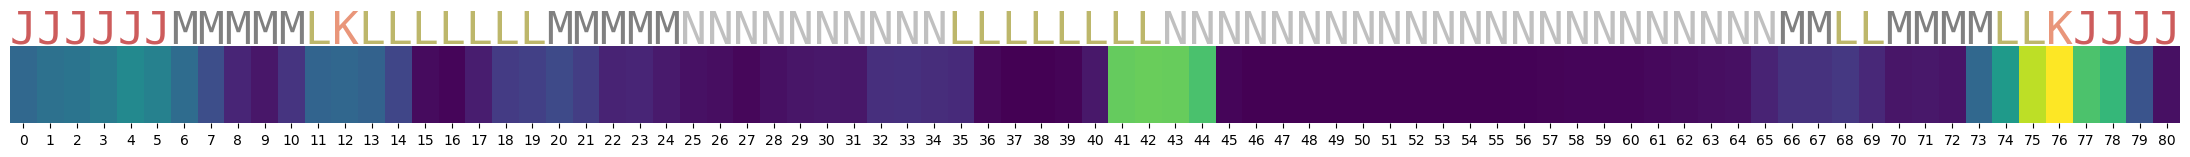

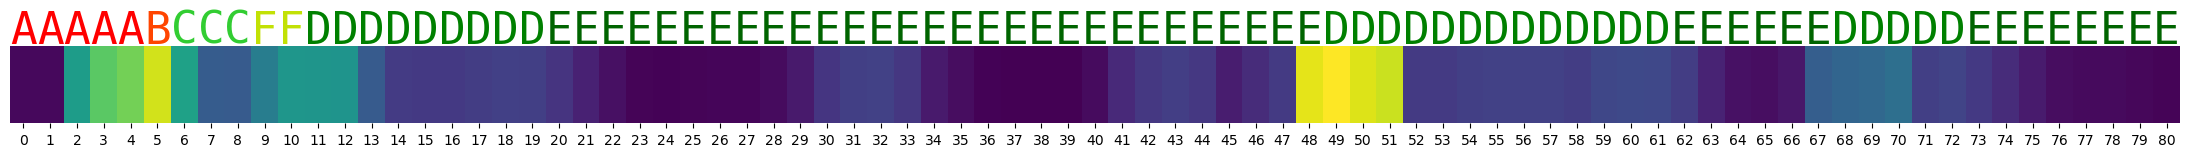

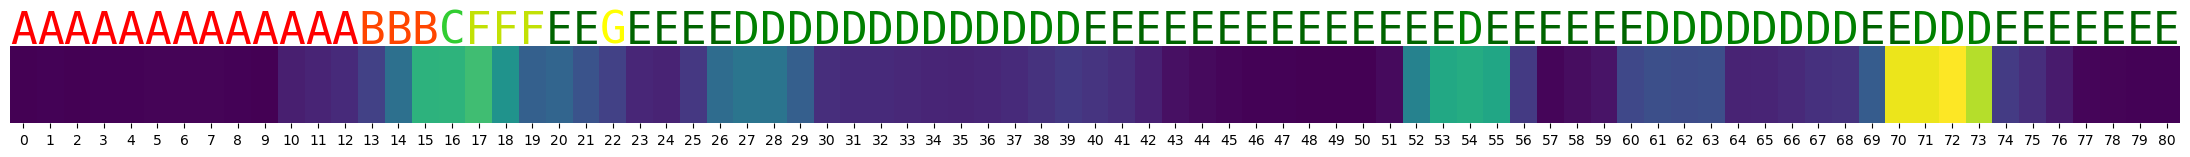

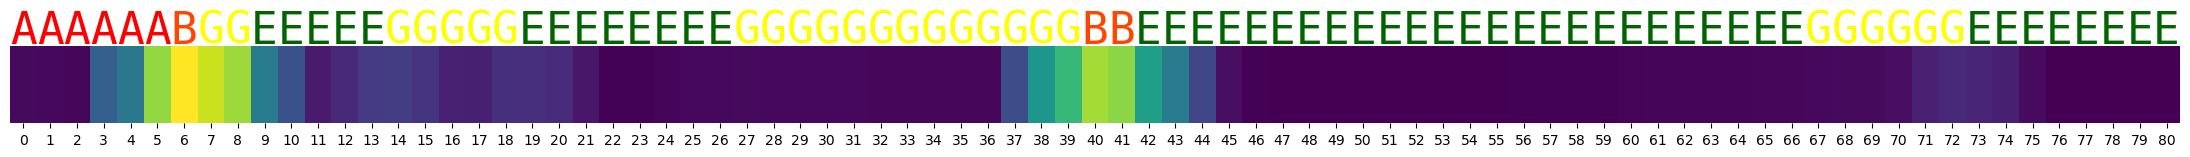

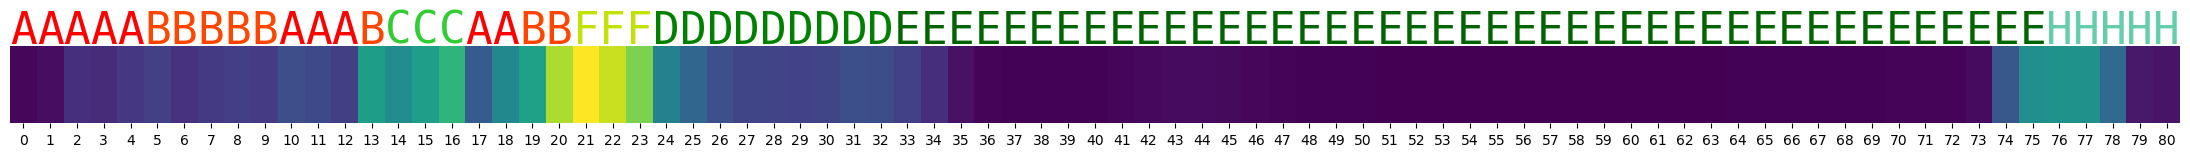

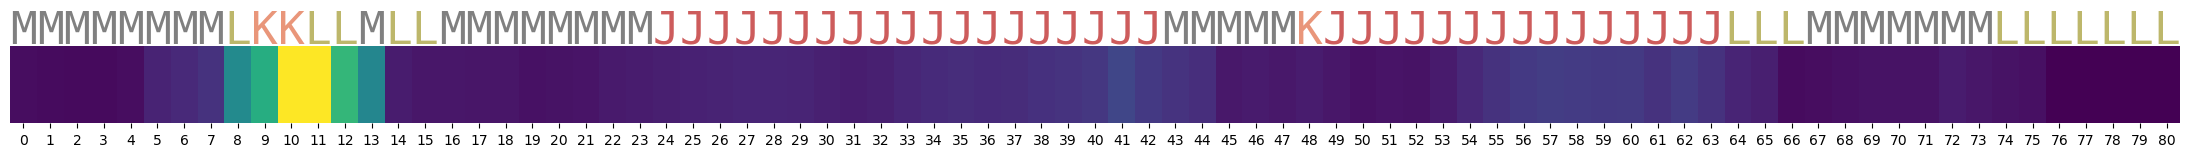

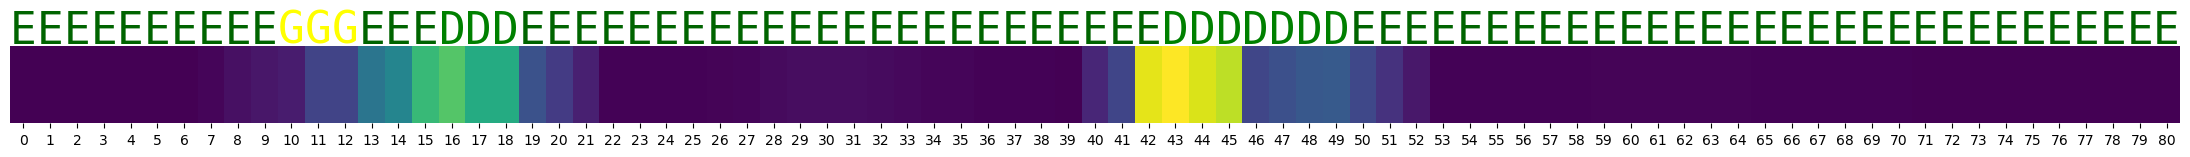

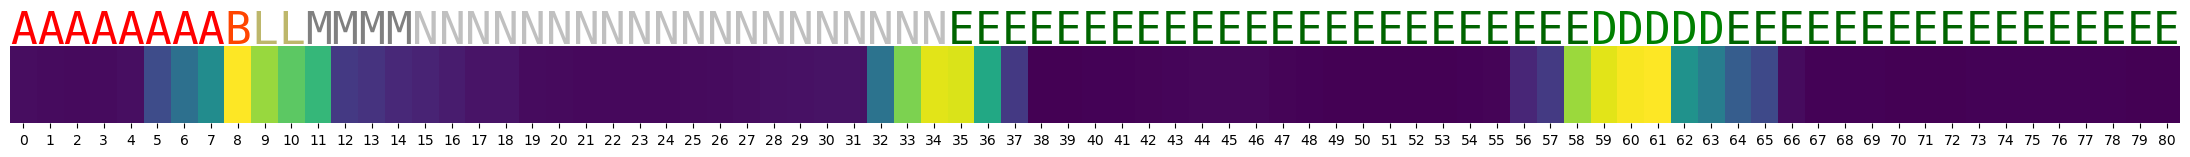

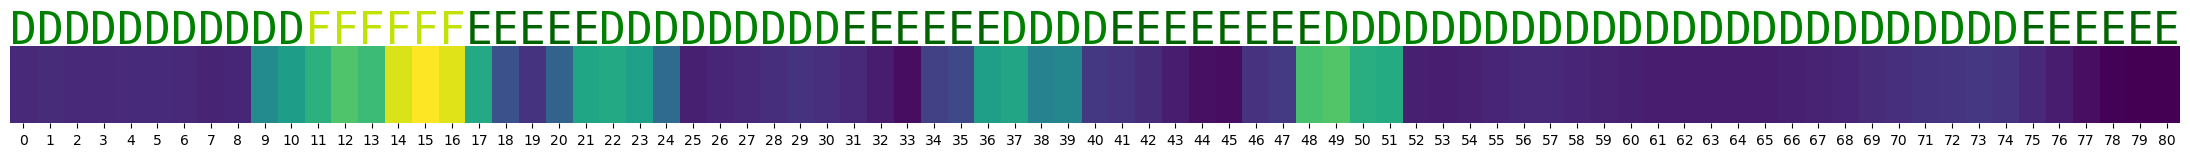

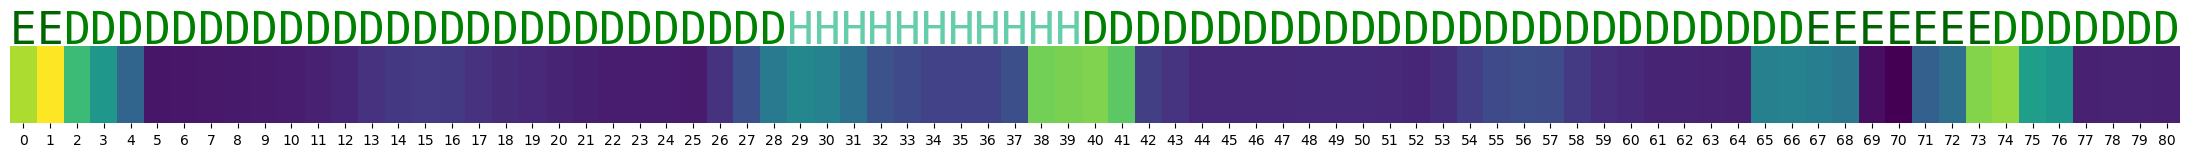

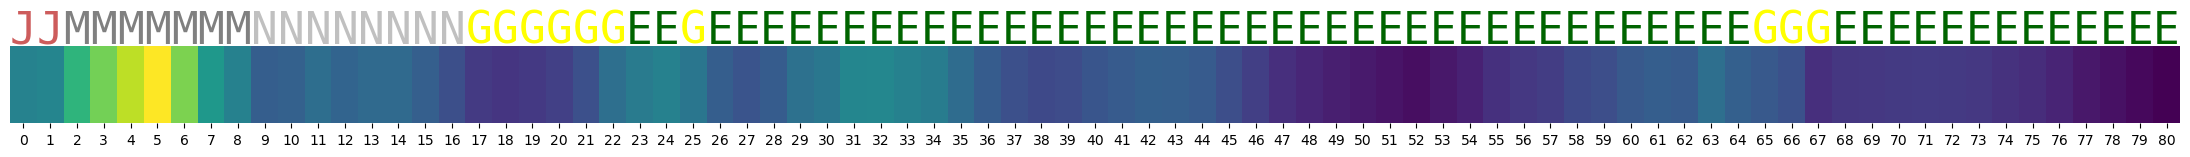

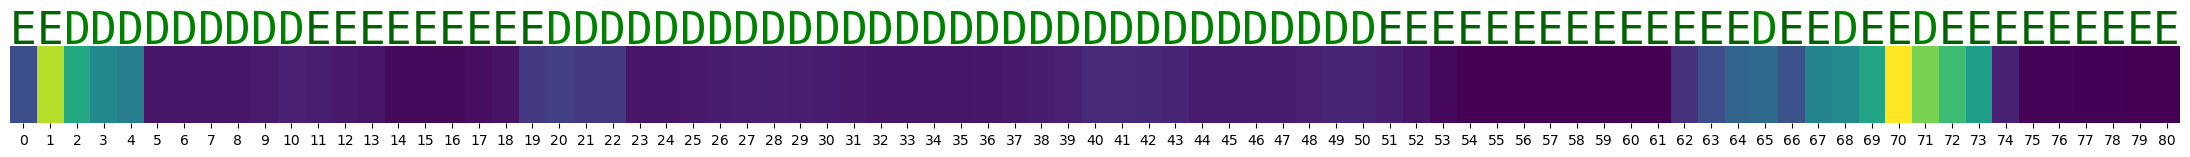

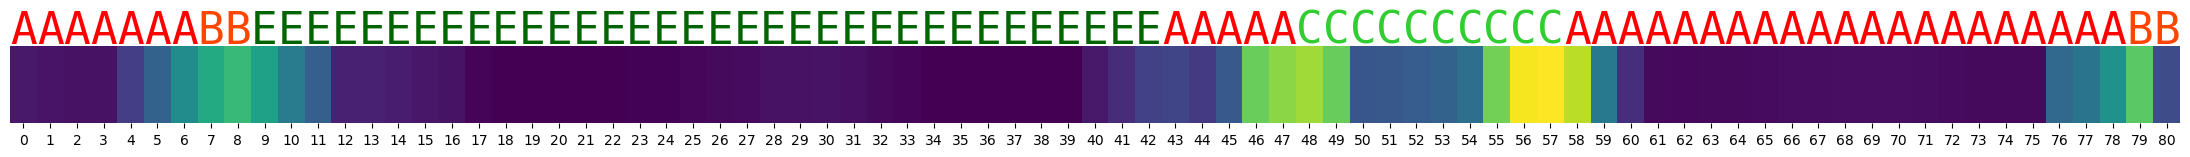

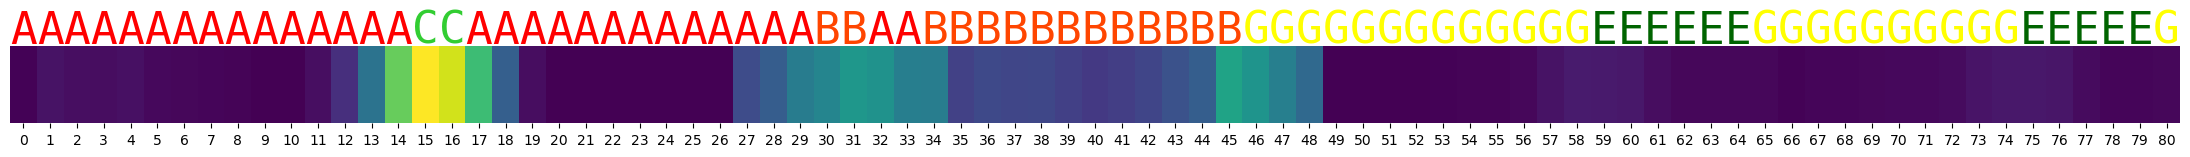

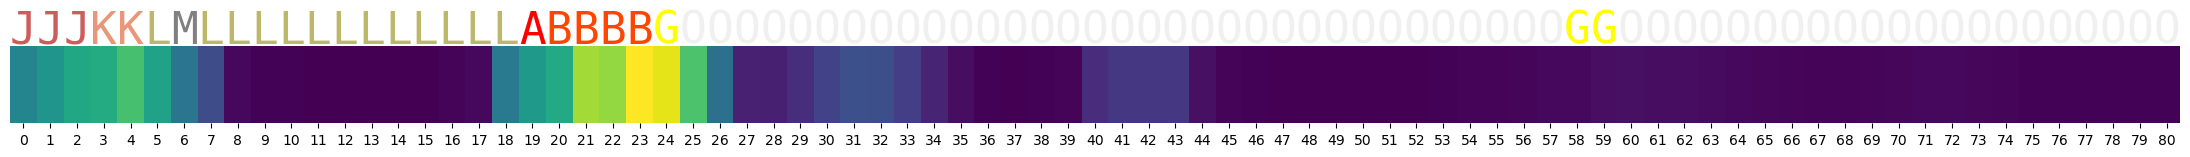

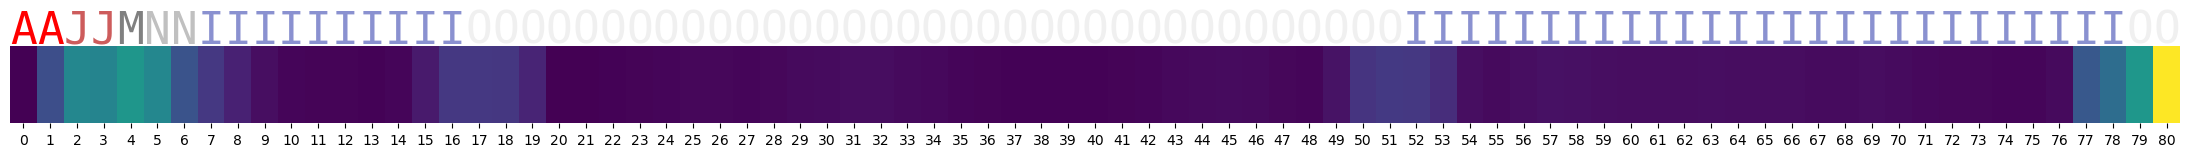

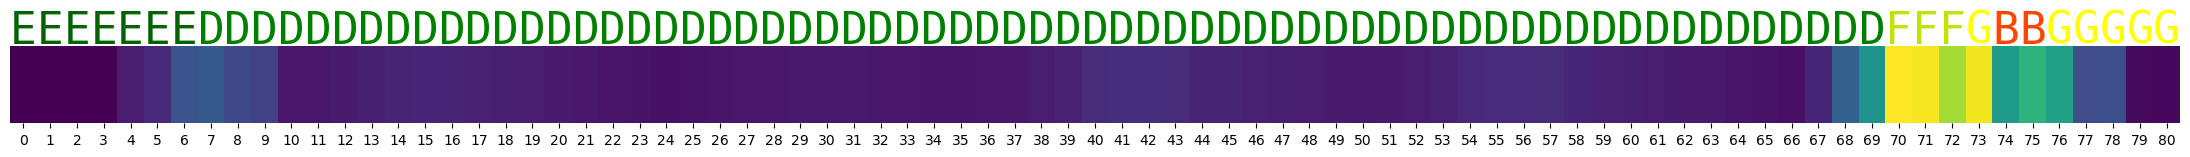

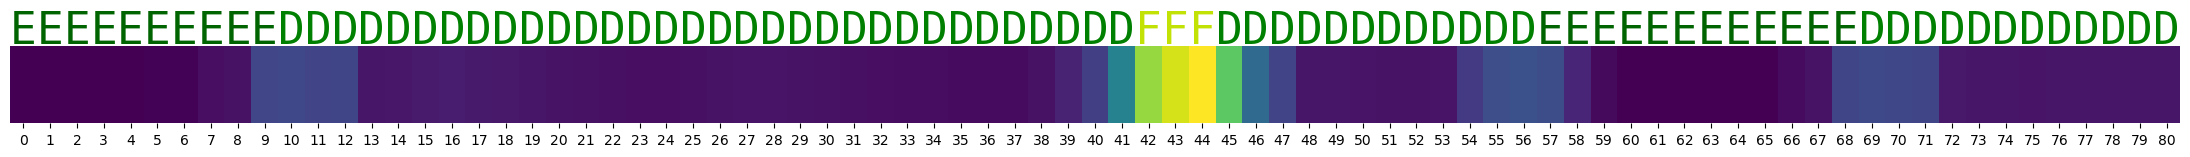

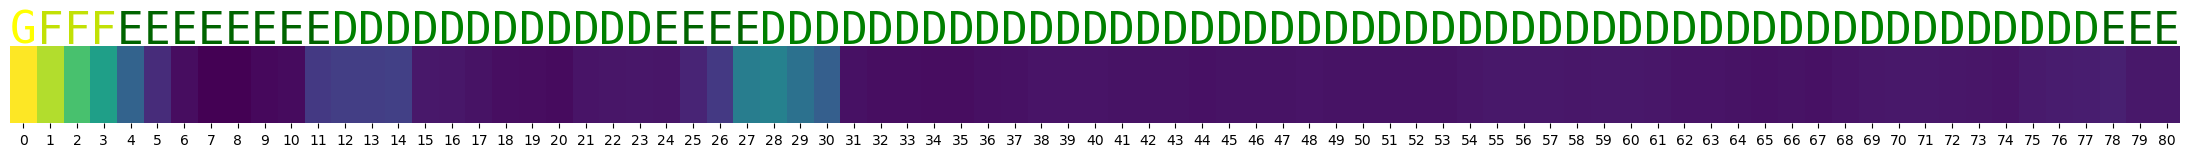

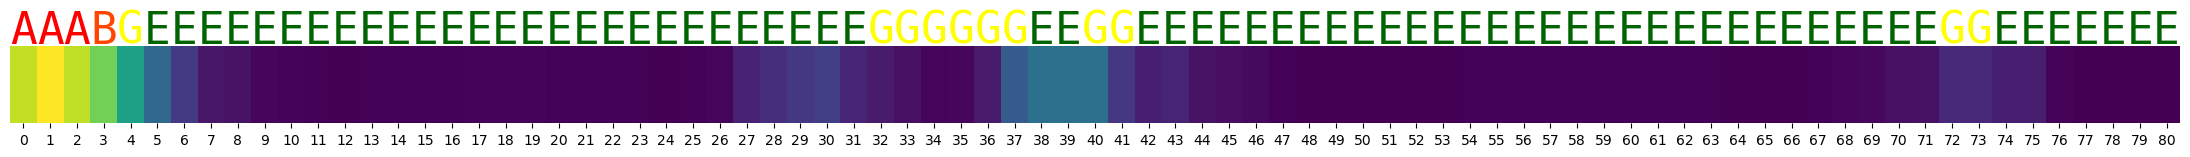

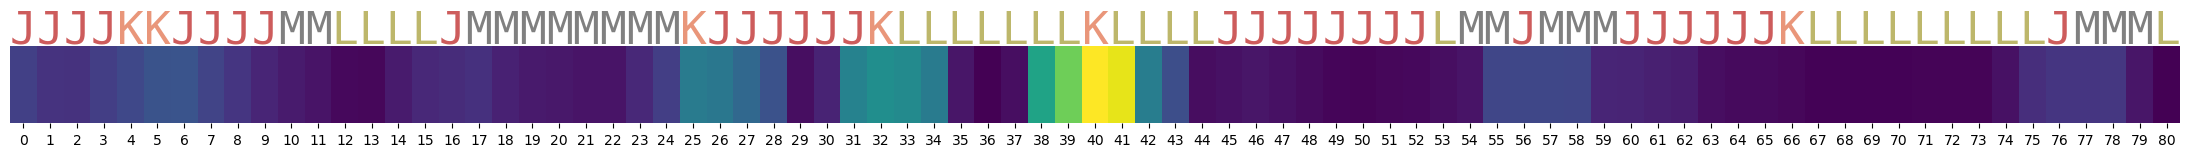

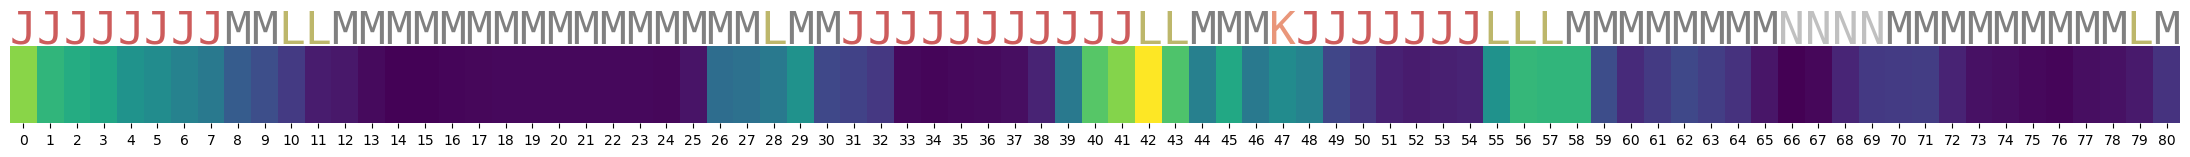

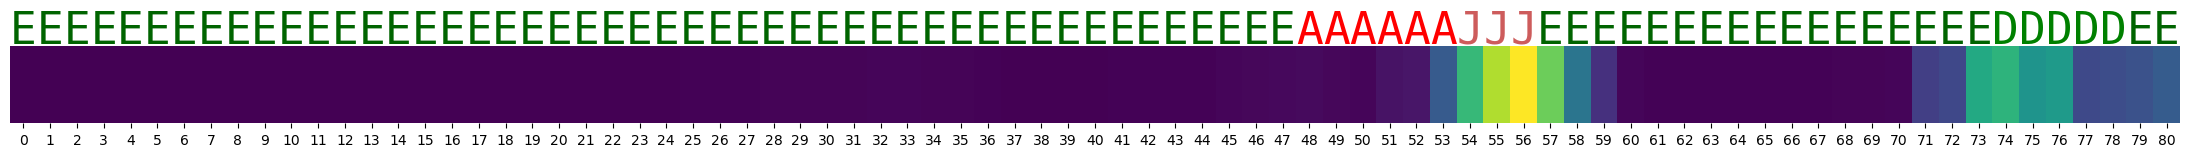

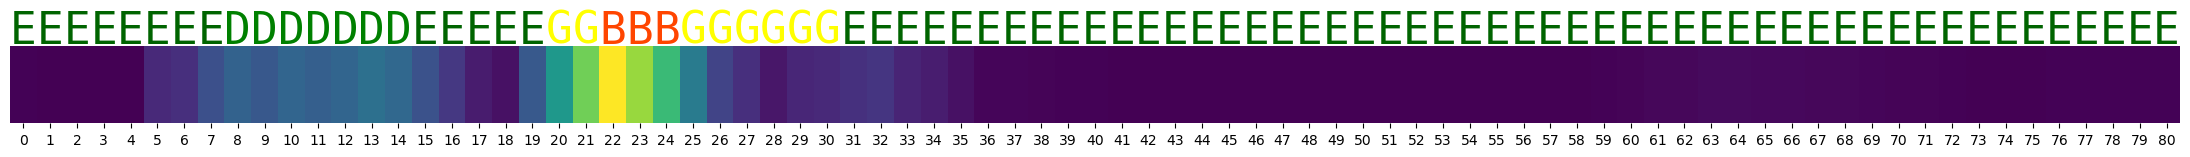

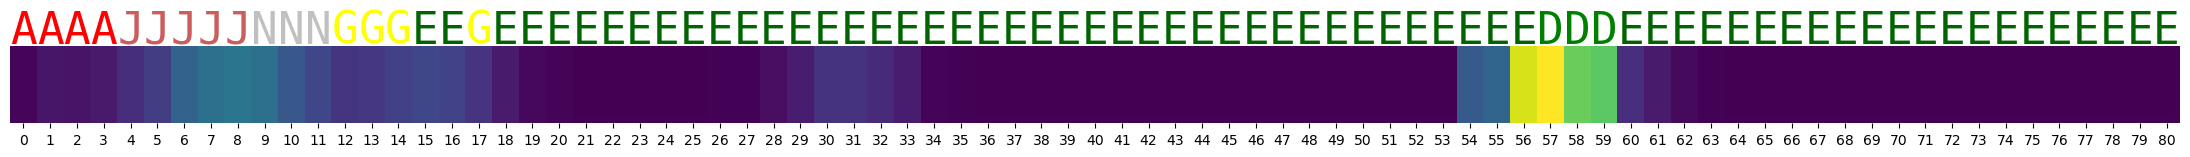

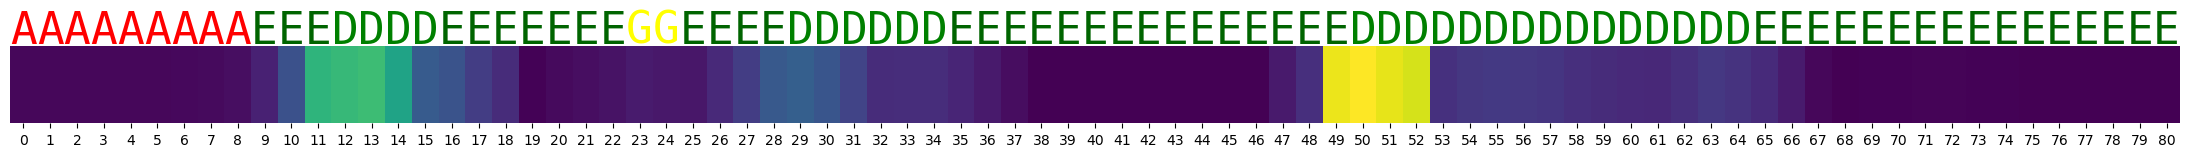

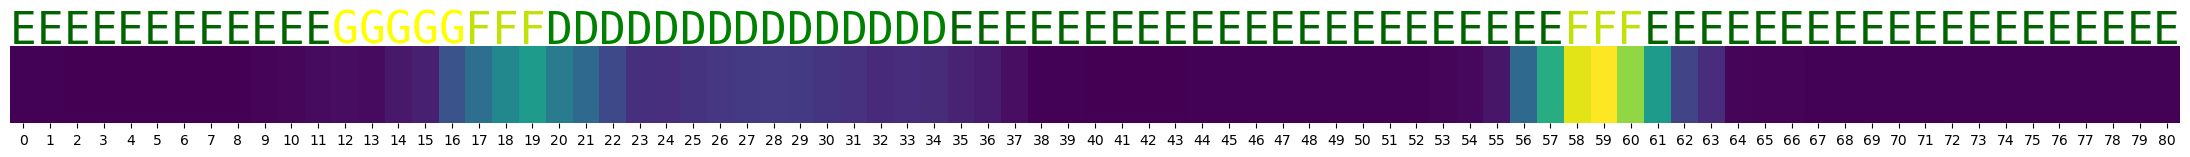

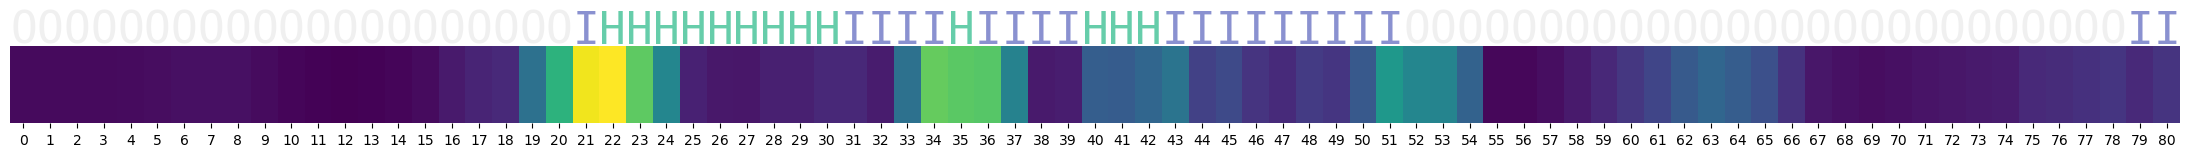

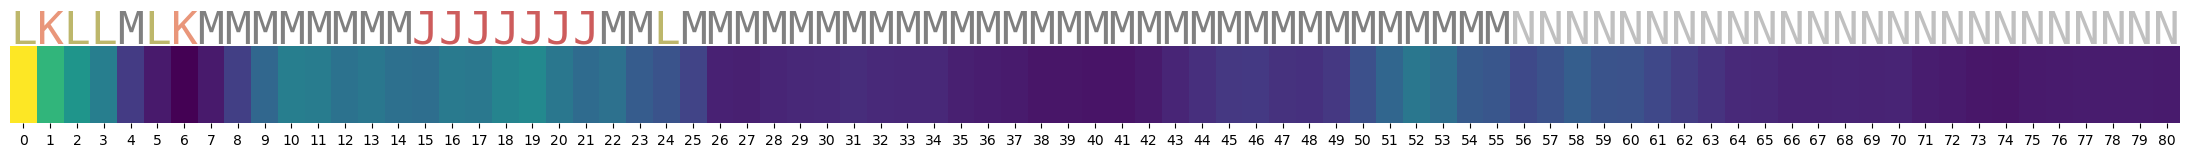

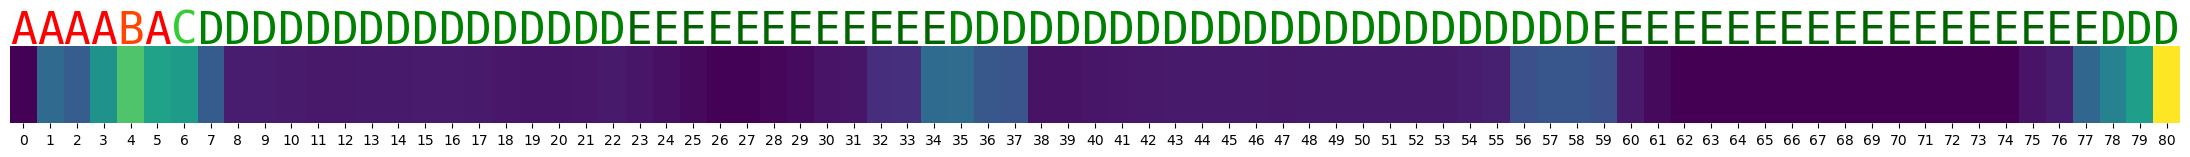

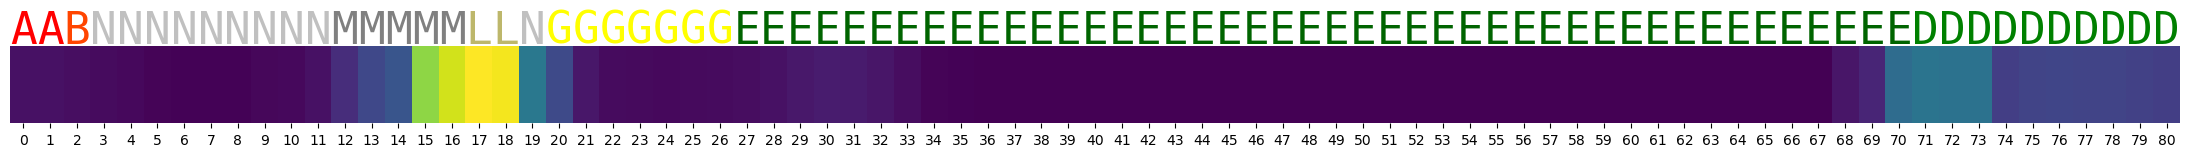

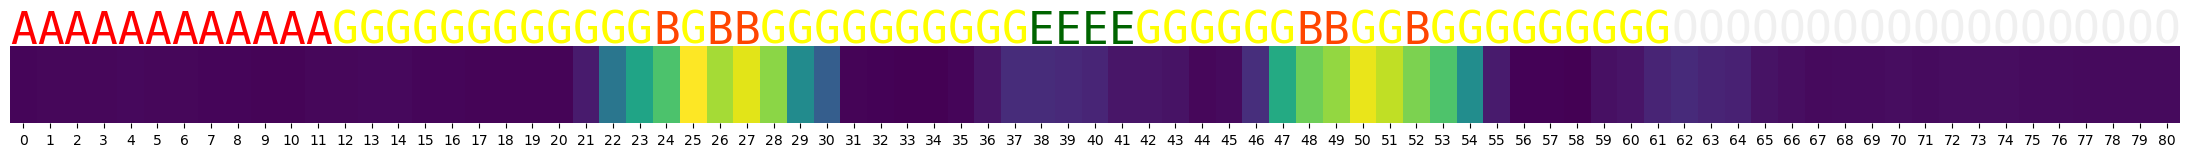

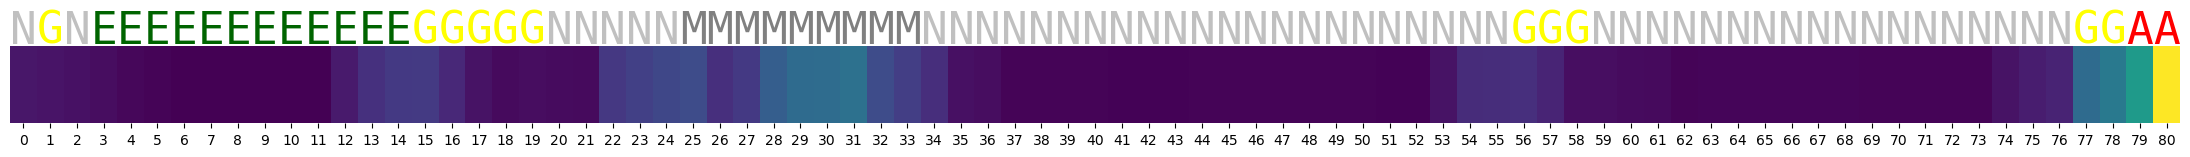

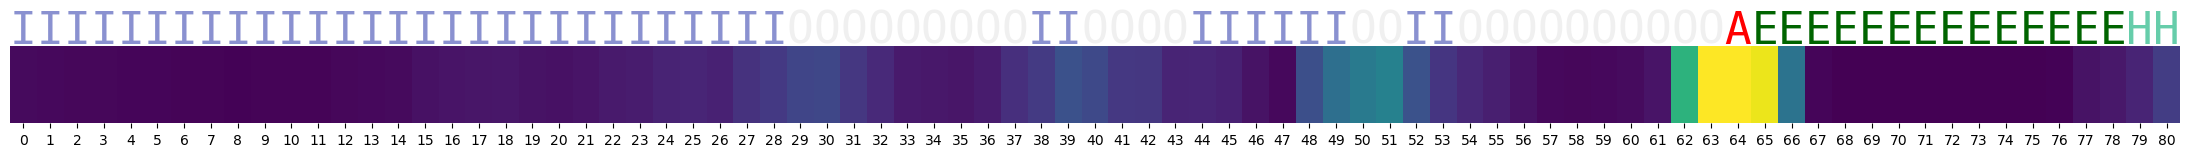

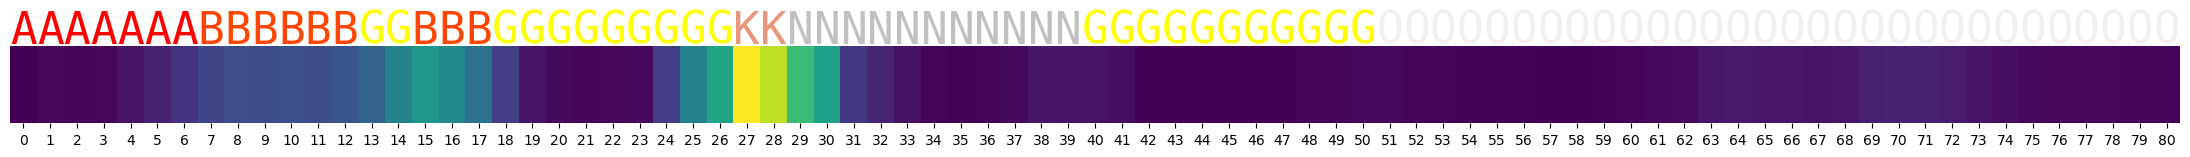

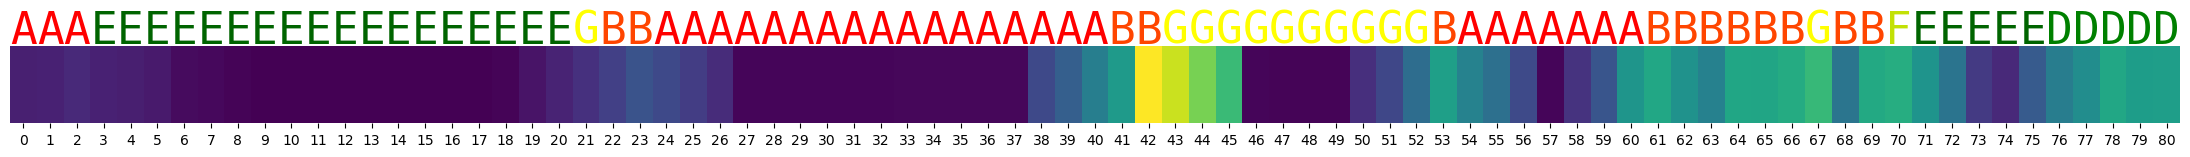

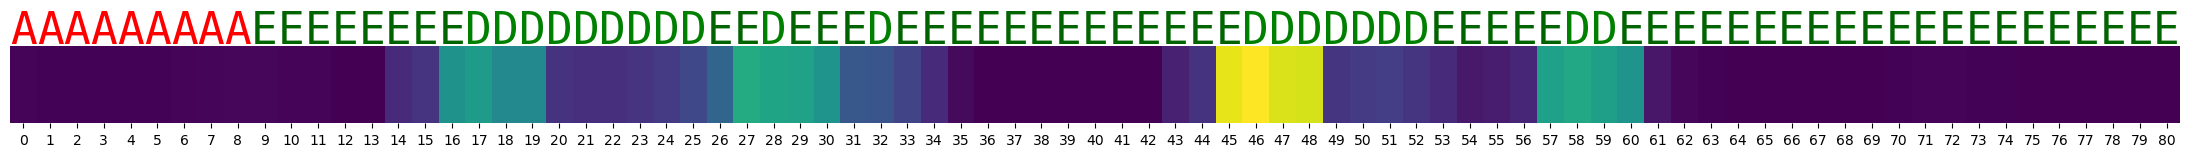

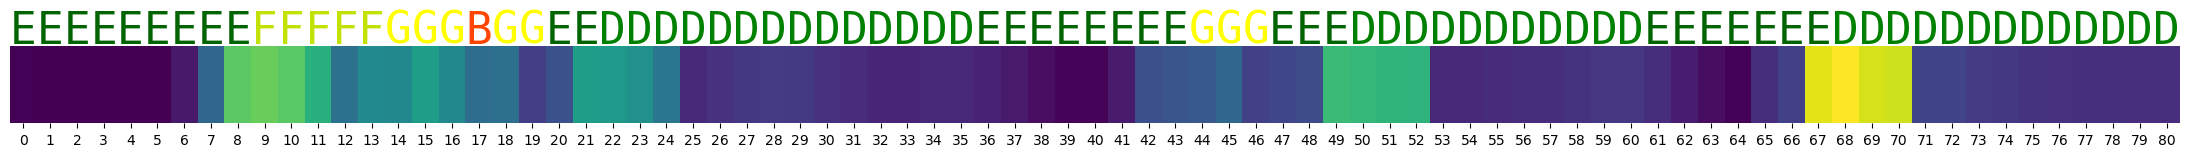

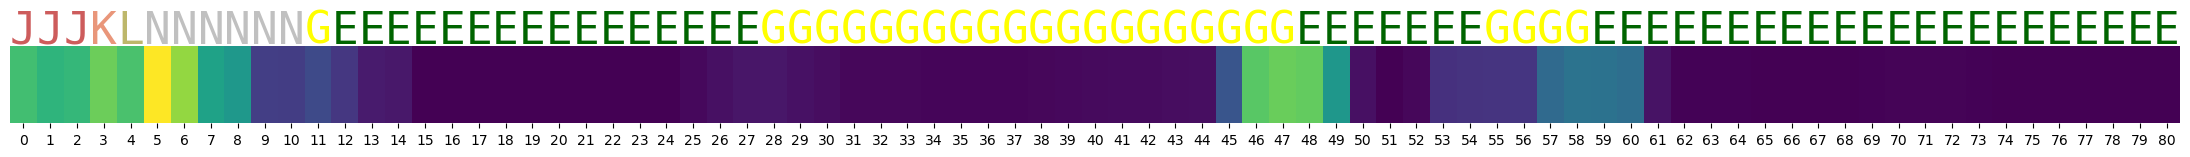

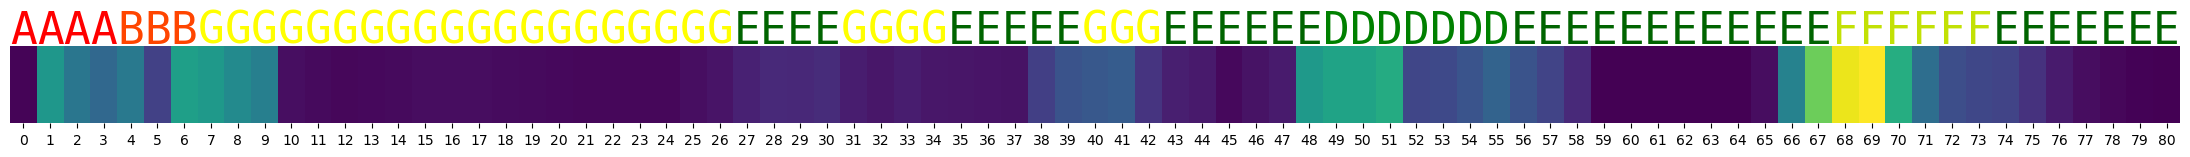

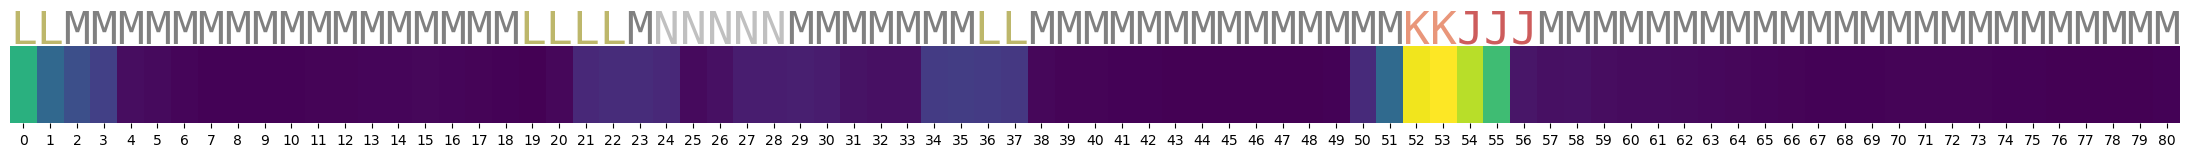

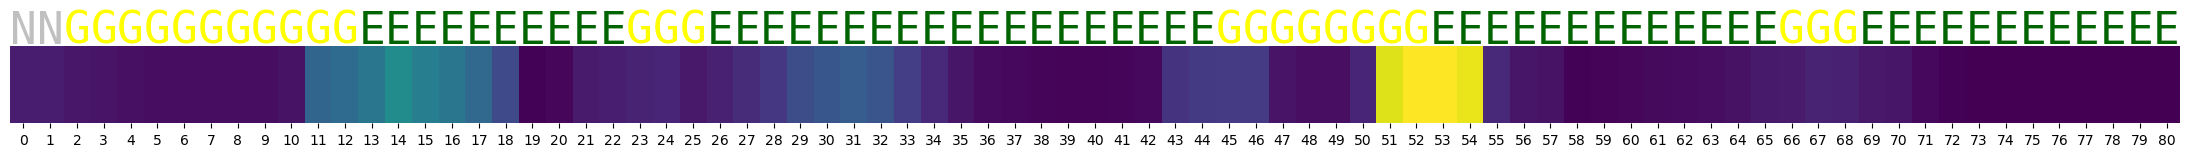

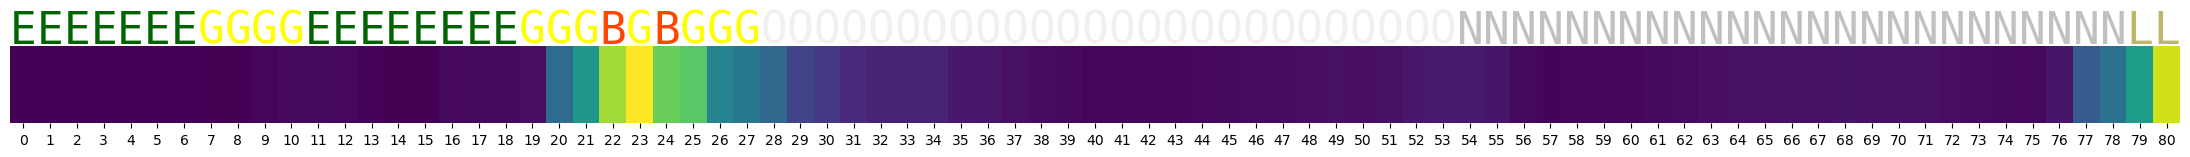

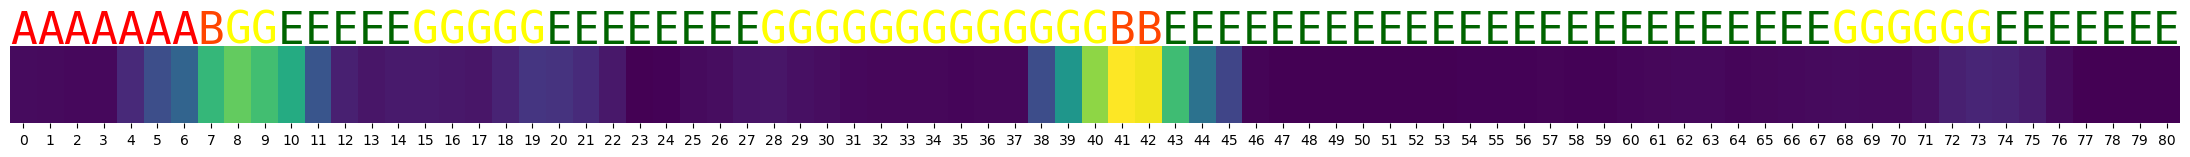

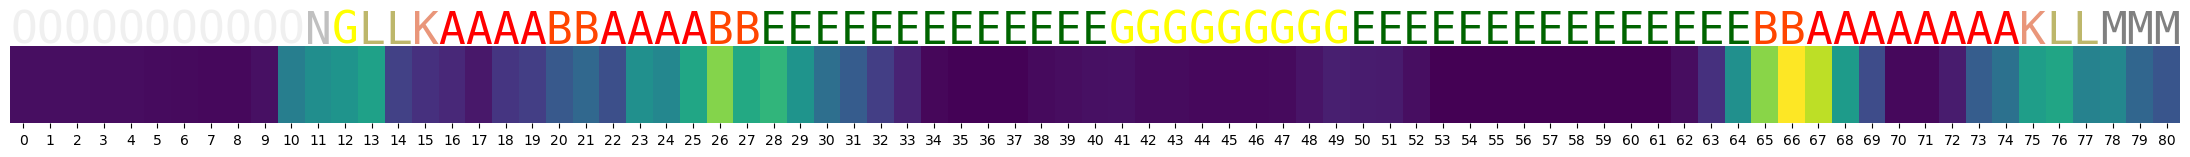

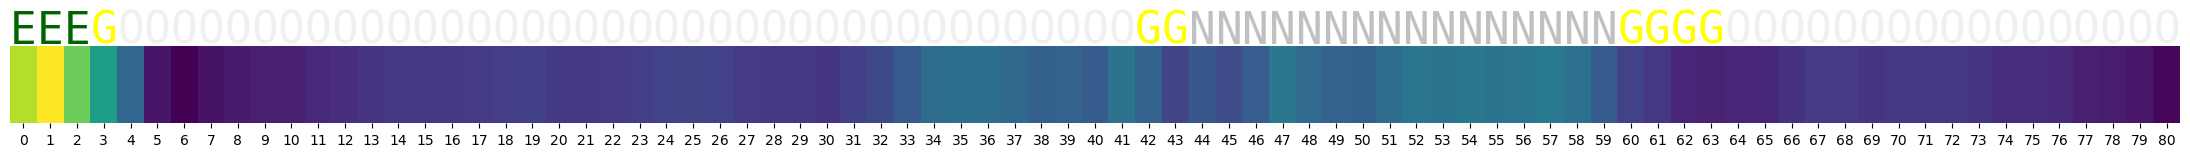

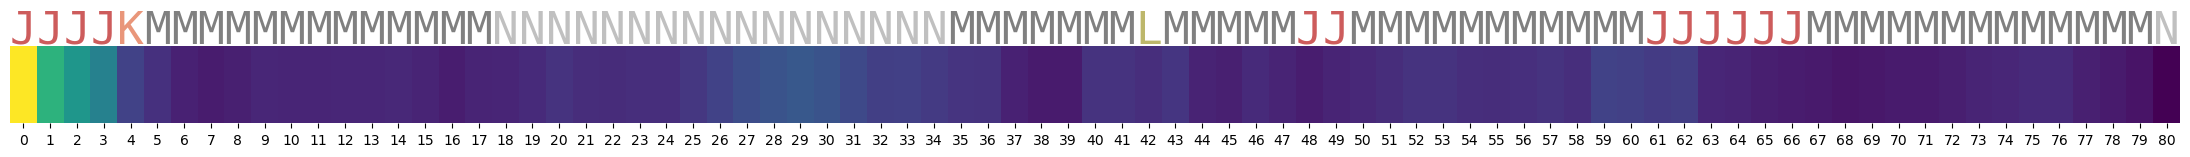

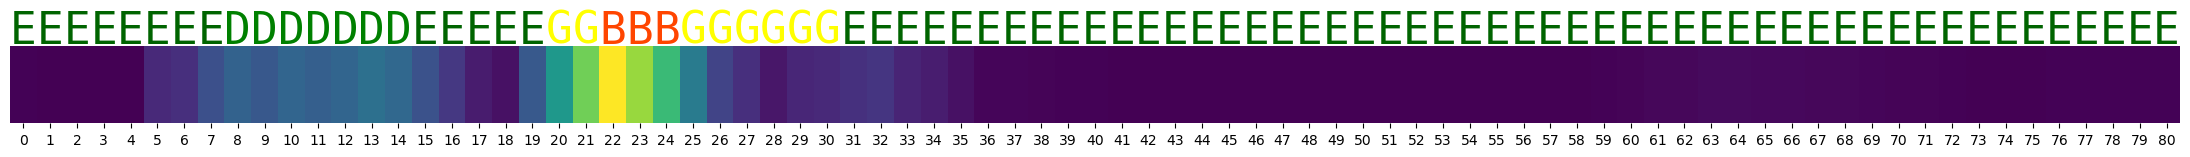

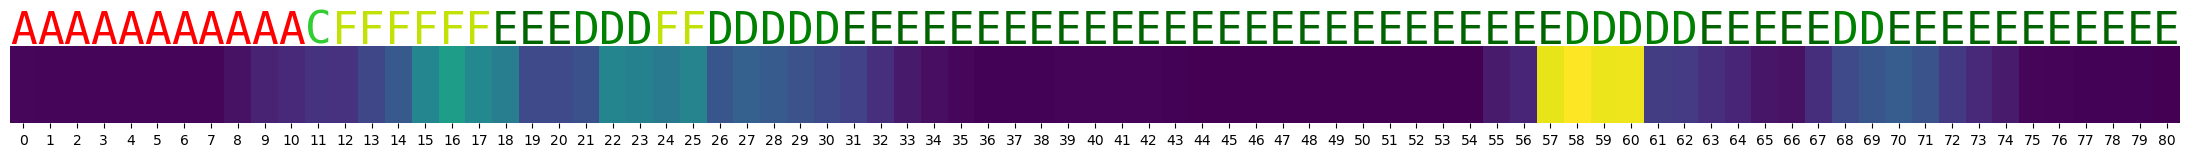

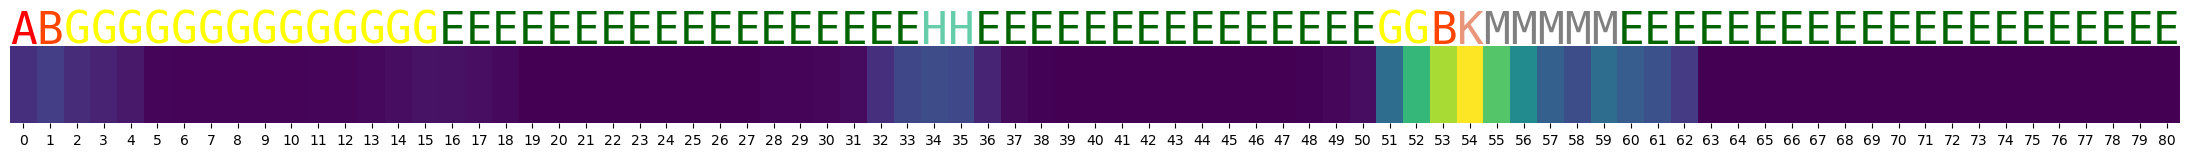

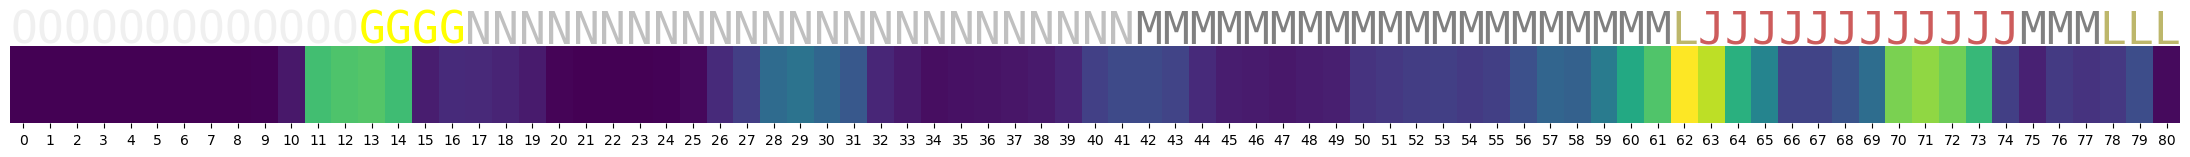

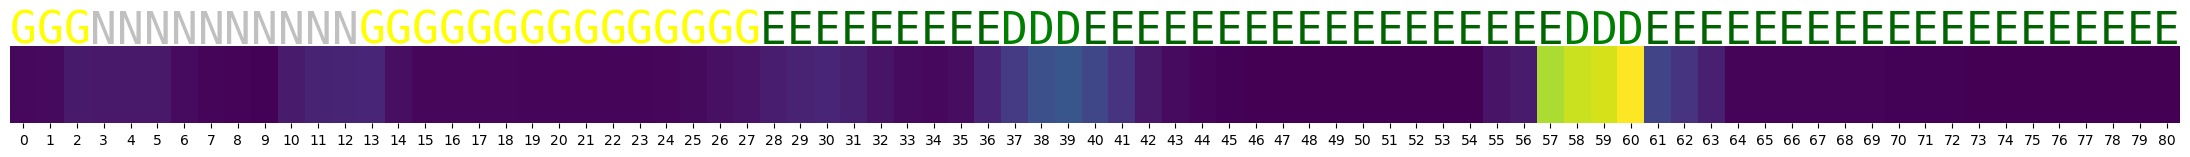

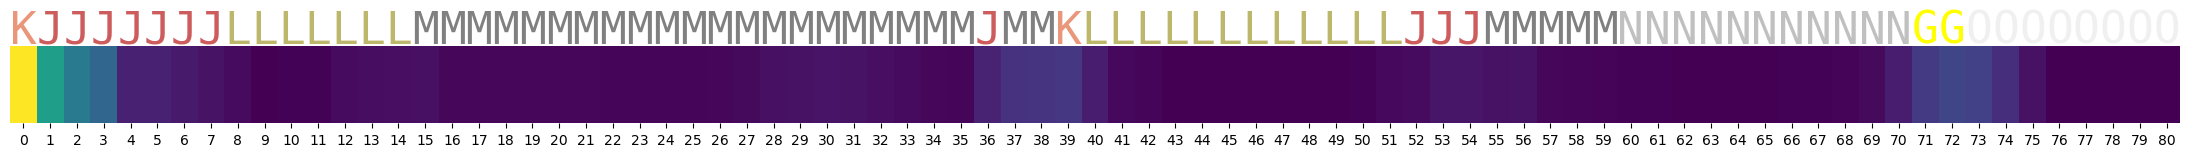

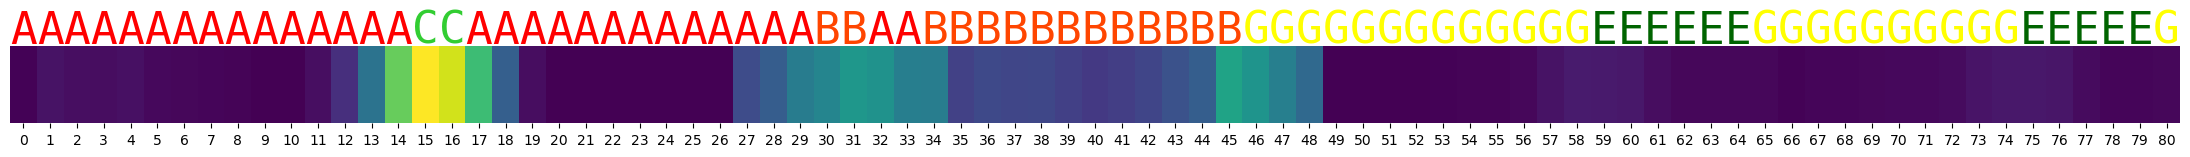

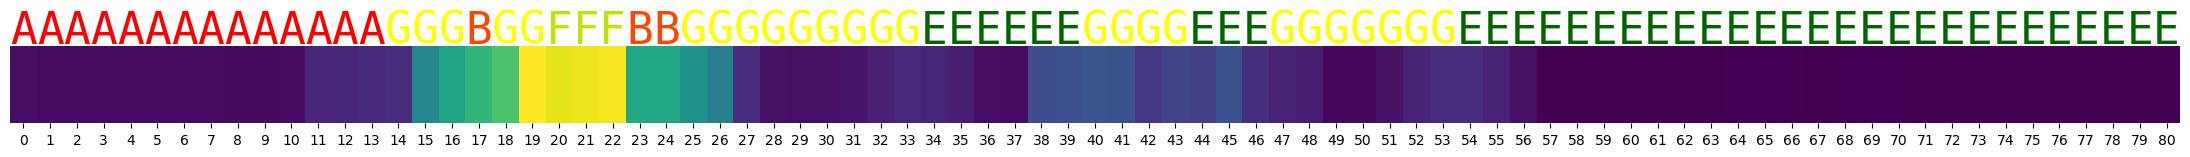

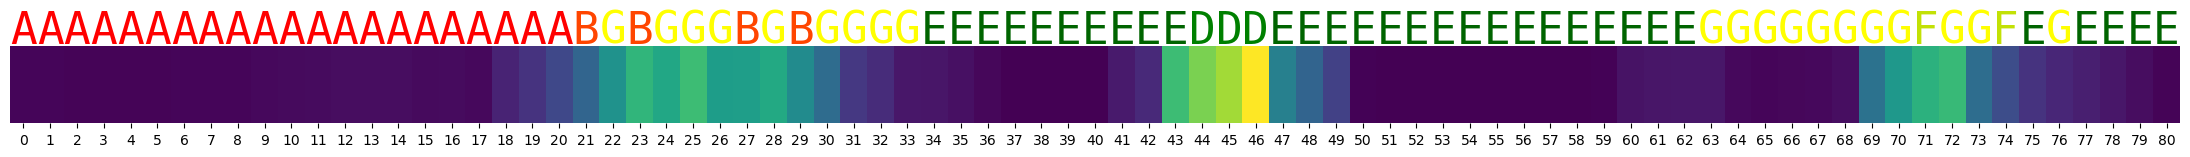

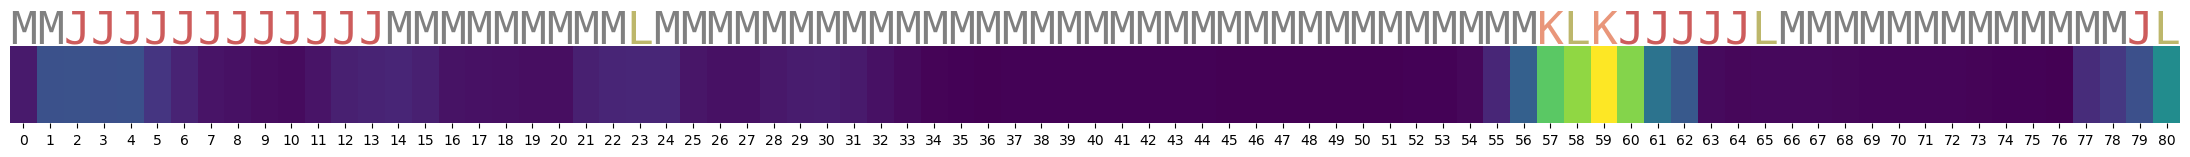

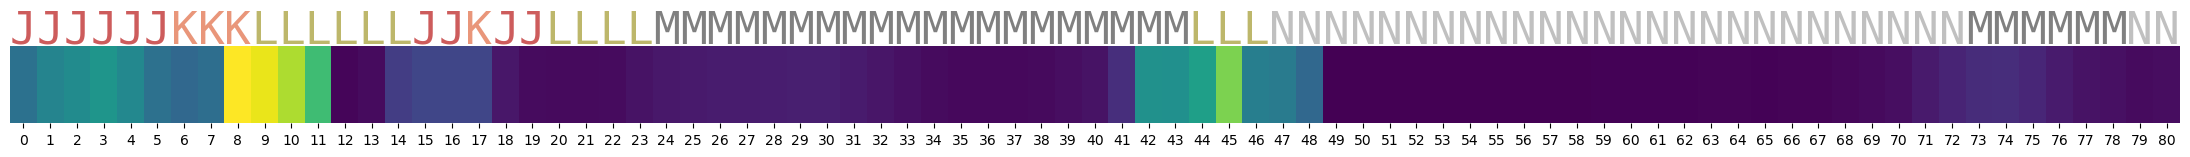

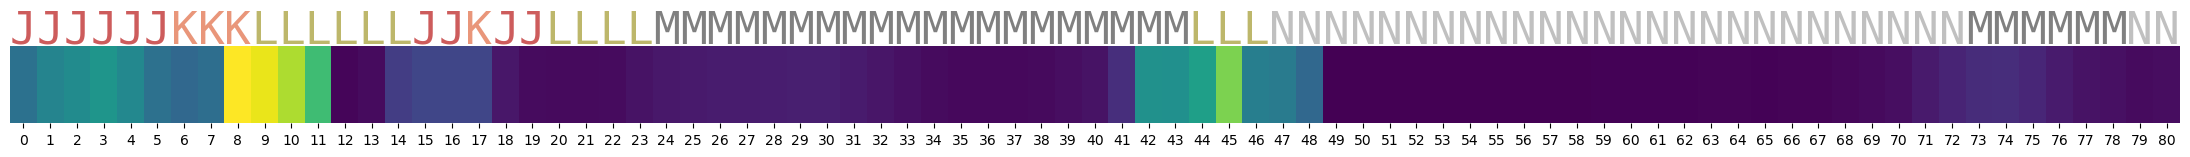

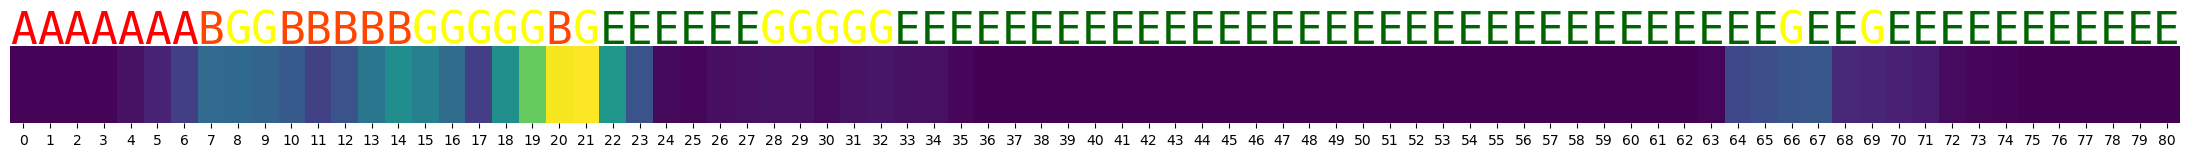

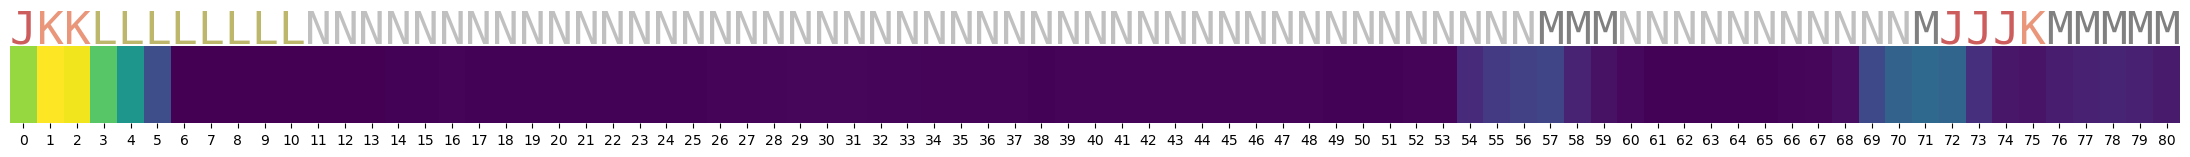

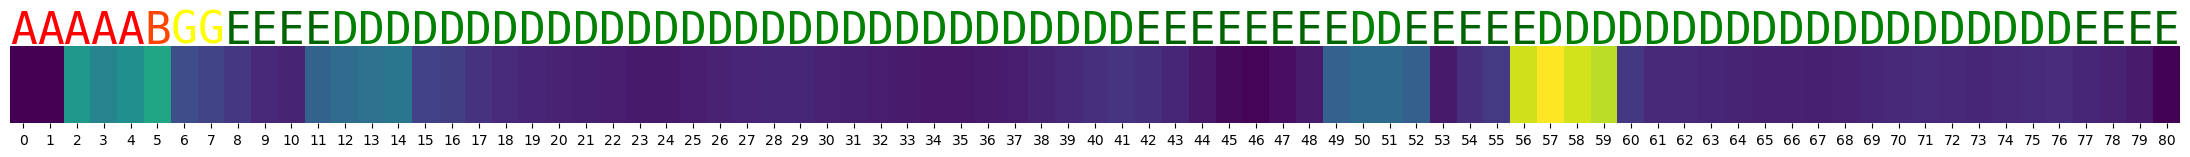

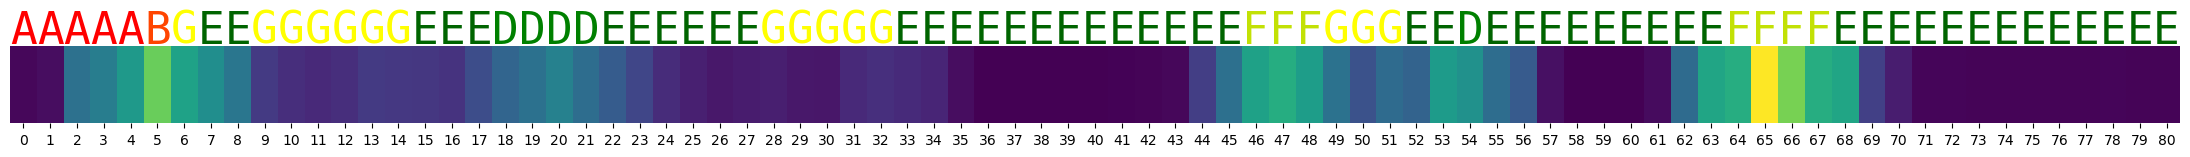

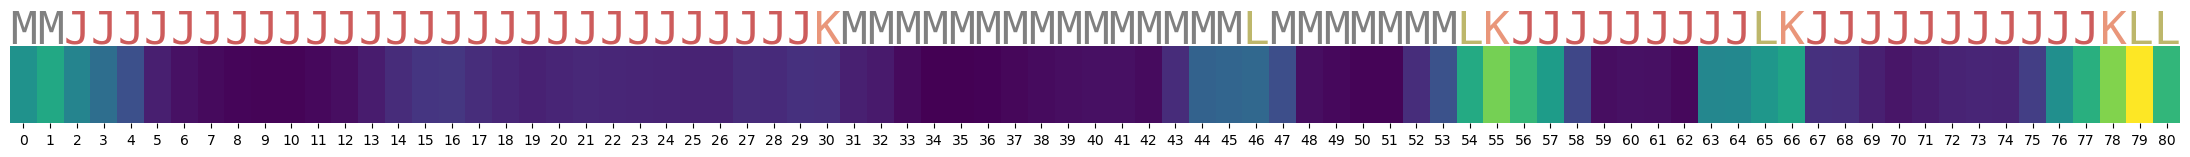

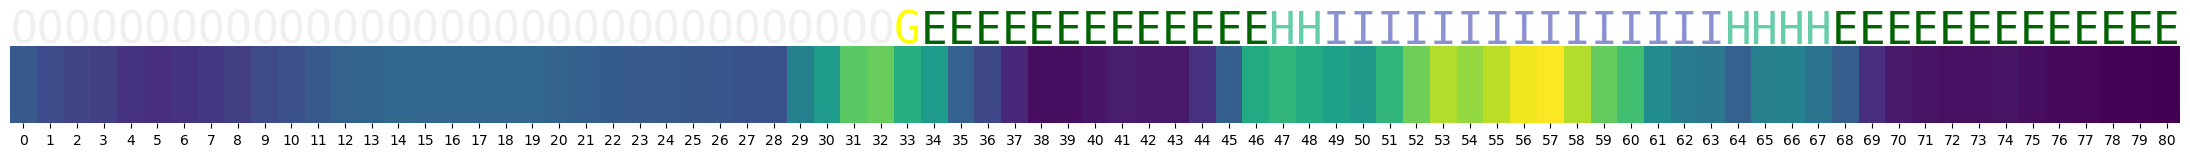

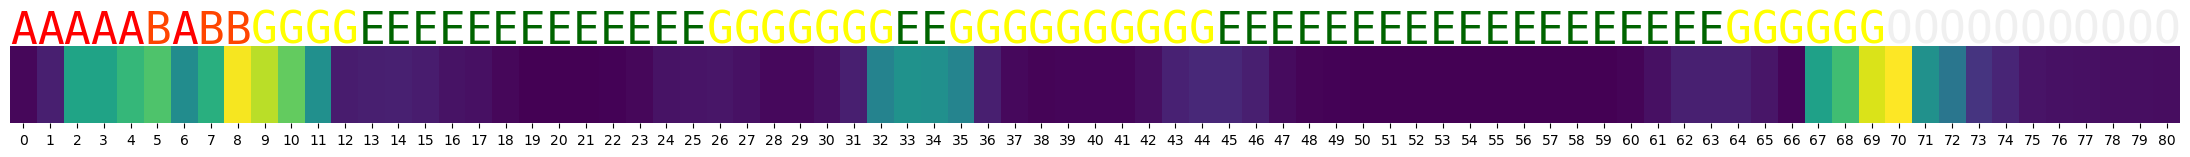

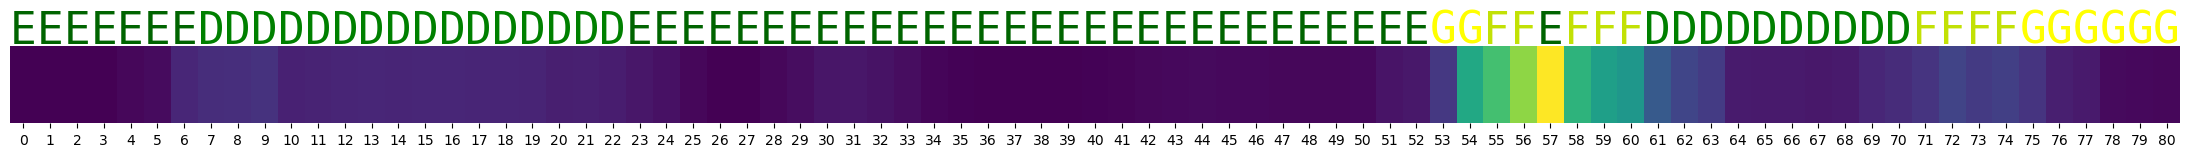

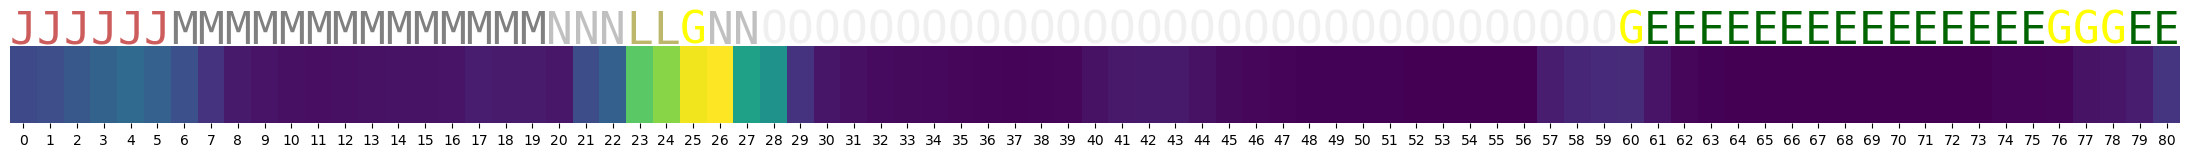

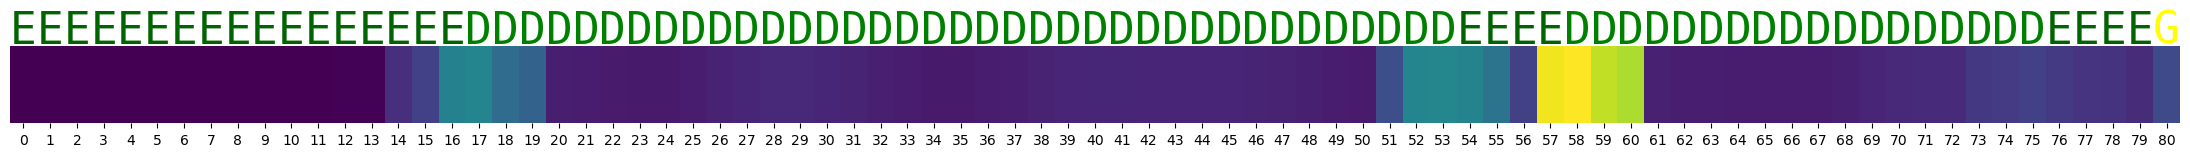

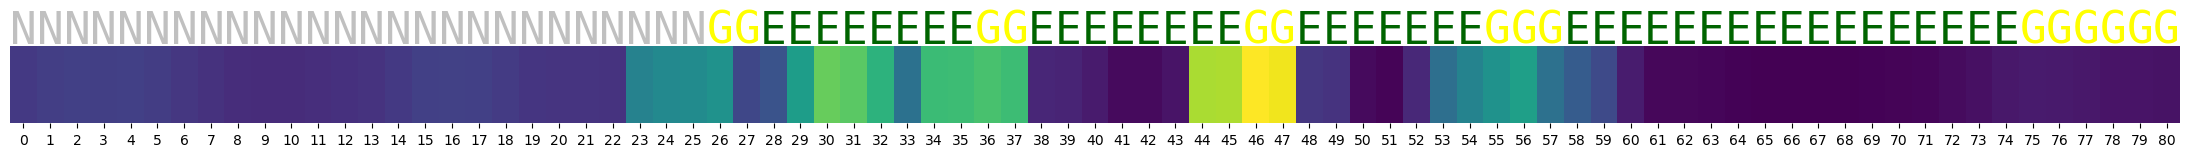

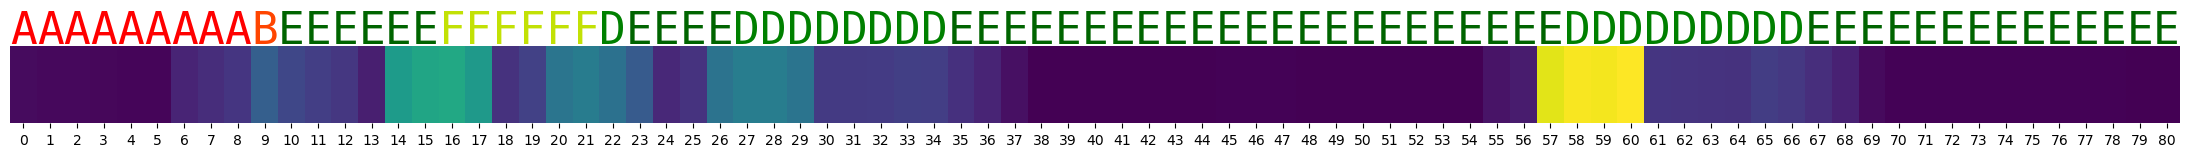

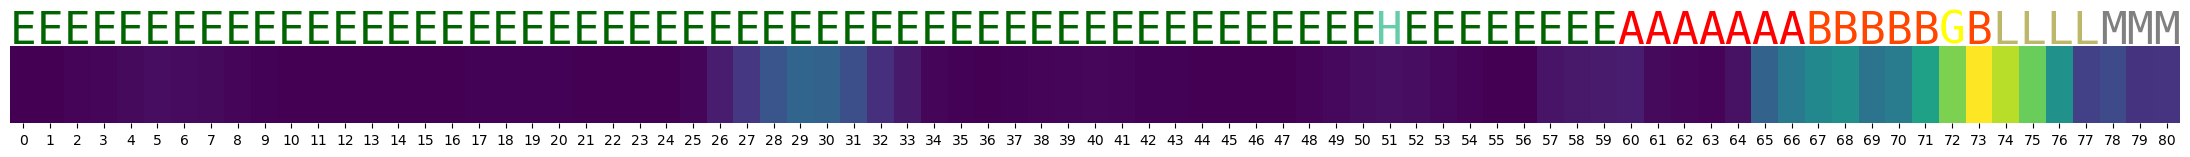

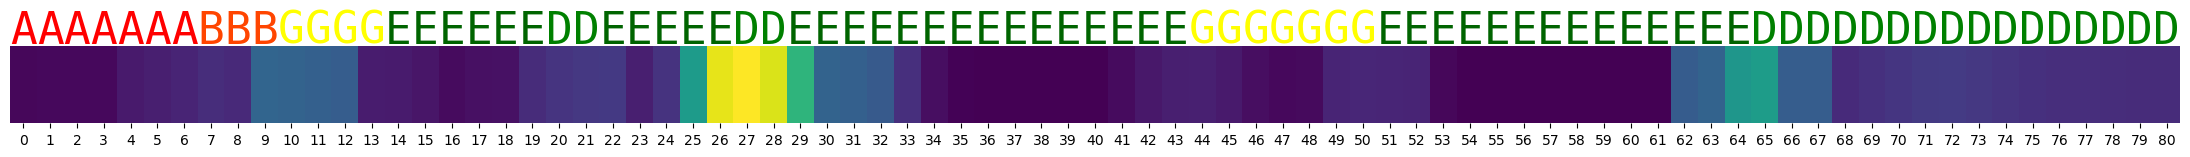

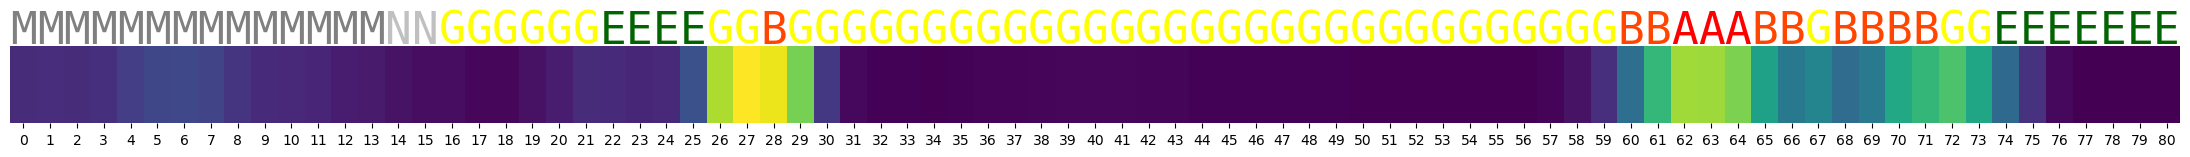

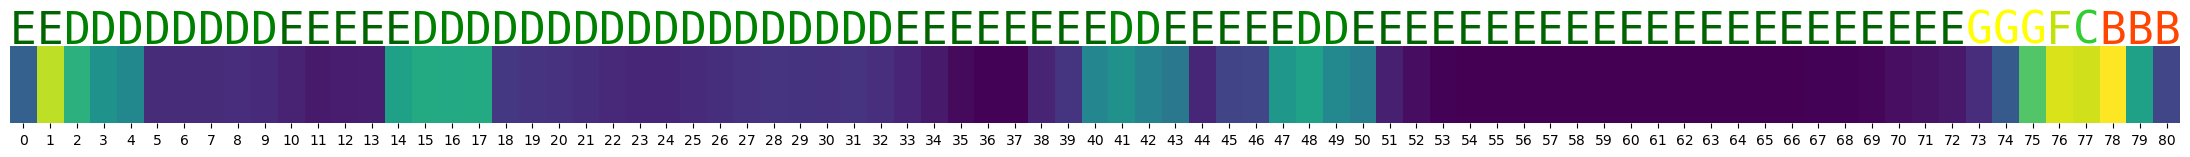

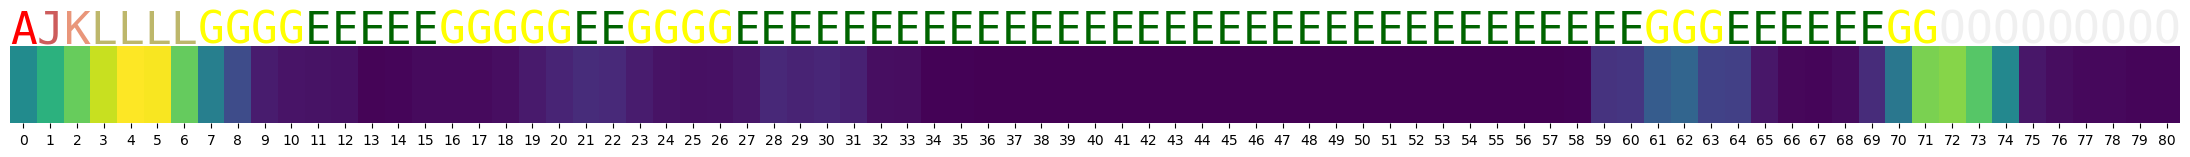

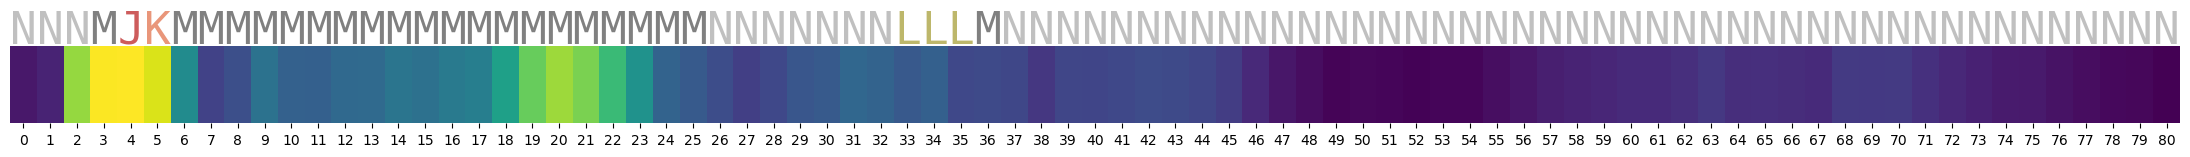

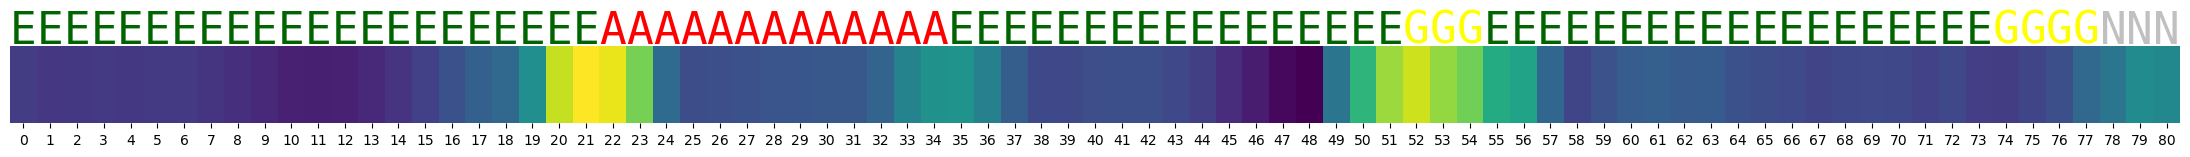

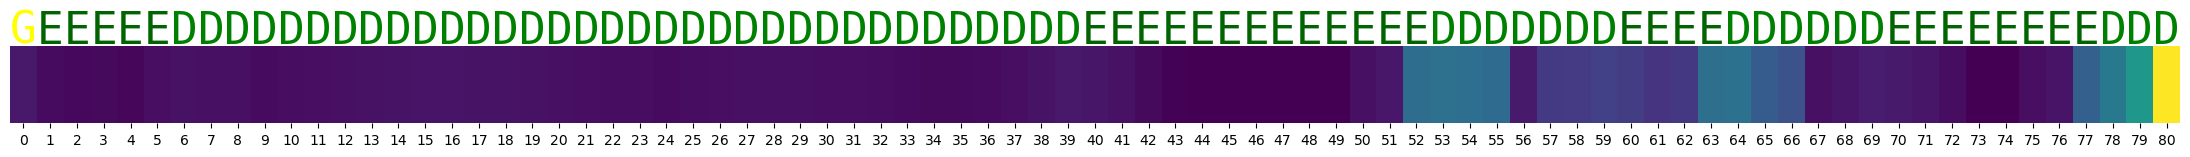

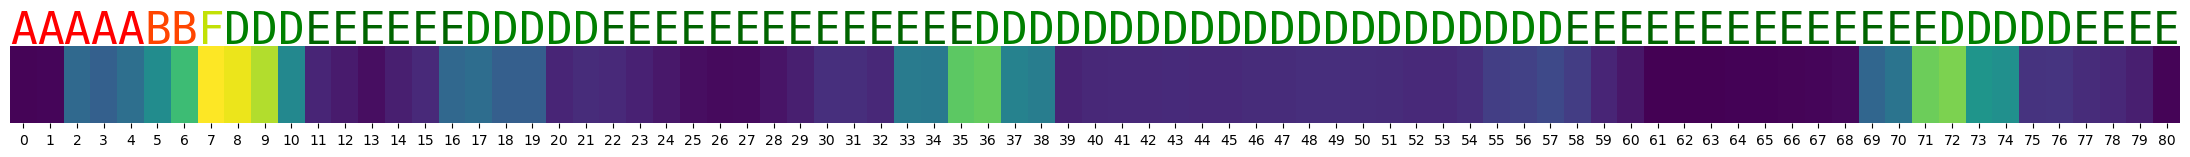

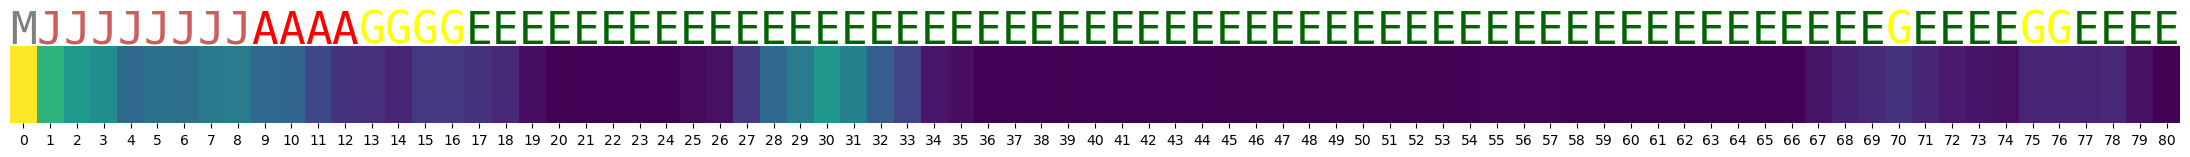

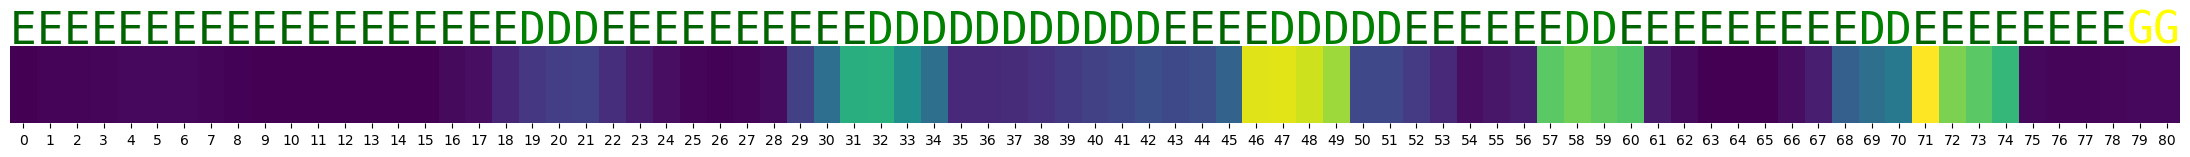

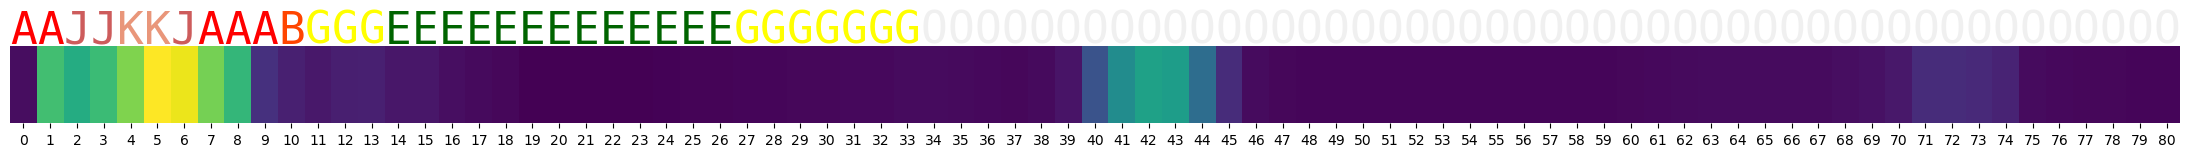

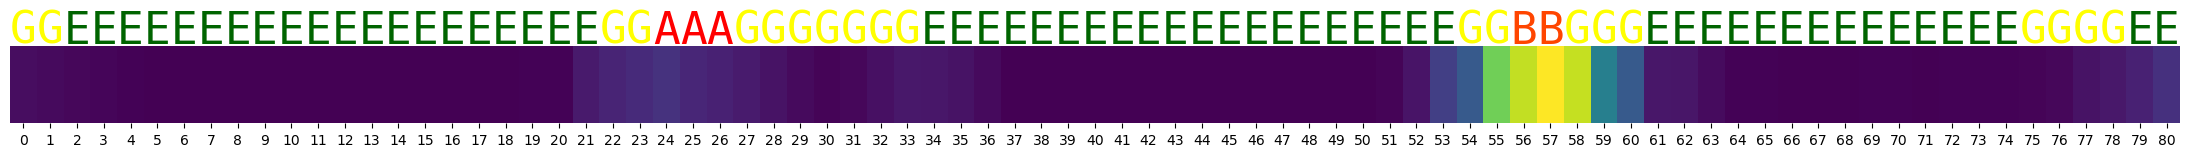

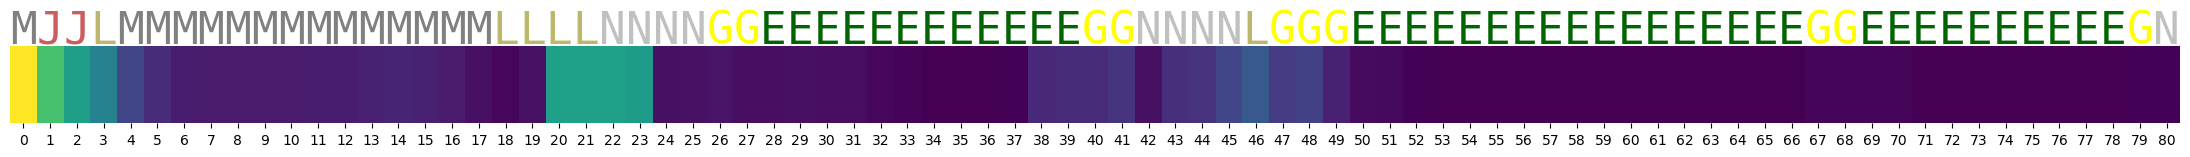

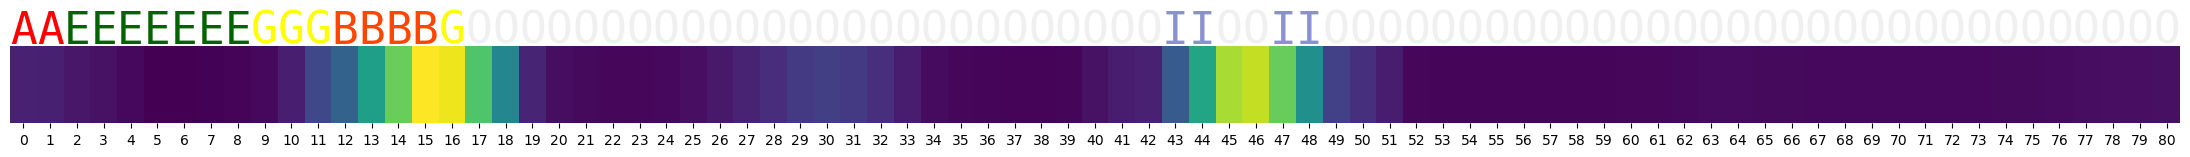

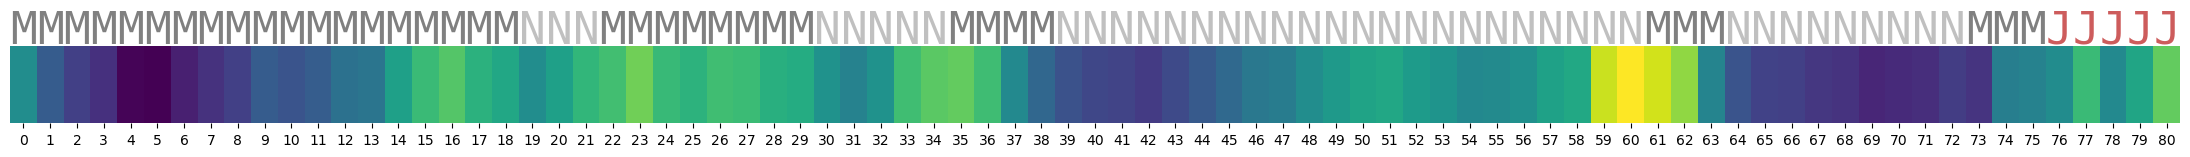

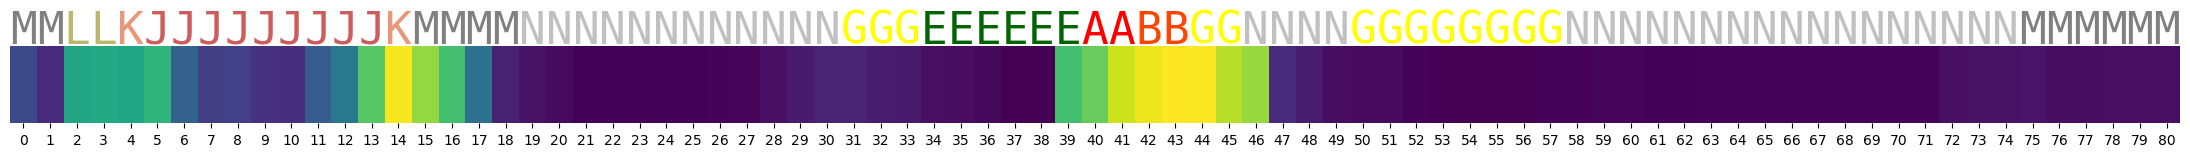

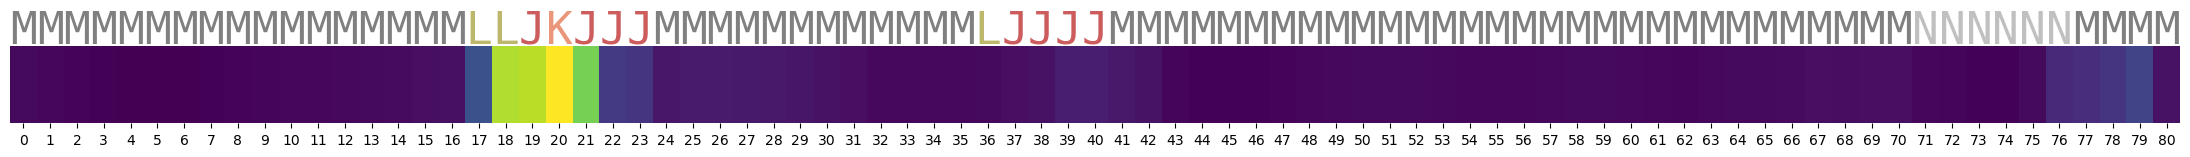

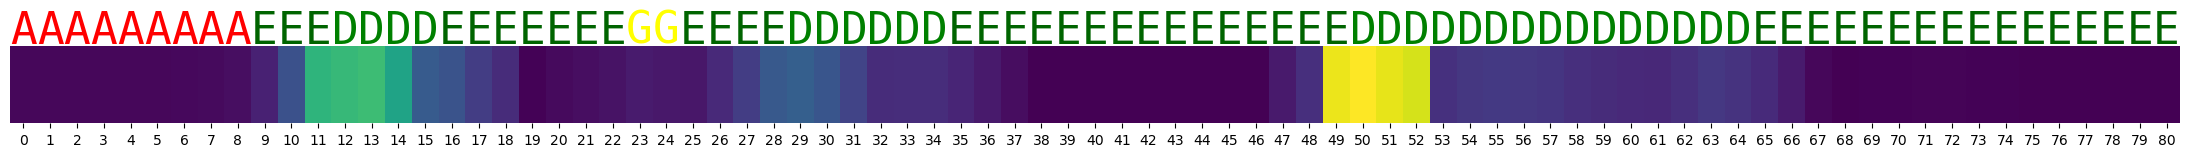

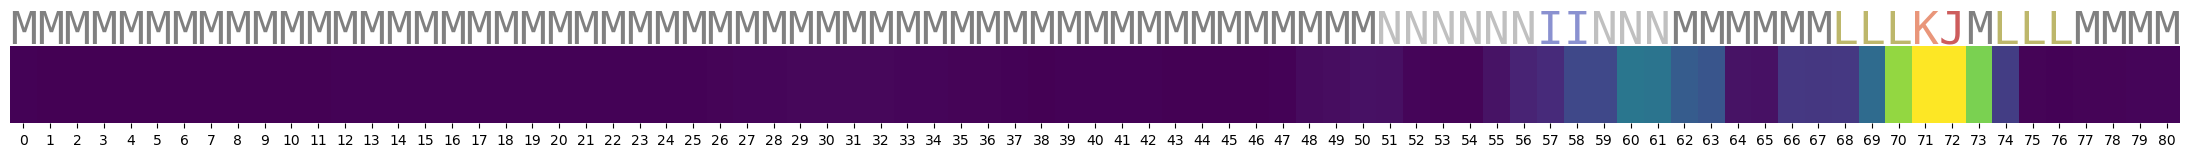

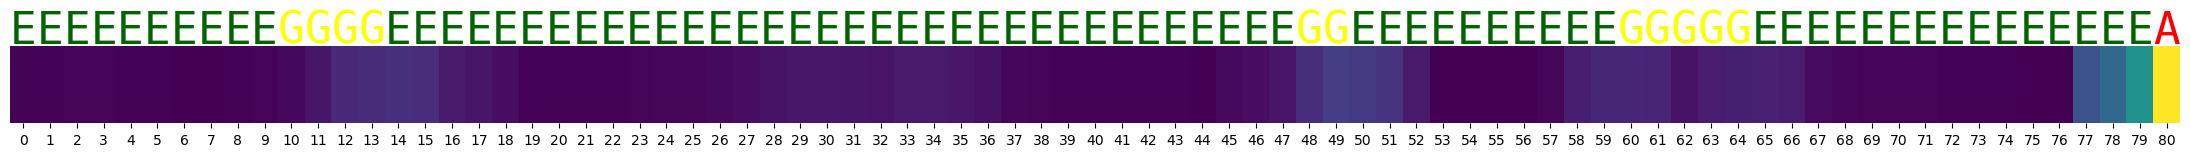

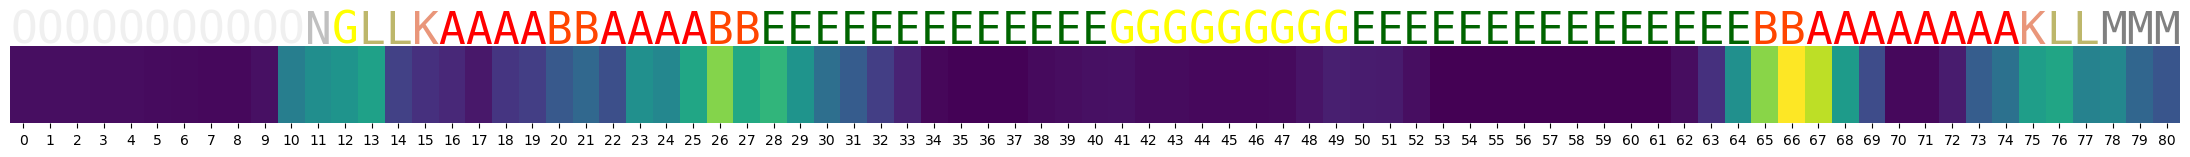

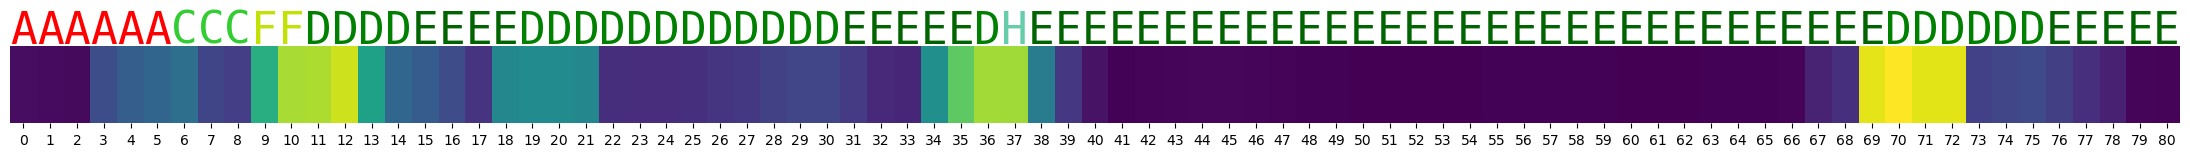

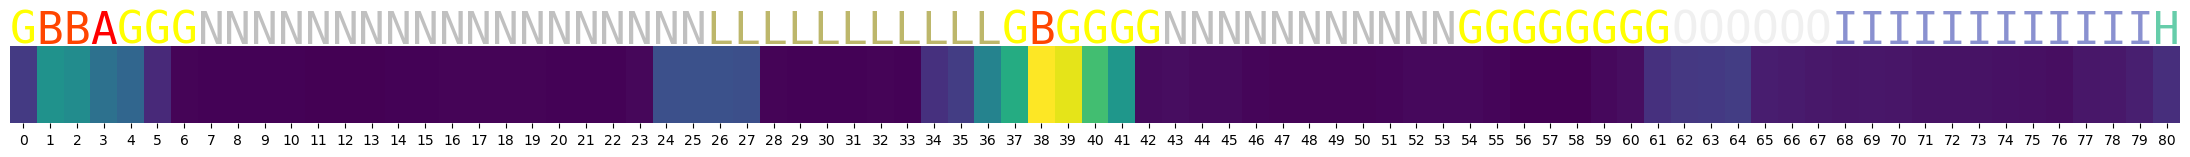

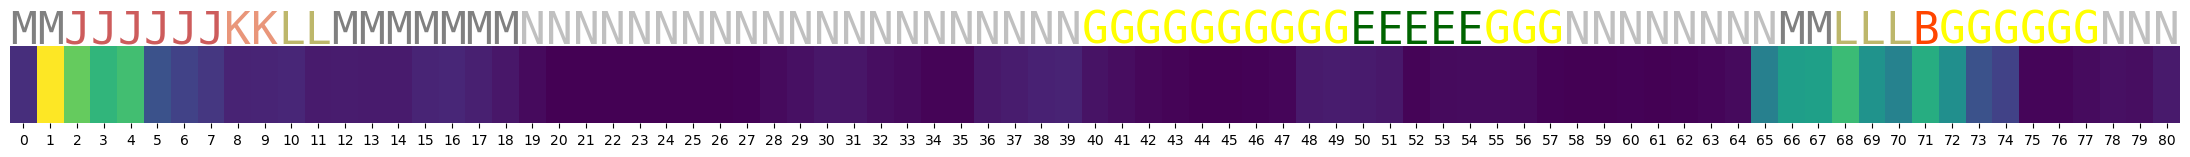

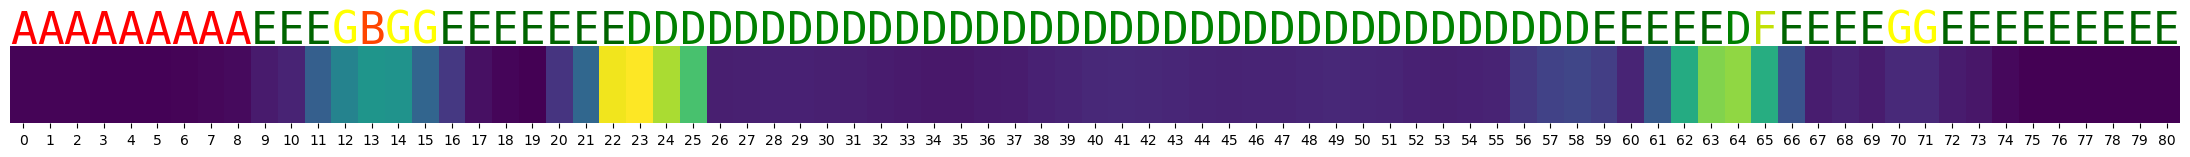

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming state_col_dict is defined somewhere above
# state_col_dict = {'A': 'red', 'G': 'green', ...}

for index, (dev_entry, atten_entry) in list(atten_dict_1.items()):
    dev_tar = dev_entry['ori_seq']
    atten_tar = atten_entry.values.reshape(-1, 1).T  # Reshape to 2D array for heatmap

    # Get the lengths of the dev_tar and atten_tar
    dev_length = len(dev_tar)
    atten_length = atten_tar.shape[1]

    # Only proceed if atten_length is not longer than dev_length
    if atten_length <= dev_length:
        plt.figure(figsize=(28, 1))  # Adjusted height to give space for text
        
        # Add colored text for each letter in dev_tar above where the heatmap will be
        for i, letter in enumerate(dev_tar[:atten_length]):
            plt.text(i + 0.5, -0.2, letter, color=state_col_dict.get(letter, 'black'),
                     ha='center', va='center', fontsize=32, family='monospace')
        
        sns.heatmap(data=atten_tar, cmap="viridis", yticklabels=False, cbar=False)

        plt.show()  # Display the figure
#         print(f"Skipping index {index} as atten length ({atten_length}) is greater than dev length ({dev_length}).")

In [ ]:
atten_compNg= np.load("../database/ft_result/pred/4_compNg/atten.npy")

<Axes: >

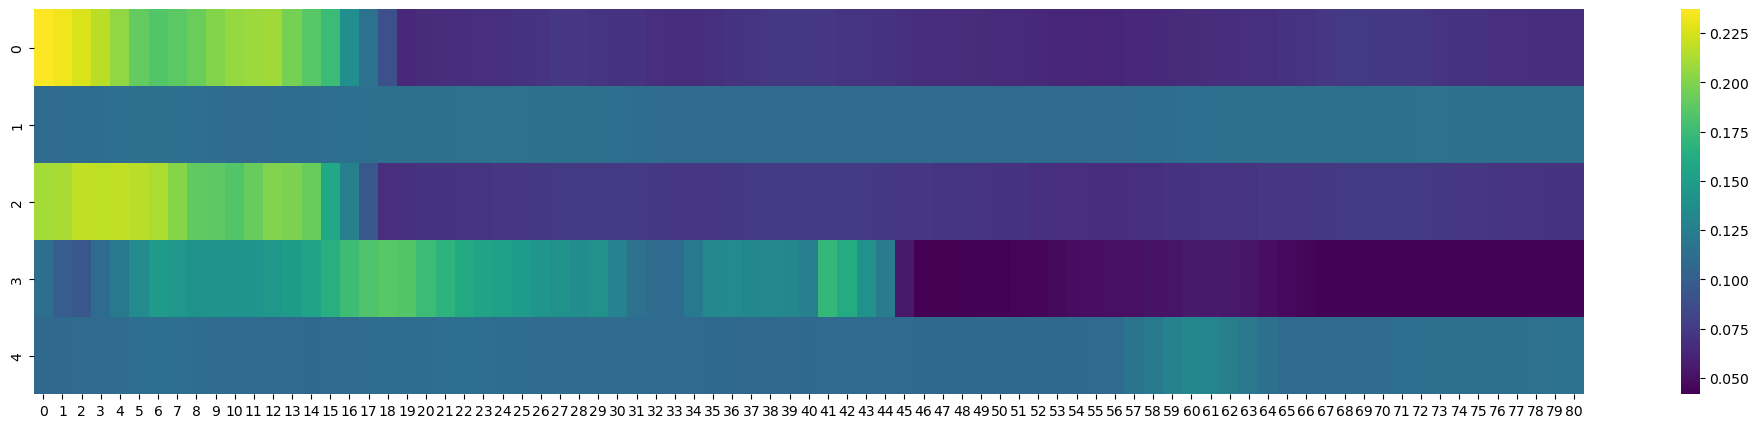

In [ ]:
figure=plt.figure(figsize=(25,5))
sns.heatmap(data=atten_compless[:5], cmap="viridis")

In [ ]:
raw_dev_compNg=pd.read_csv("../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv",sep="\t")

In [ ]:
compNg_kmers=raw_dev_compNg["sequence"].to_list()

In [ ]:
for i, item in enumerate(compNg_kmers):
    if item==" ":
        print(item)
    if type(item)!=str:
        print(i, item)

377 nan


In [ ]:
raw_dev_compNg.fillna(" ", inplace=True)

In [ ]:
raw_dev_compNg["sequence"].isnull().sum()

0

In [ ]:
len(raw_dev_compNg)

1000

In [ ]:
len(dev_compNg_conv)

999

In [ ]:
raw_dev_compNg.iloc[996]

sequence    AAAA AAAA AAAA AAAA AAAA AAAA AAAE AAEE AEEE E...
label                                                       1
Name: 996, dtype: object

In [ ]:
def dev_conv(dev_file_path):
    dev_df=pd.read_csv(dev_file_path,sep="\t")
    dev_df.fillna(" ", inplace=True) # change the nan into empty string
    assert dev_df["sequence"].isnull().sum()==0, "check the dev file for nan values"
    
    def kmer2seq_or_space(seq):
        if seq == " ":
            return " "
        else:
            return kmer2seq(seq)
    
    dev_df["ori_seq"] = dev_df["sequence"].apply(kmer2seq_or_space)

    return dev_df

In [ ]:
dev_df=dev_conv("../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv")

In [ ]:
dev_df["ori_seq"]

0      GGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
1      OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
2      OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
3                                           JJJJJJKKLLLL
4      GGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGNLLJJJAABGNNNN...
                             ...                        
995    OOOOOOOGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...
996    AAAAAAAAAEEEGBGGEEEEEEEDDDDDDDDDDDDDDDDDDDDDDD...
997                                                 NNNG
998                          DEEEEEEEEEEEEEEEEEEEEEEEEEB
999          OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
Name: ori_seq, Length: 1000, dtype: object

In [ ]:
motif_list1=["AAAAAAAABBAA","AAAAAAAAAEEE","NBAAAAABGEEE","AAAAAAAAEEEE","AAAAAAABBBGG"]

In [ ]:
for i, seq in enumerate(dev_df["ori_seq"].to_list()):
    if motif_list1[0] in seq and dev_df["label"].iloc[i]==1:
        if len(seq)>81:
            seq=seq[:81]
        print(motif_list1[0], i, len(seq), seq, "\n")
        letters=seq

AAAAAAAABBAA 222 81 AAAAAAAAAAAAAAACCAAAAAAAAAAAAABBAABBBBBBBBBBBBGGGGGGGGGGGGGEEEEEEGGGGGGGGGGEEEEEG 

AAAAAAAABBAA 582 81 AAAAAAAAAAAAAAACCAAAAAAAAAAAAABBAABBBBBBBBBBBBGGGGGGGGGGGGGEEEEEEGGGGGGGGGGEEEEEG 



In [ ]:
def motif_vis(file_name, dev_path, atten_path, motif_str, motif_inst):
    """
    input examples) 
     (1) dev_path = "../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv"
     (2) atten_path = "../database/ft_result/pred/4_compNg/atten.npy"
    output: attention matrix segment which shows the motif on it
    """
    dev_df=dev_conv(dev_path)
    atten_mat=np.load(atten_path)
    for i, seq in enumerate(dev_df["ori_seq"].to_list()):
        if motif_inst in seq and dev_df["label"].iloc[i]==1:
            if len(seq)>81:
                seq=seq[:81]  # cut for visualization purpose
            print(motif_str, i, len(seq), seq, "\n")
            
            letters=seq
            
            figure=plt.figure(figsize=(35,2))
            ax =sns.heatmap(data=atten_mat[i:i+1], cmap="viridis")
            sequence = motif_str
            sequence_indices = [i for i in range(len(letters)) if letters.startswith(sequence, i)]
            for j, letter in enumerate(letters):
                
                if j in sequence_indices or j-1 in sequence_indices or j-2 in sequence_indices or j-3 in sequence_indices or j-4 in sequence_indices:
                    if atten_mat[i][j]>np.mean(atten_mat[i]) and atten_mat[i][j]>10*min(atten_mat[i]): # same condition for motif finding
                        ax.text(j + 0.5, -0.2, letter, ha='center', va='center', color=state_col_dict[letter], weight='bold', fontsize=30)
                else:
                    ax.text(j + 0.5, -0.2, letter, ha='center', va='center',fontsize=16)
           
            plt.tight_layout()
            output_path="../database/figs/motif_vis_"+file_name+"_"+motif_str+"_in_"+motif_inst+".pdf"
            plt.savefig(output_path, format='pdf')
            
            plt.show()

In [115]:
## change to promoter region 50 vs 0

test_file_name="not_n_rpkm50"
test_dev_path="../database/fine_tune/prom/up2kdown4k/gene_exp/4mer/all/not_n_rpkm50/dev.tsv"
test_atten_path = "../database/ft_result/prom/up2kdown4k/gene_exp/4mer/atten_mat/not_n_rpkm50/atten.npy"
test_dev=dev_conv(test_dev_path)
atten_mat=np.load(test_atten_path)


Matched no. 5: High attention at columns [15, 16, 17, 18, 19, 20]
Scores: [0.29140349 0.38969002 0.47109383 0.2791076  0.37227628 0.324344  ]
Sequence: GGGEEEEEEDDDDDDDDEEEEDDDDDDDDD


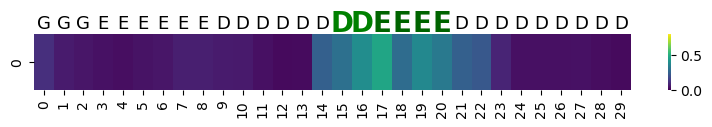

----------------------------------------
Matched no. 13: High attention at columns [8, 22, 23, 24, 25, 26, 27]
Scores: [0.26777303 0.26730642 0.27060793 0.30092711 0.40598619 0.34654537
 0.29487271]
Sequence: EEEEGGEEEEDDDDDDDDDFFFFFFFFFFF


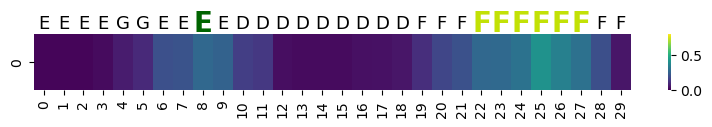

----------------------------------------
Matched no. 14: High attention at columns [13, 14, 15, 16, 17, 18]
Scores: [0.26303967 0.28228889 0.36078644 0.37752372 0.30684311 0.29442307]
Sequence: EEEEEEEEEEEEEHHHHEEEEDDDDDDDDD


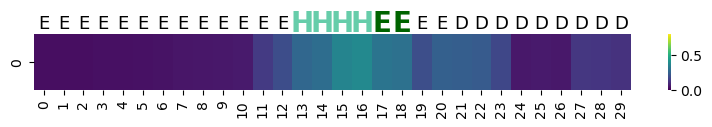

----------------------------------------
Matched no. 23: High attention at columns [7, 8, 9, 10, 11]
Scores: [0.26948693 0.46395387 0.43088889 0.37005859 0.27625488]
Sequence: MMMMMMMMMMM


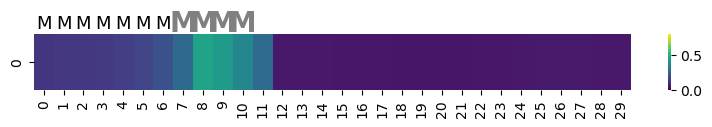

----------------------------------------
Matched no. 24: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.27256273 0.38808019 0.51002152 0.33122046 0.31297038]
Sequence: MMMLKKKBAAAAAAAAABBBABBGGGGGGG


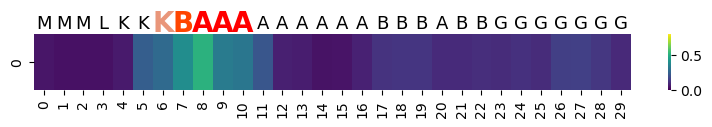

----------------------------------------
Matched no. 26: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.25428219 0.39224743 0.47122961 0.40763752 0.33321061]
Sequence: EEEEEEEEEDDDDDDDDDDDDDDDDDDDDD


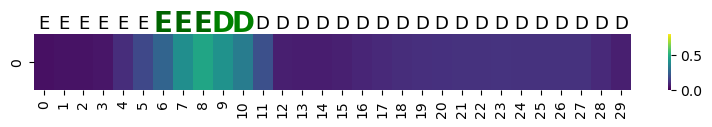

----------------------------------------
Matched no. 36: High attention at columns [19, 20, 21, 22, 23]
Scores: [0.28163773 0.41612501 0.41841275 0.35294811 0.28615284]
Sequence: GGGBBBBBJJJJJJJJAAACCCCCCCCCCC


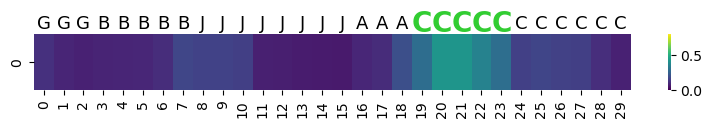

----------------------------------------
Matched no. 38: High attention at columns [24, 25, 26, 27, 28]
Scores: [0.37420146 0.53721753 0.46474418 0.42495135 0.26411215]
Sequence: EEEEDDDDDDDDDDDDDDDDDDFFFFFFFE


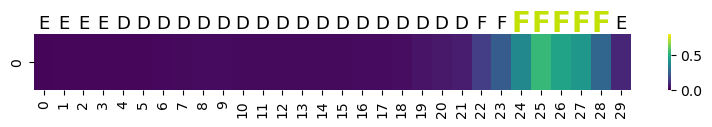

----------------------------------------
Matched no. 61: High attention at columns [10, 11, 13, 14, 15, 16, 17]
Scores: [0.2650528  0.35734441 0.3406293  0.30917188 0.27566118 0.28435603
 0.28487636]
Sequence: OOOOOOABBAAAAAAEEGNNNNNNNNNNNN


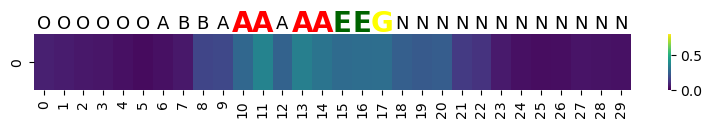

----------------------------------------
Matched no. 62: High attention at columns [15, 16, 17, 18, 19, 20]
Scores: [0.33731428 0.36055652 0.46105972 0.58280292 0.27135244 0.25370428]
Sequence: EEEEEDDDDDDDDDDDHHDDEEEEEEEEEE


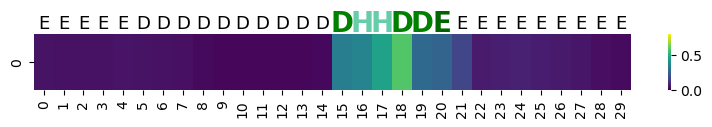

----------------------------------------
Matched no. 70: High attention at columns [8, 9, 18, 19, 20, 21, 22]
Scores: [0.29976107 0.31322049 0.26859975 0.28638467 0.27992812 0.27561829
 0.25407227]
Sequence: BBCCCCCCCFFFFFFFCCCCCCFFFFFFFF


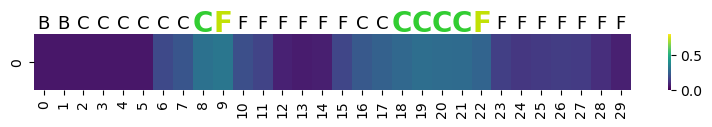

----------------------------------------
Matched no. 75: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.253089   0.45752238 0.40615944 0.34810882 0.29740925]
Sequence: NNNNNNNNNN


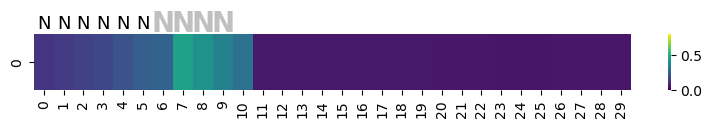

----------------------------------------
Matched no. 80: High attention at columns [11, 13, 16, 17, 18, 19, 20]
Scores: [0.29667971 0.25308396 0.26952346 0.32596778 0.33583986 0.31333948
 0.26360594]
Sequence: GGBABAAAAAAAAAABBBBBBBBBBGGGGG


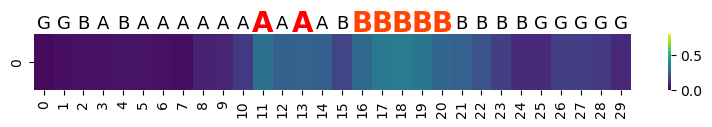

----------------------------------------
Matched no. 91: High attention at columns [0, 1, 2, 3, 4, 5]
Scores: [0.51638976 0.28582293 0.53594678 0.41004943 0.28865798 0.2823928 ]
Sequence: GGGEEEEEEEEEEEEEEEEEEEEEEEEEEE


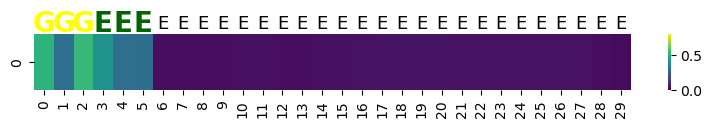

----------------------------------------
Matched no. 94: High attention at columns [17, 18, 19, 20, 21]
Scores: [0.29845638 0.52837668 0.51062582 0.41479464 0.30222141]
Sequence: OOOOOOOOOOOOOOOOOOGEEEEEEEEEEE


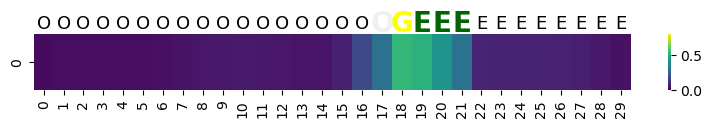

----------------------------------------
Matched no. 110: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.25428219 0.39224743 0.47122961 0.40763752 0.33321061]
Sequence: EEEEEEEEEDDDDDDDDDDDDDDDDDDDDD


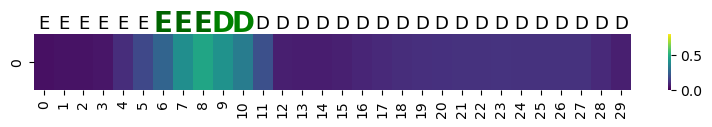

----------------------------------------
Matched no. 113: High attention at columns [20, 21, 22, 23, 24, 25]
Scores: [0.26441694 0.36432883 0.4409681  0.50273184 0.33941555 0.29860145]
Sequence: EEEEEDDDDDDDDDDDDDDDDDDEEEEEEE


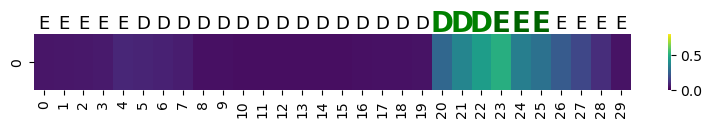

----------------------------------------
Matched no. 121: High attention at columns [6, 7, 8, 9, 10, 11, 13]
Scores: [0.29409755 0.32945876 0.35319215 0.33430692 0.37127387 0.30254039
 0.27443791]
Sequence: OOOOOOOOOOAAAABBEEEEE


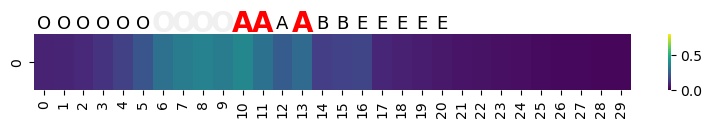

----------------------------------------
Matched no. 123: High attention at columns [19, 20, 21, 22, 23, 24]
Scores: [0.30248543 0.35672255 0.44609946 0.48859672 0.26759593 0.25639712]
Sequence: EDDDDDDDDDDDDDDDDDDDDDEEEEEEEE


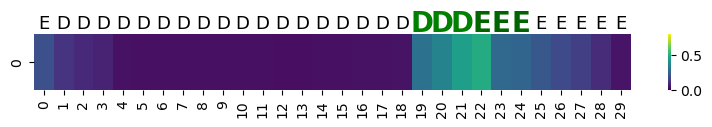

----------------------------------------
Matched no. 124: High attention at columns [20, 21, 22, 23, 24]
Scores: [0.31815549 0.38481132 0.44422928 0.43970651 0.25500429]
Sequence: EEEEEGGAAAAAAAABGGGGGFFFFFGGGF


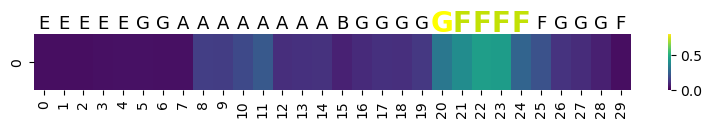

----------------------------------------
Matched no. 125: High attention at columns [10, 11, 12, 13, 14]
Scores: [0.27889675 0.39237995 0.45887953 0.43354424 0.41804331]
Sequence: NNNNNNNNJJJJAAAEEEEEEEEEEEEEEE


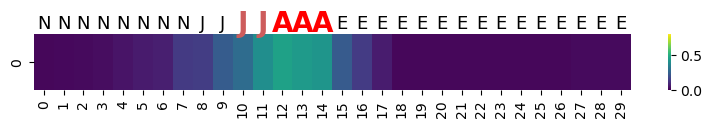

----------------------------------------
Matched no. 129: High attention at columns [16, 17, 18, 19, 20, 21, 22]
Scores: [0.26476946 0.32429164 0.39472754 0.35123859 0.26260927 0.3352393
 0.25631242]
Sequence: GGGGGGGGBBBBBBBBBBBBBBGGGGGGEE


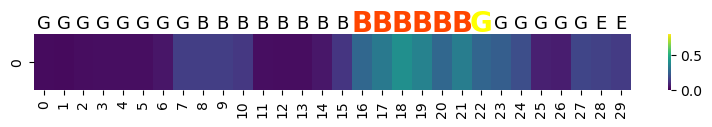

----------------------------------------
Matched no. 130: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.25703359 0.45241971 0.39518996 0.33896954 0.29165999]
Sequence: MMMNNNNNNN


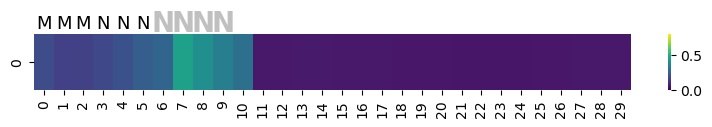

----------------------------------------
Matched no. 132: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.33306865 0.42932693 0.42534303 0.42658517 0.28477207]
Sequence: OOOOOOOOOOAAAAAAAAAABEEEDDDDDD


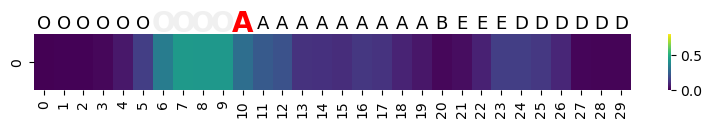

----------------------------------------
Matched no. 139: High attention at columns [8, 9, 10, 11, 12, 13]
Scores: [0.28143777 0.31903699 0.33961214 0.3472074  0.39273501 0.31356448]
Sequence: EEEEEEEEEEEEEDDDDDDDDDDDDDDDDD


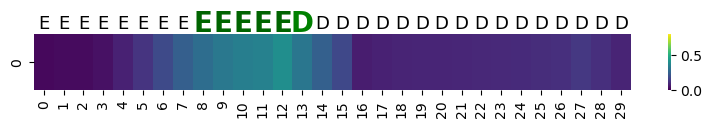

----------------------------------------
Matched no. 149: High attention at columns [24, 25, 26, 27, 28]
Scores: [0.32507357 0.46073945 0.44087623 0.47208546 0.28711409]
Sequence: GGHHHEEEDDDDDDDDDDDDDDDDDHHHDD


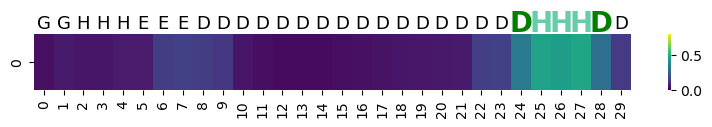

----------------------------------------
Matched no. 152: High attention at columns [11, 12, 13, 14, 15, 16, 17]
Scores: [0.30193017 0.34313165 0.34502161 0.42736037 0.36582444 0.32093698
 0.32160015]
Sequence: OOOOOOOOOOOGGGGOOOOOOOOOOOOOOO


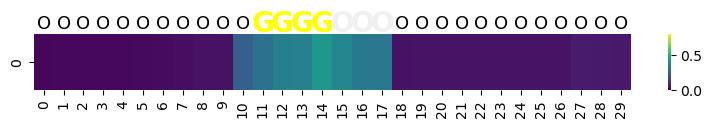

----------------------------------------
Matched no. 163: High attention at columns [8, 9, 10, 20, 21, 22, 23, 24, 25]
Scores: [0.27292356 0.26990423 0.30505947 0.28662591 0.26854047 0.29431346
 0.41192711 0.27276576 0.2740747 ]
Sequence: NNNNNBBBAAAAAABBBBBBBBBCCBFFFF


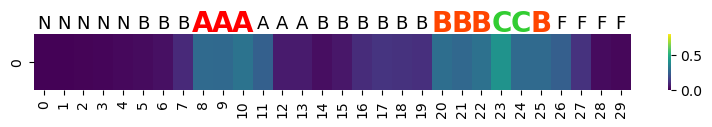

----------------------------------------
Matched no. 168: High attention at columns [22, 23, 24, 25, 26]
Scores: [0.27394365 0.30777184 0.40330319 0.28422486 0.25335967]
Sequence: GGGGGGGBBAAAAAAAAAABBABBCCCCCC


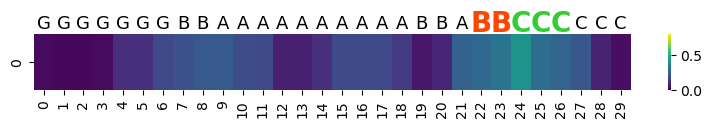

----------------------------------------
Matched no. 169: High attention at columns [25, 26, 27, 28, 29]
Scores: [0.27688094 0.53161104 0.51092089 0.45820316 0.32232181]
Sequence: DDDDDDDDDDDDDDDDDDDDDDDDDCCDDD


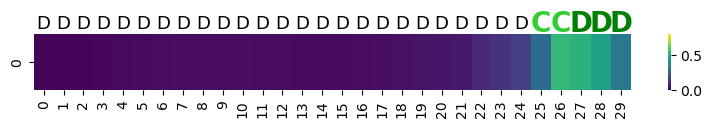

----------------------------------------
Matched no. 173: High attention at columns [10, 11, 12, 13, 14, 15]
Scores: [0.26266681 0.2883722  0.52560316 0.51170049 0.31189398 0.27278528]
Sequence: EEEEEEDDDDDDDEEEEEEEEEEEEEEEEE


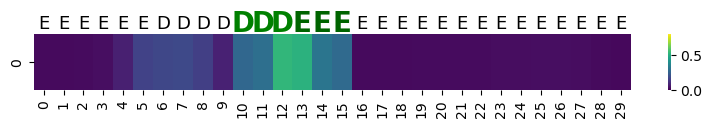

----------------------------------------
Matched no. 178: High attention at columns [25, 26, 27, 28, 29]
Scores: [0.2842968  0.50590536 0.51126317 0.43652309 0.28458721]
Sequence: EEEEEEEEEEEEEEEEEEEEEGGGGBBBAA


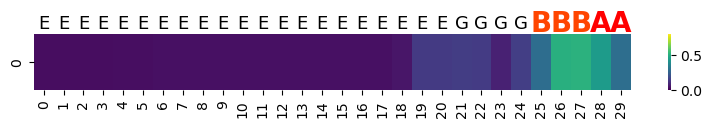

----------------------------------------
Matched no. 185: High attention at columns [0, 16, 17, 18, 19, 20]
Scores: [0.2887388  0.2895569  0.33930712 0.37959927 0.40453228 0.27194795]
Sequence: GGGBABAAAAAAAABBCCCCCCC


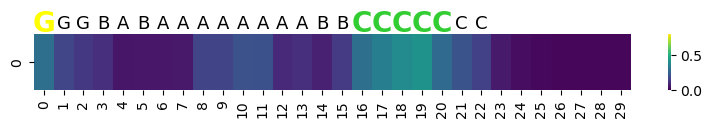

----------------------------------------
Matched no. 195: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.25428219 0.39224743 0.47122961 0.40763752 0.33321061]
Sequence: EEEEEEEEEDDDDDDDDDDDDDDDDDDDDD


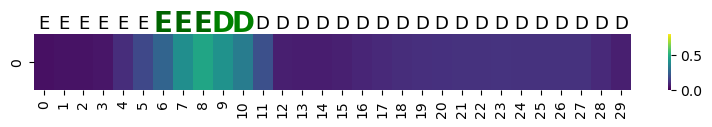

----------------------------------------
Matched no. 200: High attention at columns [21, 22, 23, 24, 25, 26, 27]
Scores: [0.27583647 0.34124832 0.39995416 0.31693666 0.35822409 0.35280739
 0.32101734]
Sequence: OOOOOOOOOOOOOOOOOOOOOIIIIIIIII


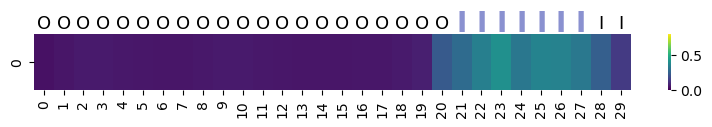

----------------------------------------
Matched no. 213: High attention at columns [0, 1, 3, 4, 5, 6, 7]
Scores: [0.53243022 0.30876702 0.26521256 0.26937524 0.38180284 0.368299
 0.28777385]
Sequence: GGGGGGOOOOOOOOOOO


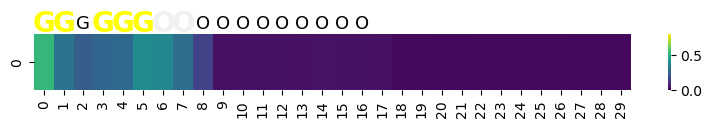

----------------------------------------
Matched no. 219: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.27719091 0.48161767 0.42407424 0.35795663 0.28580288]
Sequence: EEEEEEEEEE


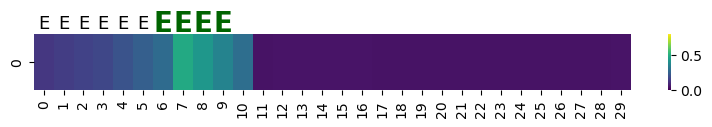

----------------------------------------
Matched no. 238: High attention at columns [21, 22, 23, 24, 25]
Scores: [0.27284335 0.37238832 0.39214853 0.36800629 0.25201463]
Sequence: IIIIIIIIIIIIIIHHHHHHHHHIIIIIII


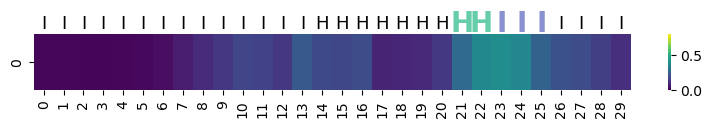

----------------------------------------
Matched no. 243: High attention at columns [18, 19, 20, 21, 22, 23]
Scores: [0.25042571 0.26784667 0.29644539 0.33102475 0.43463456 0.39008963]
Sequence: DDDDCCCCCCCCCCCCCCCCCAAAAA


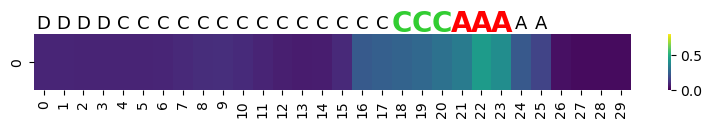

----------------------------------------
Matched no. 246: High attention at columns [6, 7, 8, 9, 10, 12, 13]
Scores: [0.27582238 0.34148908 0.34203704 0.38077448 0.30558407 0.29749662
 0.26352334]
Sequence: JMMMMMNNNMMMMMMMM


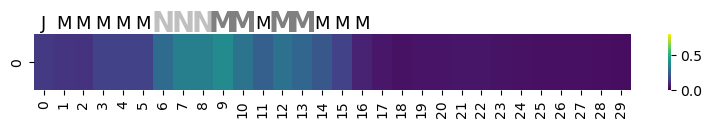

----------------------------------------
Matched no. 258: High attention at columns [15, 16, 17, 18, 19]
Scores: [0.26024136 0.52204847 0.45598585 0.41298472 0.31312285]
Sequence: EEEEEEEEEEEEEGGGGEEEEEEEEEEEEE


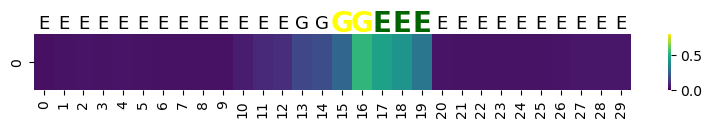

----------------------------------------
Matched no. 260: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.32731904 0.42249525 0.39620161 0.36913979 0.27947906]
Sequence: OOOOOOOOOOAAAAAAAAEEEEGGEEEEEE


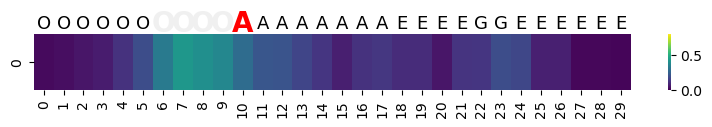

----------------------------------------
Matched no. 261: High attention at columns [0, 7, 8, 9, 10, 11]
Scores: [0.35044039 0.27403385 0.34270531 0.30129097 0.33328921 0.32971793]
Sequence: OOOOOOOOOAAAAAAEEEGGGGEEEEEEEE


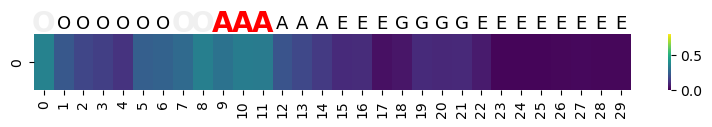

----------------------------------------
Matched no. 267: High attention at columns [0, 1, 2, 3, 4]
Scores: [0.43796294 0.57304231 0.426891   0.34884721 0.28198948]
Sequence: EEDDDDEEEEEEEEEEEEEEEEEEEEEEEE


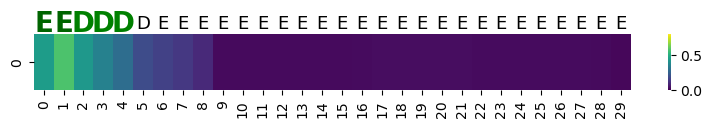

----------------------------------------
Matched no. 269: High attention at columns [23, 24, 25, 26, 27, 28]
Scores: [0.34870367 0.3652777  0.38054386 0.50881452 0.28024042 0.25833756]
Sequence: EEAAAAAAAAAAAAAAAAAAAAEFFFFEEE


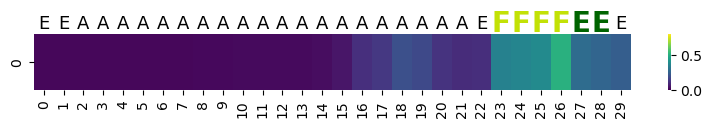

----------------------------------------
Matched no. 271: High attention at columns [8, 9, 10, 11, 12, 15, 16, 17, 18]
Scores: [0.28089939 0.37379322 0.32791606 0.30870323 0.25163395 0.29180737
 0.30625019 0.31350882 0.30289067]
Sequence: OOOOOGGGBBAABBBBBBBGGGGGGGGGGG


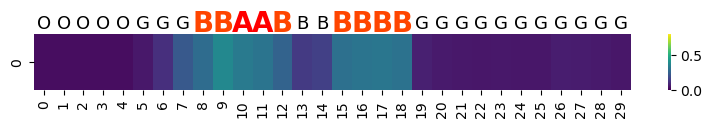

----------------------------------------
Matched no. 272: High attention at columns [2, 3, 4, 5, 6, 7]
Scores: [0.3490843  0.32344906 0.54532949 0.45206462 0.309167   0.25118558]
Sequence: OGGGBNNNNNNNNNNNNNNNNNNNNNNNNN


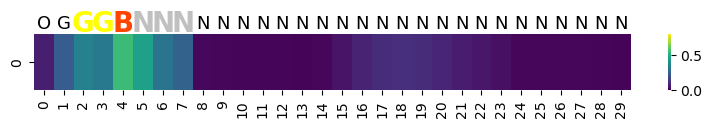

----------------------------------------
Matched no. 273: High attention at columns [5, 6, 7, 8, 9]
Scores: [0.28524128 0.45380866 0.44165772 0.40064733 0.25221288]
Sequence: EEEEEGBAAAAAAAAAAAAAAAAAAAAAAE


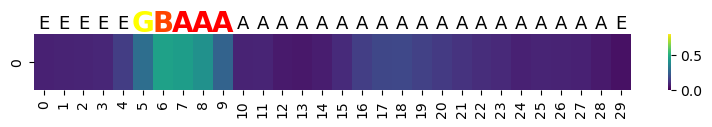

----------------------------------------
Matched no. 279: High attention at columns [7, 8, 9, 10, 11]
Scores: [0.31736847 0.37369615 0.44591717 0.44270275 0.2710031 ]
Sequence: OOOOOOOOOOAAAAAAAAAAOOOOOOOOOO


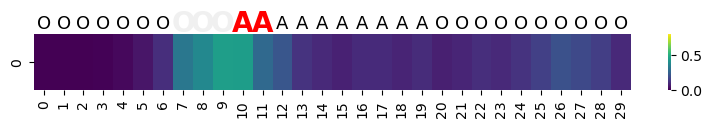

----------------------------------------
Matched no. 283: High attention at columns [17, 18, 19, 20, 21]
Scores: [0.28013947 0.42712091 0.34538488 0.35000293 0.36015952]
Sequence: OOOOOOOAAAAAAAAAAAAOOOOOOOOOOO


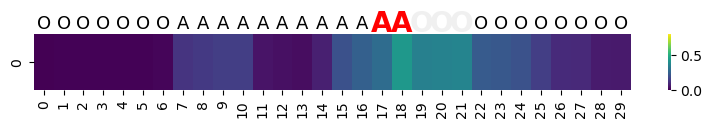

----------------------------------------
Matched no. 294: High attention at columns [12, 13, 14, 15, 16, 17]
Scores: [0.27527899 0.32635301 0.38065757 0.45506084 0.37302244 0.33582782]
Sequence: NNNNNNLNNNNNNMMMEEEEEEEDDDDDDD


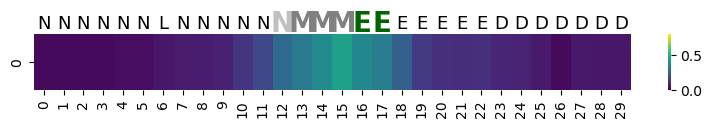

----------------------------------------
Matched no. 301: High attention at columns [11, 12, 13, 14, 15, 16, 17]
Scores: [0.26205783 0.27262541 0.28208609 0.33012638 0.27333339 0.29957574
 0.38358887]
Sequence: BBBBAAAABABBBBBABABBGEEEEEEEEE


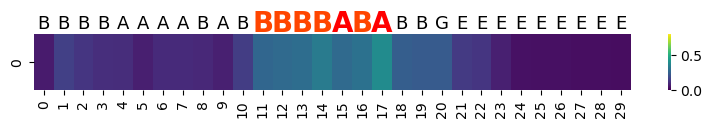

----------------------------------------
Matched no. 309: High attention at columns [16, 17, 18, 19, 20]
Scores: [0.33292051 0.45880799 0.41338286 0.37655518 0.27153653]
Sequence: OOOGGGAAAAAAAAAAAAOOOOOOOOOOOO


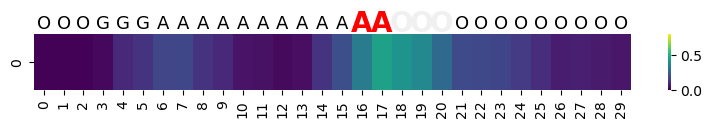

----------------------------------------
Matched no. 311: High attention at columns [21, 22, 23, 24, 25]
Scores: [0.33157419 0.51472104 0.45454392 0.40551371 0.27507921]
Sequence: OOOOOOOOOOOOOOOOOIIIIIHEEEEEEE


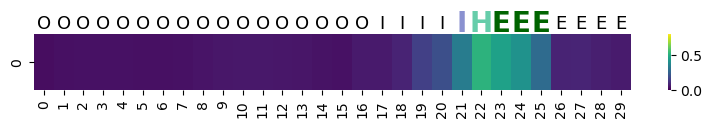

----------------------------------------
Matched no. 319: High attention at columns [4, 5, 6, 7, 8, 9]
Scores: [0.28264446 0.2989258  0.48010192 0.3340536  0.30718579 0.27874978]
Sequence: BBBBBBBAAAAAAAAAAAA


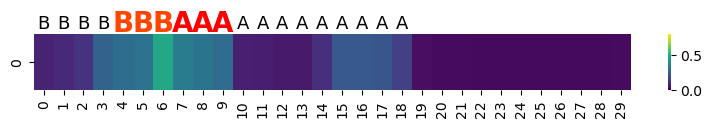

----------------------------------------
Matched no. 324: High attention at columns [14, 15, 16, 17, 18]
Scores: [0.29256107 0.37252615 0.42593446 0.45667985 0.293894  ]
Sequence: NMMMKKJKJJJJJJKMMMMMMNNNNNNNNN


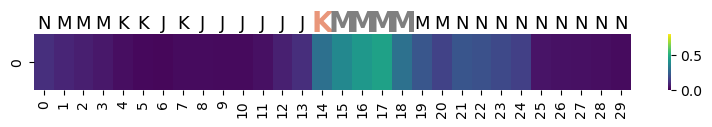

----------------------------------------
Matched no. 325: High attention at columns [14, 15, 16, 17, 18]
Scores: [0.2769374  0.29665979 0.44737972 0.3667999  0.27653357]
Sequence: NNNNNNNNNNNNNNNNGBBB


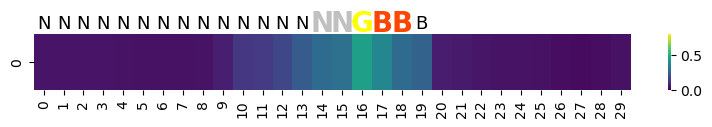

----------------------------------------
Matched no. 331: High attention at columns [11, 12, 13, 14, 15]
Scores: [0.36934108 0.30210666 0.48110433 0.46210519 0.32900071]
Sequence: EEEEAAAAAAAAABEEEEEEEEEEEEEEEE


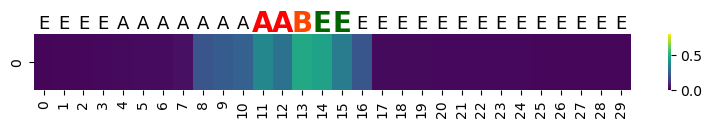

----------------------------------------
Matched no. 348: High attention at columns [16, 17, 18, 19, 20]
Scores: [0.25795724 0.46040916 0.46338003 0.29705521 0.25969984]
Sequence: EEEEEEEGGGEEEEEEEEFFFFFFDDDDDD


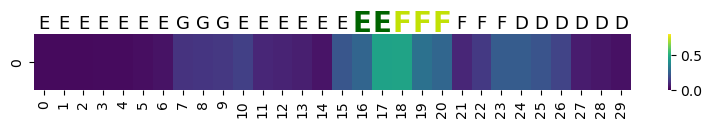

----------------------------------------
Matched no. 351: High attention at columns [17, 18, 19, 20, 21, 22]
Scores: [0.25954834 0.27688546 0.46966466 0.38232671 0.32288446 0.25721914]
Sequence: EEEEEEEGGBAAAAAAAACCAAAAEEEEFF


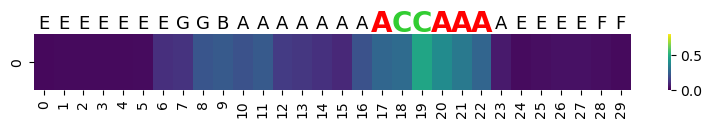

----------------------------------------
Matched no. 352: High attention at columns [24, 25, 26, 27, 28]
Scores: [0.30465175 0.47172348 0.51258631 0.49852945 0.33114126]
Sequence: OOOOOOOOOOOOOOOOOOOOOOOOOEEEEE


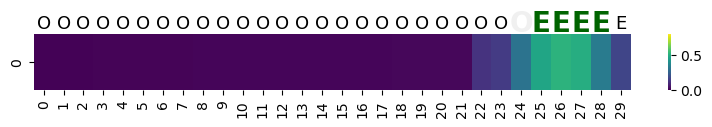

----------------------------------------
Matched no. 360: High attention at columns [20, 21, 22, 23, 24, 25]
Scores: [0.26675828 0.25725858 0.33376187 0.3977121  0.27825181 0.25577224]
Sequence: EEEEEFFFFFFFCCCCCCCCCCAAAAA


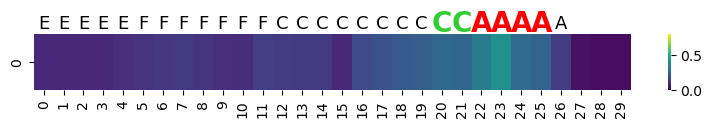

----------------------------------------
Matched no. 361: High attention at columns [23, 24, 25, 26, 27, 28]
Scores: [0.27355109 0.33396545 0.42421308 0.39062062 0.34689915 0.26948891]
Sequence: EEAAAAAAAAAAAAAAAAAAAEEEEEEEDD


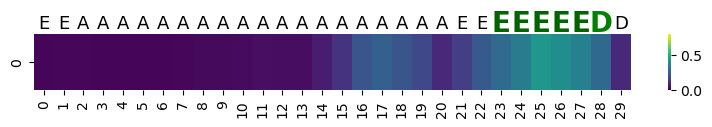

----------------------------------------
Matched no. 366: High attention at columns [15, 16, 17, 18, 19]
Scores: [0.33905413 0.40892586 0.39604393 0.38984599 0.2794735 ]
Sequence: OIIIINNNMMMJJLLLMMNNNNNNNNNNNO


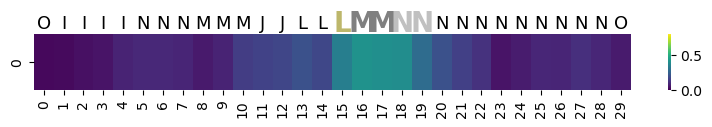

----------------------------------------
Matched no. 372: High attention at columns [5, 6, 7, 8, 9]
Scores: [0.3424156  0.4442594  0.49008461 0.46577259 0.26148195]
Sequence: EEEEEEEEGGGGGGGGGGG


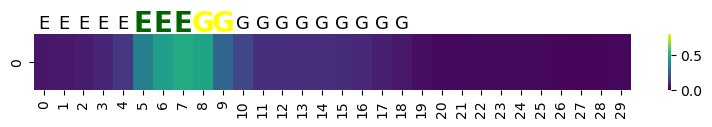

----------------------------------------
Matched no. 378: High attention at columns [18, 19, 20, 21, 22]
Scores: [0.39070927 0.43287945 0.49751124 0.47059787 0.28275314]
Sequence: OOOOGBBAAAAAAAAAAAABFFFDDDDDDE


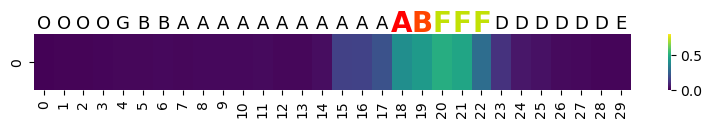

----------------------------------------
Matched no. 389: High attention at columns [10, 11, 12, 13, 14]
Scores: [0.32491252 0.46973009 0.51150822 0.47545951 0.30438427]
Sequence: NNNNNNNNNNNBAAAAAAAABEEEEEEEEE


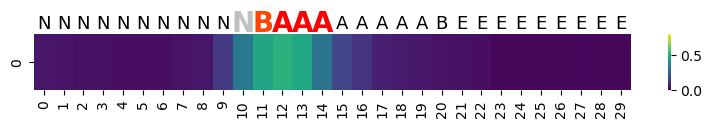

----------------------------------------
Matched no. 391: High attention at columns [24, 25, 26, 27, 28]
Scores: [0.30295709 0.37531333 0.47700881 0.47266833 0.27033908]
Sequence: GGGGGGGGGGFFFFFFFFFFFFFFFEEEAB


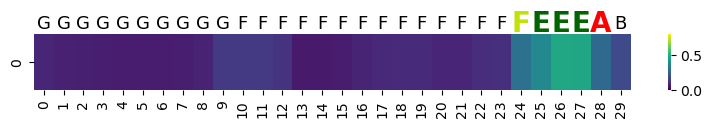

----------------------------------------
Matched no. 392: High attention at columns [20, 21, 22, 23, 24, 25, 26]
Scores: [0.33627597 0.45291554 0.33154291 0.41967245 0.38797966 0.27274085
 0.25259251]
Sequence: EEEEDDDDDDDDDDDDDDDDDEEEEDDDDD


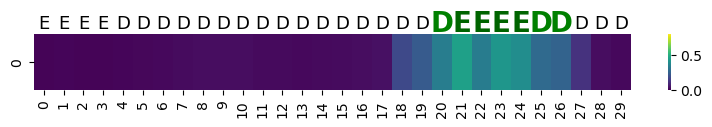

----------------------------------------
Matched no. 395: High attention at columns [16, 17, 18, 19, 20, 21, 22]
Scores: [0.26891716 0.29950319 0.30592056 0.34365751 0.33369756 0.3449703
 0.34194787]
Sequence: FFFGGBBBBAAAAAAACCCCCCFFFFDDDD


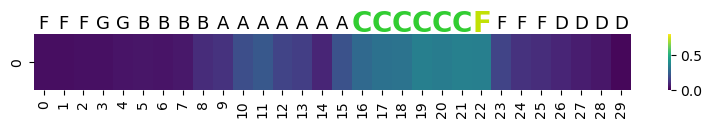

----------------------------------------
Matched no. 399: High attention at columns [9, 10, 11, 12, 13, 14]
Scores: [0.28800634 0.40982477 0.40036515 0.48142919 0.38028605 0.25925729]
Sequence: EEEEEEEEEEGGGEEEEEEEEEEEEEEEEE


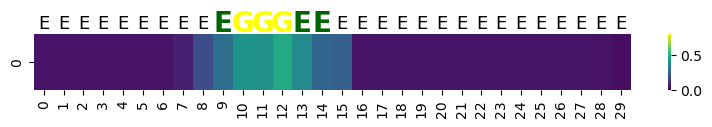

----------------------------------------
Matched no. 413: High attention at columns [24, 25, 26, 27, 28]
Scores: [0.30465175 0.47172348 0.51258631 0.49852945 0.33114126]
Sequence: OOOOOOOOOOOOOOOOOOOOOOOOOEEEEE


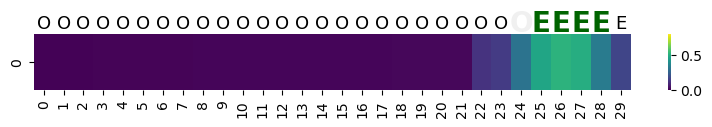

----------------------------------------
Matched no. 415: High attention at columns [21, 22, 23, 24, 25, 26, 27]
Scores: [0.28756638 0.37151573 0.32526761 0.36621065 0.3641477  0.37760909
 0.35152524]
Sequence: DDDDDDDDDDDDDDDDDDDDDFDDFDDDDD


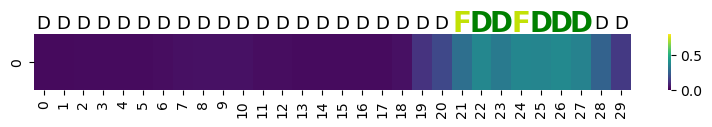

----------------------------------------
Matched no. 416: High attention at columns [8, 9, 10, 11, 12, 13]
Scores: [0.32524219 0.35133556 0.45756245 0.52567091 0.32631122 0.29409903]
Sequence: OOOOOOOOAAAAOOOOOOOOOOOOOOOOOO


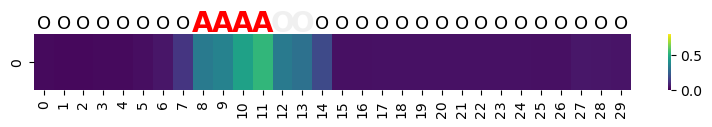

----------------------------------------
Matched no. 426: High attention at columns [7, 8, 9, 10, 11]
Scores: [0.28671087 0.37851576 0.56248576 0.55481635 0.30399244]
Sequence: BBBAAAAABBOOOOOOOOOOOOOOOOOOOO


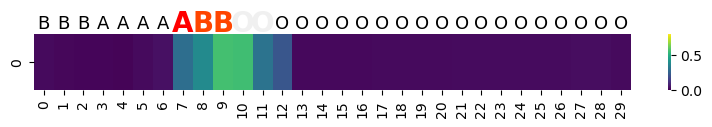

----------------------------------------
Matched no. 430: High attention at columns [9, 10, 11, 12, 13, 17, 18, 19]
Scores: [0.27856737 0.28172747 0.46213371 0.36920079 0.30022851 0.25688754
 0.26657045 0.28167439]
Sequence: DDDDDDEEEEBAAAABBGFFFDDDDDDDDD


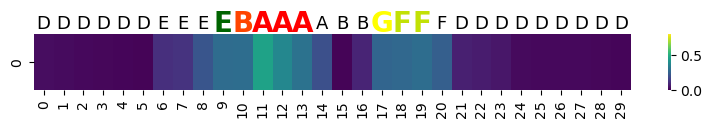

----------------------------------------
Matched no. 432: High attention at columns [8, 9, 10, 11, 12]
Scores: [0.34266962 0.44700379 0.43528176 0.49593129 0.30324968]
Sequence: AAAAAAAAAAAABC


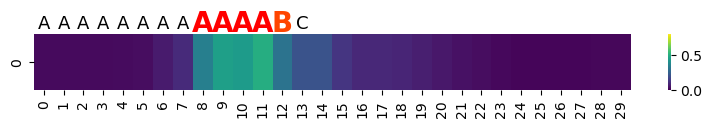

----------------------------------------
Matched no. 438: High attention at columns [12, 13, 14, 15, 16]
Scores: [0.25902401 0.26097173 0.32094962 0.30374352 0.26051243]
Sequence: GGGGGGEEEEEBBKKKBAA


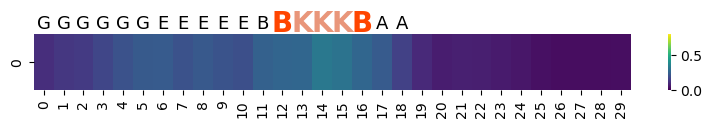

----------------------------------------
Matched no. 464: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.28355923 0.49912715 0.4602104  0.38497207 0.28359621]
Sequence: OOOOOAAAAA


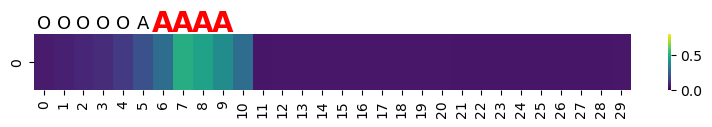

----------------------------------------
Matched no. 468: High attention at columns [23, 24, 25, 26, 27, 28]
Scores: [0.25198003 0.36682762 0.38877586 0.39672644 0.40326427 0.271946  ]
Sequence: EEEEEEEEEEEEEEEEEEEEEEEEEDDDDD


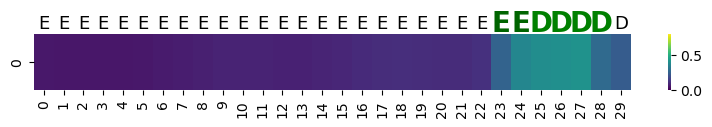

----------------------------------------
Matched no. 482: High attention at columns [7, 8, 9, 10, 11, 12]
Scores: [0.29511034 0.33212503 0.40564202 0.45719839 0.35461437 0.28475362]
Sequence: EEEEEEEEEEEDDDDDDDDDDDDDDDDDDD


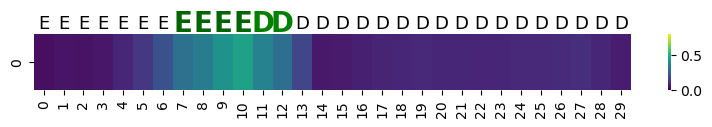

----------------------------------------
Matched no. 484: High attention at columns [6, 7, 8, 9, 10, 11]
Scores: [0.27407059 0.31984371 0.38337729 0.33235209 0.30080725 0.30031024]
Sequence: GGGGGBBFFCCCCBBAAAAAAAA


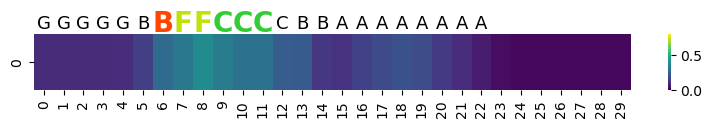

----------------------------------------
Matched no. 494: High attention at columns [19, 20, 21, 22, 23]
Scores: [0.26120526 0.37440908 0.38577966 0.45211123 0.41453739]
Sequence: BBBBABAAAAAAAAAAAAAABBBCCCCCFF


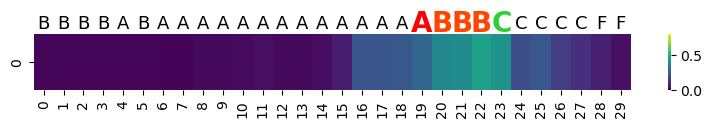

----------------------------------------
Matched no. 495: High attention at columns [18, 19, 20, 21, 22]
Scores: [0.36216494 0.45805624 0.50149476 0.42194205 0.26123887]
Sequence: GGBABAAAAAAAAAAAAAHHHAAAACCCCC


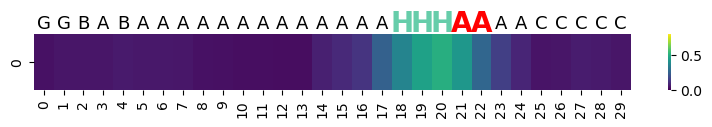

----------------------------------------
Matched no. 503: High attention at columns [0, 1, 2, 3, 4, 5]
Scores: [0.2583443  0.29934734 0.39354072 0.4085625  0.42816173 0.35253798]
Sequence: IIIIIOOOOOOOOOOO


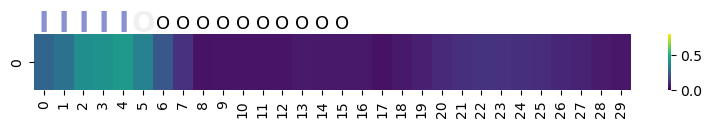

----------------------------------------
Matched no. 507: High attention at columns [16, 17, 18, 19, 20, 21, 22]
Scores: [0.26167635 0.34786843 0.37880686 0.38303832 0.33528701 0.27927507
 0.2629451 ]
Sequence: DDDDDDDDDDDDDDDFFFFFFFFFFFFFDD


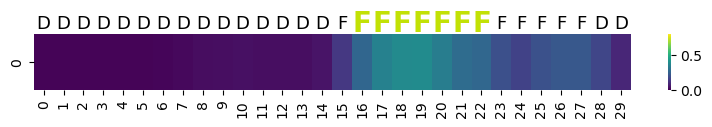

----------------------------------------
Matched no. 512: High attention at columns [11, 12, 13, 14, 15, 16]
Scores: [0.25807282 0.32096414 0.38742716 0.32717393 0.2952062  0.26051605]
Sequence: OOOOOOOOOOOOOGGGGG


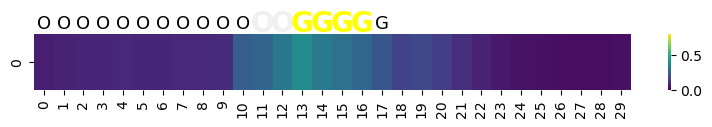

----------------------------------------
Matched no. 514: High attention at columns [19, 20, 22, 23, 24, 25, 26]
Scores: [0.29179243 0.26101923 0.29144508 0.33472811 0.35589384 0.35508383
 0.3421887 ]
Sequence: EEEEEEDDDDDDDDDDDFFFFFFFCCCCCC


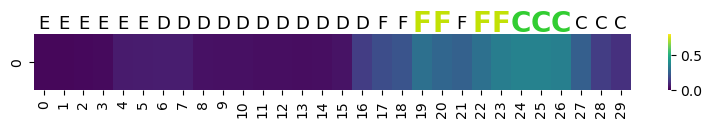

----------------------------------------
Matched no. 516: High attention at columns [10, 11, 12, 13, 14, 15]
Scores: [0.29233285 0.2940259  0.38034068 0.46246245 0.33790453 0.38586871]
Sequence: OOGGGGGBBAAABABBBGGGGGGGGGGGGG


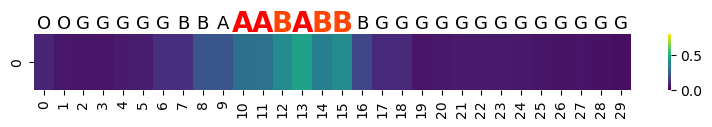

----------------------------------------
Matched no. 519: High attention at columns [21, 22, 23, 24, 25]
Scores: [0.28627032 0.29877479 0.28962976 0.28238316 0.26522426]
Sequence: OOOOOOOOOOOOOOOOO


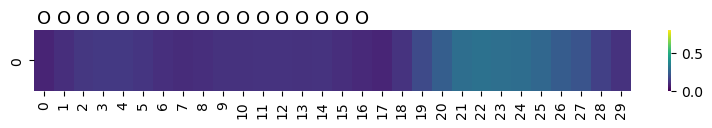

----------------------------------------
Matched no. 522: High attention at columns [2, 3, 4, 5, 6]
Scores: [0.37991586 0.45161984 0.49308031 0.45700088 0.2676826 ]
Sequence: OOOGGNNNNNNNNNNNNNNNNNNNNNNNNN


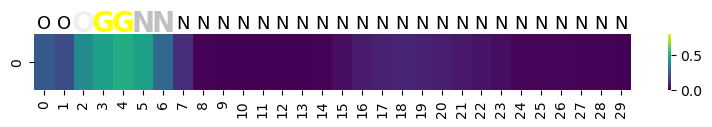

----------------------------------------
Matched no. 523: High attention at columns [9, 10, 11, 12, 13]
Scores: [0.27029773 0.35485912 0.32766795 0.28342415 0.35885118]
Sequence: EEEEEEEEEEEEEEDDDDDDDDDDDDDDDD


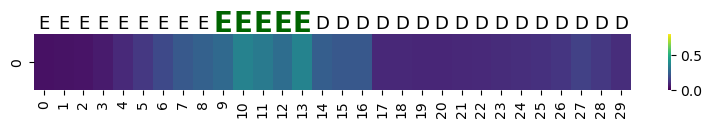

----------------------------------------
Matched no. 524: High attention at columns [21, 22, 23, 24, 25, 26]
Scores: [0.27476655 0.26120522 0.32585109 0.35661743 0.33694744 0.28625837]
Sequence: EEEEEEEFFFFFFFFFFFFCCCCBAAAAA


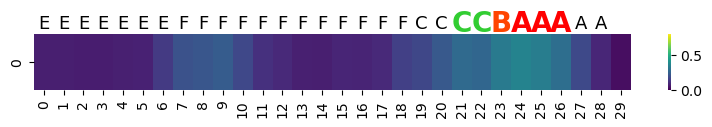

----------------------------------------
Matched no. 544: High attention at columns [18, 19, 20, 21, 22]
Scores: [0.30333778 0.51297367 0.41169686 0.37591441 0.30794425]
Sequence: OOOABBBAAAAAAAAABBBCFEEEEEEEEE


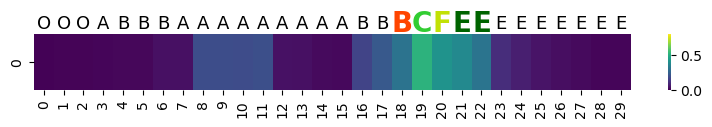

----------------------------------------
Matched no. 546: High attention at columns [13, 14, 15, 16, 17, 18, 19]
Scores: [0.26847359 0.28181574 0.38774686 0.35251402 0.32366491 0.37250723
 0.27845166]
Sequence: NNNNNNNNNNNNNNNMMMMMMNNNNNNNNN


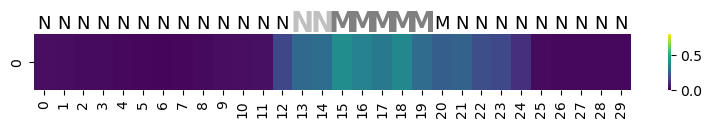

----------------------------------------
Matched no. 547: High attention at columns [11, 12, 13, 14, 15, 18]
Scores: [0.29997432 0.35715163 0.33639856 0.30564248 0.26439194 0.30059506]
Sequence: OOAAAAAAAAAAAAAAOOOOOO


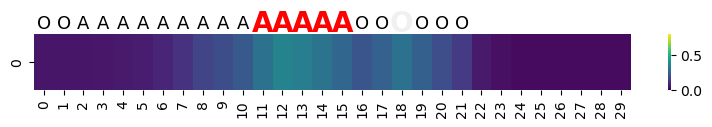

----------------------------------------
Matched no. 549: High attention at columns [6, 7, 8, 9, 23, 24, 25, 26, 27]
Scores: [0.25463078 0.26025183 0.31118217 0.29168377 0.26555761 0.31334471
 0.26302674 0.30089879 0.25387959]
Sequence: OOOOOOGAAAAAAAAAAAAAAAABABGGGG


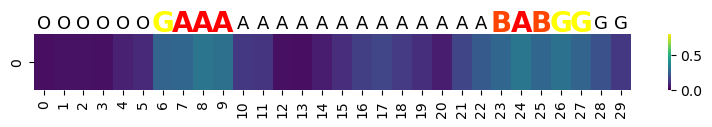

----------------------------------------
Matched no. 553: High attention at columns [7, 8, 9, 10, 11, 12]
Scores: [0.29511034 0.33212503 0.40564202 0.45719839 0.35461437 0.28475362]
Sequence: EEEEEEEEEEEDDDDDDDDDDDDDDDDDDD


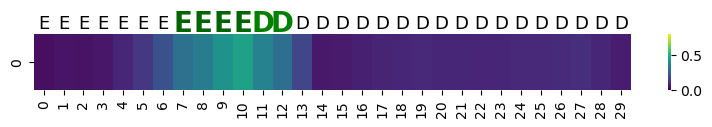

----------------------------------------
Matched no. 556: High attention at columns [1, 2, 3, 4, 5]
Scores: [0.43141887 0.44399101 0.43547933 0.46036353 0.26390742]
Sequence: JJJKLNNNNNNNOOOOOOOOOOOOOOOOOO


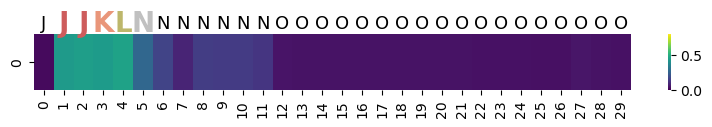

----------------------------------------
Matched no. 558: High attention at columns [1, 2, 3, 4, 5, 6, 7]
Scores: [0.33262695 0.28504435 0.30401302 0.42033951 0.43889451 0.39815213
 0.31478392]
Sequence: BBAAABEEEEEEEEEEEEEEEEEEEEEEEE


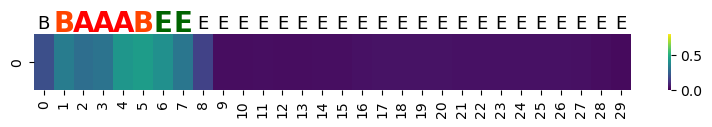

----------------------------------------
Matched no. 564: High attention at columns [8, 9, 10, 11, 12, 13]
Scores: [0.28143777 0.31903699 0.33961214 0.3472074  0.39273501 0.31356448]
Sequence: EEEEEEEEEEEEEDDDDDDDDDDDDDDDDD


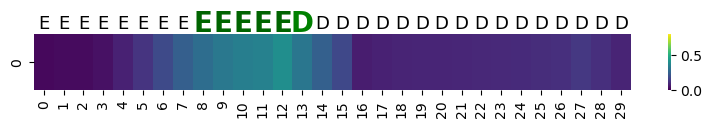

----------------------------------------
Matched no. 568: High attention at columns [6, 7, 8, 9, 10, 11, 12]
Scores: [0.31772306 0.29295537 0.26702146 0.35529398 0.29369543 0.32578099
 0.31819932]
Sequence: EEEEEEEEEEAAAAAAAAE


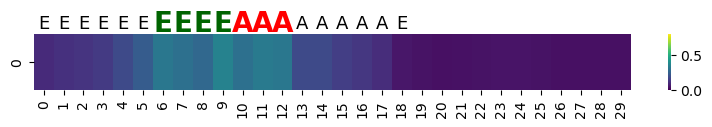

----------------------------------------
Matched no. 573: High attention at columns [21, 22, 23, 24, 25, 26, 27]
Scores: [0.27044636 0.32261038 0.40864437 0.52698977 0.37836218 0.3391259
 0.26532911]
Sequence: DDDDDDDDDDDDDDDDDDDDDDDDEEEEEE


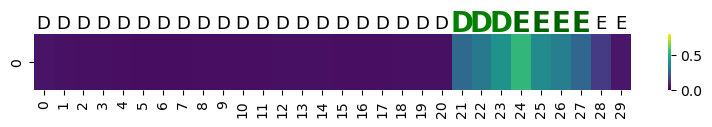

----------------------------------------
Matched no. 581: High attention at columns [10, 11, 12, 13, 14, 15, 16, 17]
Scores: [0.28343438 0.28441111 0.30081976 0.28867012 0.3686914  0.38788239
 0.3507713  0.33994043]
Sequence: IIIIIIOAAAAAAAGGIIIIIIIIIIIIII


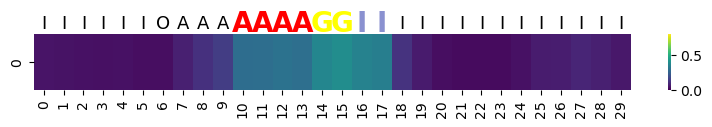

----------------------------------------
Matched no. 582: High attention at columns [16, 17, 18, 19, 20, 21, 22]
Scores: [0.33407031 0.34318651 0.33303571 0.33870507 0.27934675 0.33602539
 0.32672647]
Sequence: EEEEEGGGGGGGGGGBBBBBAAAAAAAAAA


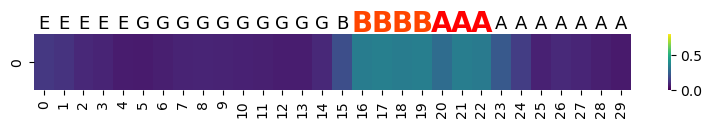

----------------------------------------
Matched no. 593: High attention at columns [23, 24, 25, 26, 27]
Scores: [0.36611527 0.41838753 0.43094479 0.41329842 0.25719199]
Sequence: DDDDDDDDDDDDDDDDDDDDDDDDDDEEEE


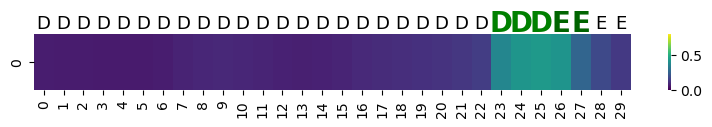

----------------------------------------
Matched no. 595: High attention at columns [4, 5, 6, 7, 8, 9]
Scores: [0.2916137  0.30237346 0.50868627 0.47659428 0.2755511  0.25323501]
Sequence: IIIHABBAAAAAAAAAAAAAAAAAAAAAAA


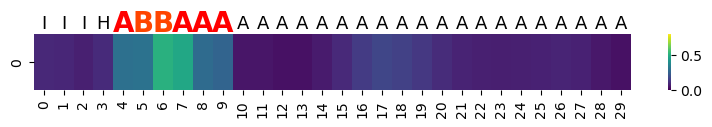

----------------------------------------
Matched no. 605: High attention at columns [5, 6, 7, 8, 9, 10]
Scores: [0.31741781 0.38908341 0.43746902 0.4717103  0.28243484 0.2522242 ]
Sequence: OOOOOOOOOAAAAAAAAAAEEEEGGEEEEE


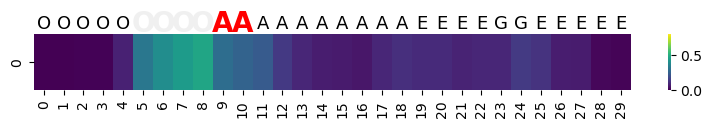

----------------------------------------
Matched no. 607: High attention at columns [24, 25, 26, 27, 28]
Scores: [0.30471335 0.36768011 0.46721304 0.46270627 0.27055524]
Sequence: OOOOOOOOOOEEEEEEEEEEEEEEEEEOOOO


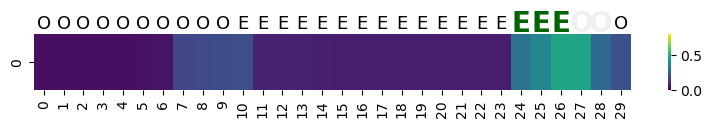

----------------------------------------
Matched no. 612: High attention at columns [18, 19, 20, 21, 22]
Scores: [0.32728141 0.44719461 0.32855501 0.33161264 0.26252286]
Sequence: BBBBBBBBBAABBBBBBBACCCFFFFFFFD


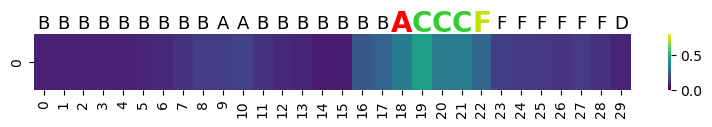

----------------------------------------
Matched no. 615: High attention at columns [7, 8, 9, 10, 11, 12, 13]
Scores: [0.27121185 0.25171501 0.27249687 0.36085171 0.32772016 0.27519157
 0.33677592]
Sequence: EEEDDEEEEEEEEEDDDDDDDDDDDDDDDD


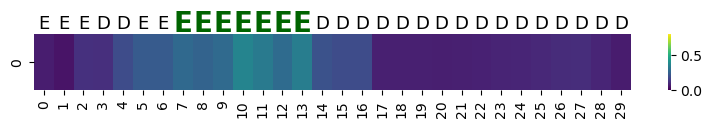

----------------------------------------
Matched no. 622: High attention at columns [12, 13, 14, 15, 16]
Scores: [0.27163356 0.27768271 0.46753804 0.46592196 0.36178845]
Sequence: NNNNNNNGBBAAABBEEEEEEGGEEEEEEE


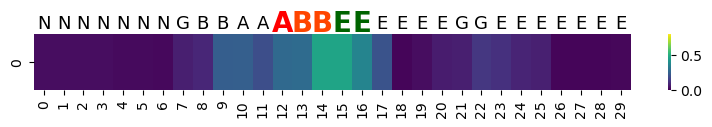

----------------------------------------
Matched no. 623: High attention at columns [4, 5, 6, 7, 8]
Scores: [0.25377737 0.36424029 0.44430477 0.39514908 0.30825018]
Sequence: IIOOOOOIOOOOOOOO


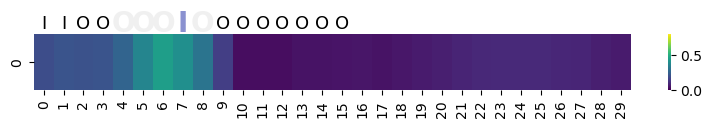

----------------------------------------
Matched no. 627: High attention at columns [21, 22, 23, 24, 25]
Scores: [0.3184134  0.41615965 0.53412649 0.33855395 0.32235198]
Sequence: AAAABEEDDDDDDDDDDDDDDDDEEEEDDD


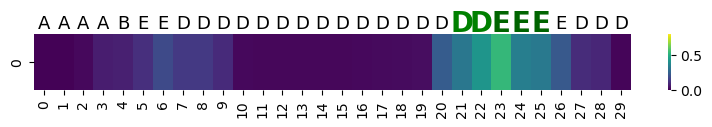

----------------------------------------
Matched no. 632: High attention at columns [5, 6, 7, 8, 9]
Scores: [0.25186579 0.35615149 0.48205711 0.43271382 0.31846936]
Sequence: AEEEEEEEDDDDDDDDDDDDDDDDDDDDDD


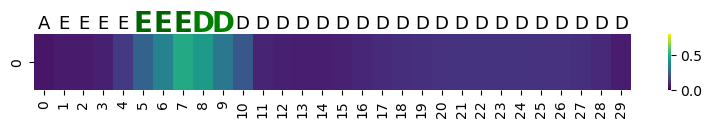

----------------------------------------
Matched no. 634: High attention at columns [17, 18, 19, 20, 21, 22]
Scores: [0.2958151  0.26529194 0.36005696 0.30093399 0.29614583 0.25242349]
Sequence: OOOOOOAAAAAAAAAAAAEGGGEEEEEEEE


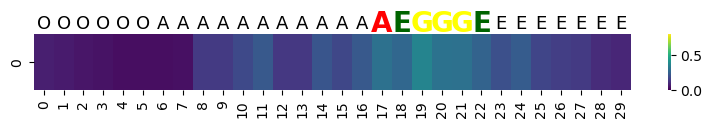

----------------------------------------
Matched no. 640: High attention at columns [7, 8, 9, 10, 11, 12]
Scores: [0.29511034 0.33212503 0.40564202 0.45719839 0.35461437 0.28475362]
Sequence: EEEEEEEEEEEDDDDDDDDDDDDDDDDDDD


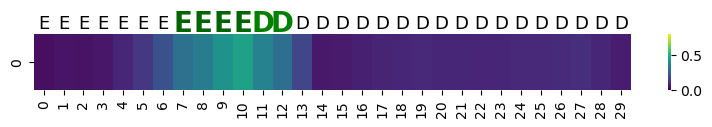

----------------------------------------
Matched no. 641: High attention at columns [4, 5, 6, 7, 8]
Scores: [0.25561386 0.31656704 0.40179054 0.40918959 0.28749571]
Sequence: BGGGGGFDDDDDDDDDD


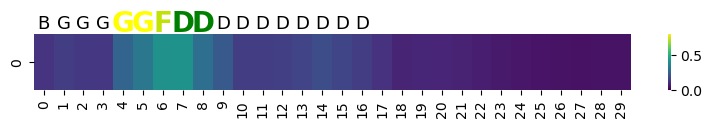

----------------------------------------
Matched no. 645: High attention at columns [2, 3, 4, 5, 6]
Scores: [0.45200996 0.41193794 0.41010023 0.48567921 0.26546129]
Sequence: ABGEEGGGOOOOOOOOOOOOOOOOOOOOOO


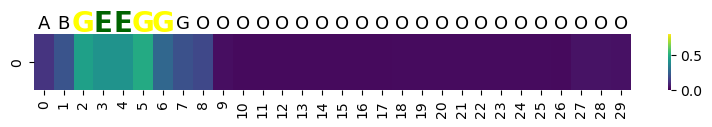

----------------------------------------
Matched no. 646: High attention at columns [14, 15, 16, 17, 18, 19]
Scores: [0.30006975 0.31086892 0.48445832 0.50741767 0.31123255 0.32633667]
Sequence: EEAAAAAAAAAAAAABBFFDDDDDDDDDDD


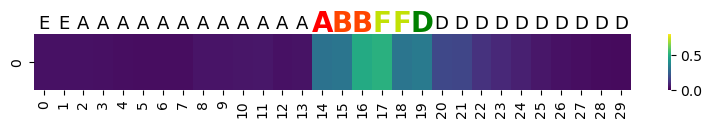

----------------------------------------
Matched no. 648: High attention at columns [1, 2, 3, 4, 5, 11, 12, 13]
Scores: [0.26185476 0.28014867 0.28577209 0.27845426 0.25038142 0.28367788
 0.27026337 0.25151693]
Sequence: EEEEEEEEEEEEGG


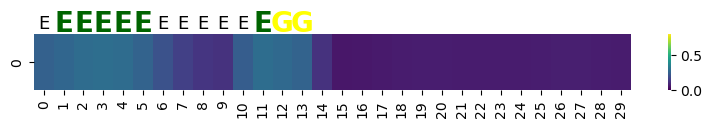

----------------------------------------
Matched no. 650: High attention at columns [24, 25, 26, 27, 28]
Scores: [0.38176541 0.51782163 0.4789866  0.44392476 0.2597695 ]
Sequence: DDDDDDDDDDDDDDDDDDDDDDFFFFFFEE


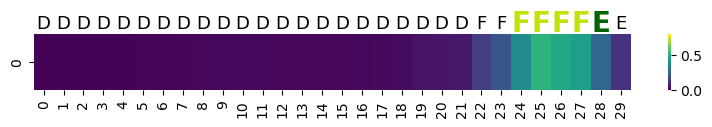

----------------------------------------
Matched no. 651: High attention at columns [16, 17, 18, 19, 20, 21]
Scores: [0.27962288 0.30344675 0.3623548  0.44221463 0.34173307 0.34399099]
Sequence: EEEEAAAAAAAAAEEEEEEAAAA


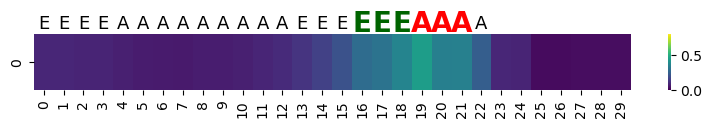

----------------------------------------
Matched no. 655: High attention at columns [8, 9, 14, 15, 16, 17, 18]
Scores: [0.29131103 0.25494139 0.28412557 0.37206412 0.25796506 0.36063375
 0.32765313]
Sequence: EEEEEEEBAAAAACCCCCFFFDDDDDDDDD


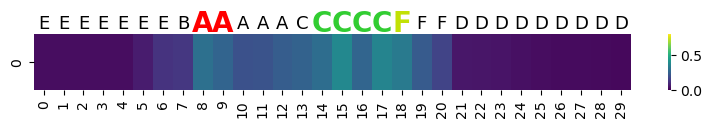

----------------------------------------
Matched no. 657: High attention at columns [10, 11, 12, 13, 14]
Scores: [0.26752502 0.37088859 0.4211197  0.43017296 0.41332012]
Sequence: OOOOOOOAABBBAAAAAAB


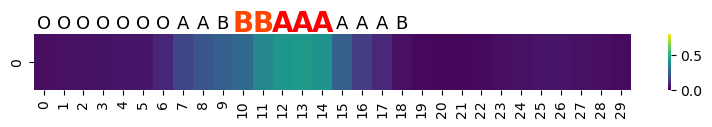

----------------------------------------
Matched no. 664: High attention at columns [21, 22, 23, 24, 25]
Scores: [0.28627032 0.29877479 0.28962976 0.28238316 0.26522426]
Sequence: OOOOOOOOOOOOOOOOO


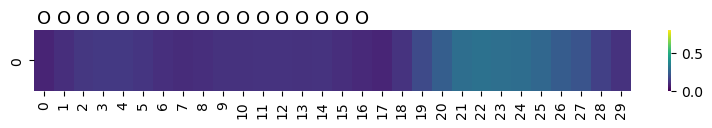

----------------------------------------
Matched no. 667: High attention at columns [11, 12, 13, 14, 15]
Scores: [0.26170024 0.42786774 0.51426114 0.387383   0.35686023]
Sequence: EEEEEEEEEEEFFFGBA


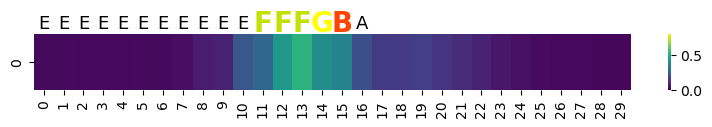

----------------------------------------
Matched no. 671: High attention at columns [16, 17, 18, 19, 20, 21, 22]
Scores: [0.25110285 0.30912816 0.33591814 0.30491517 0.27465614 0.26064997
 0.26300469]
Sequence: OOOOOOOOOOOOOOOIII


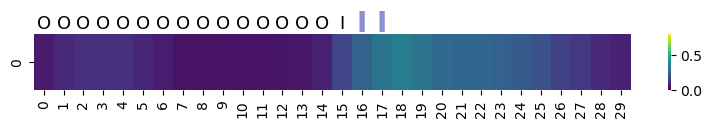

----------------------------------------
Matched no. 672: High attention at columns [15, 16, 17, 18, 19]
Scores: [0.25125541 0.30706581 0.34355401 0.35473619 0.25124436]
Sequence: GGGGGGGGGGGGGGGGFFFFFFFFFFFGGG


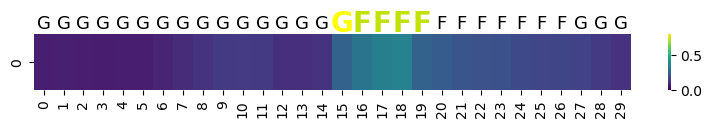

----------------------------------------
Matched no. 676: High attention at columns [20, 21, 22, 23, 24]
Scores: [0.26486265 0.400288   0.44047599 0.47493571 0.29596456]
Sequence: EEEEEEEEEEDDDDDDDDDDDDDEEEEEEE


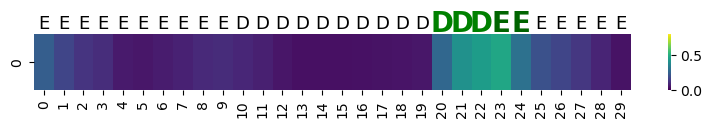

----------------------------------------
Matched no. 678: High attention at columns [16, 17, 18, 19, 20]
Scores: [0.31085246 0.38437762 0.53578291 0.48002991 0.25635759]
Sequence: EEEEDDDDDDEEEEEEEEAOOOOOOOOOOO


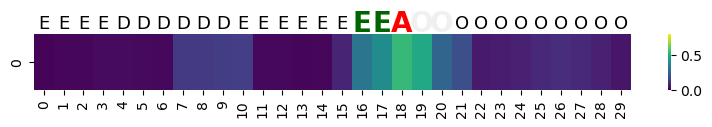

----------------------------------------
Matched no. 684: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.253089   0.45752238 0.40615944 0.34810882 0.29740925]
Sequence: NNNNNNNNNN


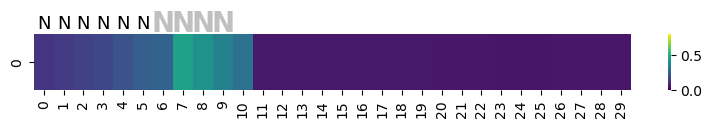

----------------------------------------
Matched no. 686: High attention at columns [10, 11, 12, 13, 14]
Scores: [0.39224648 0.41498875 0.41656667 0.43862736 0.25778429]
Sequence: OOOOOOOGAAJJAAABEEEEEEEEEEEEEE


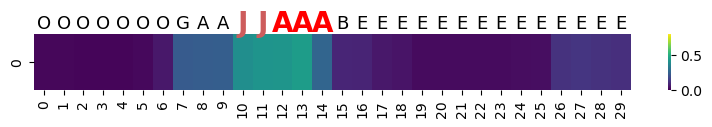

----------------------------------------
Matched no. 687: High attention at columns [19, 20, 21, 22, 23]
Scores: [0.25667386 0.41960583 0.43248624 0.31979965 0.25947817]
Sequence: BBBBBCAAAAAAAAABGEEEEFFFFFCCCC


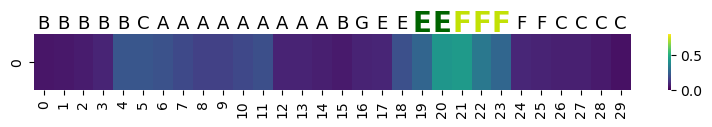

----------------------------------------
Matched no. 690: High attention at columns [15, 16, 17, 18, 19, 20]
Scores: [0.26920123 0.32700423 0.56785411 0.46161242 0.347663   0.29582093]
Sequence: EEEEEFFFDDDDDDFFFFDDDDDDDDFFFF


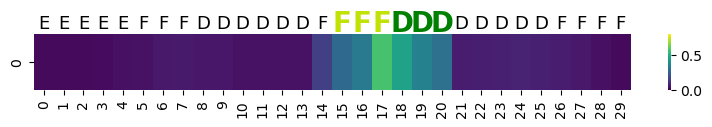

----------------------------------------
Matched no. 698: High attention at columns [9, 10, 11, 12, 13, 14, 15]
Scores: [0.25886136 0.29238436 0.39043082 0.31619539 0.4576946  0.41812427
 0.31153318]
Sequence: AAAAAAAAAAAAABEEEEEEEEEEEEEEEE


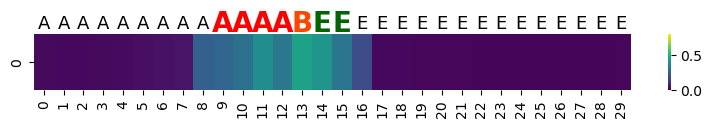

----------------------------------------
Matched no. 700: High attention at columns [24, 25, 26, 27, 28]
Scores: [0.31587015 0.51803336 0.5199656  0.46617708 0.28586798]
Sequence: FFDDDDDDDDDDDDDDDDDDDDDFFFFFFF


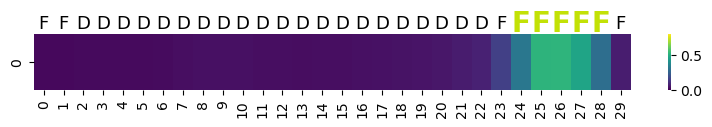

----------------------------------------
Matched no. 701: High attention at columns [8, 9, 10, 11, 12, 13, 14]
Scores: [0.33984824 0.32754888 0.28435457 0.39893241 0.37422924 0.35920435
 0.34684955]
Sequence: OOOOOOAAAAAAAEEEEEEEEEEEEEEEEE


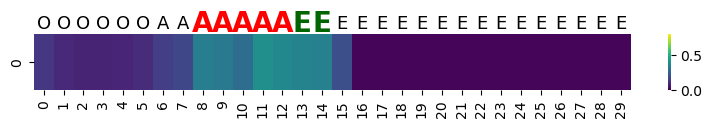

----------------------------------------
Matched no. 713: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.25428219 0.39224743 0.47122961 0.40763752 0.33321061]
Sequence: EEEEEEEEEDDDDDDDDDDDDDDDDDDDDD


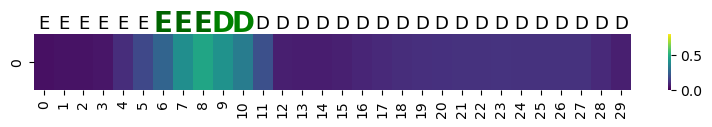

----------------------------------------
Matched no. 715: High attention at columns [14, 15, 16, 17, 18]
Scores: [0.25259894 0.47799738 0.4464898  0.41328101 0.26047672]
Sequence: OOOOOABBBBBBBBBGEEEEEEEEEEEEEE


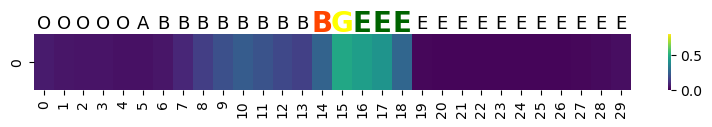

----------------------------------------
Matched no. 718: High attention at columns [12, 13, 14, 15, 16, 17]
Scores: [0.28456162 0.28620094 0.34819061 0.3731846  0.32060453 0.2718262 ]
Sequence: GGGGGGGGGGBBBBBBBGGGGGGGGGGGGG


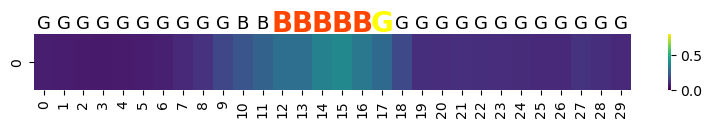

----------------------------------------
Matched no. 722: High attention at columns [24, 25, 26, 27, 28]
Scores: [0.28466733 0.37035009 0.46553855 0.43494763 0.33350985]
Sequence: DDDDDDDDDFFFDDDDDDDDDFFFFFFFFF


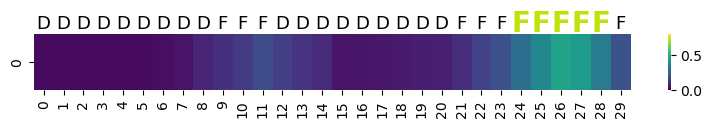

----------------------------------------
Matched no. 731: High attention at columns [7, 8, 9, 10, 11, 12]
Scores: [0.32644471 0.37446704 0.5102849  0.40412984 0.29546408 0.28775949]
Sequence: OOOOOOOOOGEEEDDDD


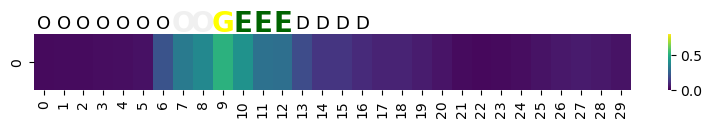

----------------------------------------
Matched no. 744: High attention at columns [20, 21, 22, 23, 24, 25]
Scores: [0.27606529 0.30040584 0.42157522 0.38482666 0.30709612 0.29328248]
Sequence: EEGGGGBBBAAAAAAAABCCCCCCCFDDDD


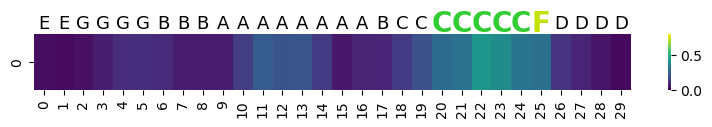

----------------------------------------
Matched no. 746: High attention at columns [23, 24, 25, 26, 27]
Scores: [0.33996055 0.39621998 0.41617304 0.39893647 0.27235399]
Sequence: EEEEEDDDDDDDDDDDDDDDDDDDDDEEEE


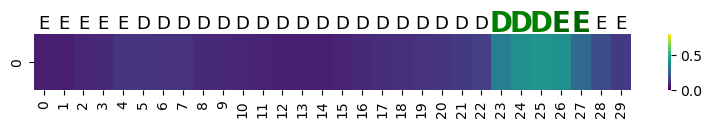

----------------------------------------
Matched no. 753: High attention at columns [0, 1, 2, 3, 4]
Scores: [0.3200127  0.51057184 0.4575404  0.43810869 0.3686732 ]
Sequence: EEEEGOOOOOOOOOO


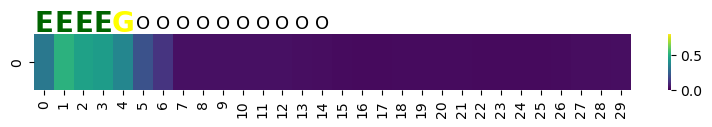

----------------------------------------
Matched no. 756: High attention at columns [8, 9, 10, 11, 12, 13]
Scores: [0.32152832 0.31735955 0.40750096 0.38631661 0.25428464 0.26976766]
Sequence: OOOOOOOOAAAAAAABGGGGGGGGGGGGGG


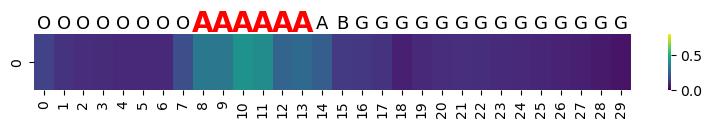

----------------------------------------
Matched no. 762: High attention at columns [8, 9, 10, 11, 12, 13]
Scores: [0.27005467 0.3124392  0.38850885 0.32414218 0.43574319 0.38101109]
Sequence: OOOOOIIIAAAAAOOOOOOOOOOOOOOOOO


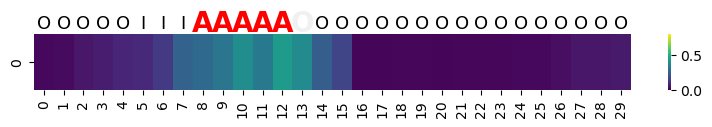

----------------------------------------
Matched no. 764: High attention at columns [7, 8, 9, 10, 11]
Scores: [0.32078686 0.44343446 0.40776428 0.41149967 0.3658572 ]
Sequence: OOOOOOOOOOOAAAAAAAAAAAAAAABBAA


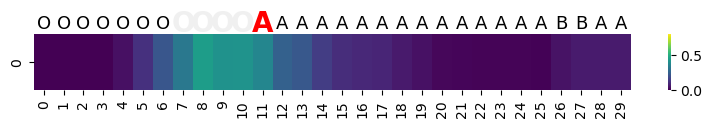

----------------------------------------
Matched no. 774: High attention at columns [17, 18, 19, 20, 21, 22]
Scores: [0.29587936 0.34907694 0.53228894 0.47151934 0.33839233 0.26389454]
Sequence: OOOOOOOAAAAAAAABBBGGOOOOOOOOGO


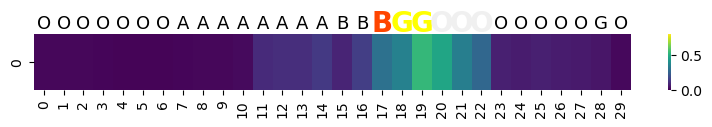

----------------------------------------
Matched no. 780: High attention at columns [7, 8, 9, 10, 11, 12, 13, 14]
Scores: [0.33643604 0.32533206 0.32247214 0.29691481 0.30194731 0.40461526
 0.2862462  0.25501233]
Sequence: GGGAAAABGGEEEDDDDDDDDDDDDDDDDD


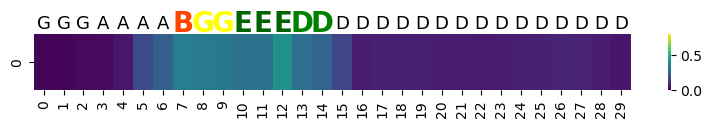

----------------------------------------
Matched no. 782: High attention at columns [2, 3, 4, 5, 6, 7, 8, 9]
Scores: [0.26710868 0.32334104 0.34490503 0.35707678 0.35193129 0.35879569
 0.34313758 0.28065138]
Sequence: IIIIIIIIIIOOOOOOOOOOOOOOOOO


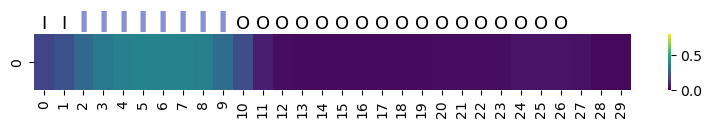

----------------------------------------
Matched no. 785: High attention at columns [2, 3, 4, 5, 6]
Scores: [0.36617271 0.39172363 0.51024711 0.4667233  0.29176538]
Sequence: OIIIIOOOOOOOOOOOOOOOOOOO


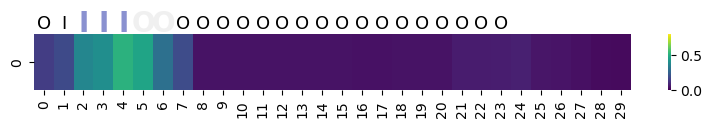

----------------------------------------
Matched no. 788: High attention at columns [13, 14, 15, 16, 17, 18, 19, 20]
Scores: [0.34191222 0.29434411 0.33720367 0.31530544 0.26098353 0.27005129
 0.262472   0.28524693]
Sequence: EBBBABAAAABCCCCCFFFCCCCCCCCCCC


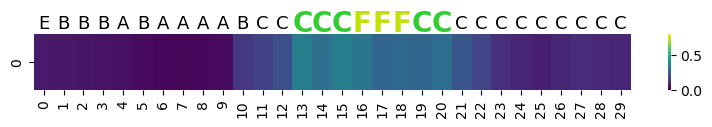

----------------------------------------
Matched no. 791: High attention at columns [6, 7, 8, 9, 10, 11]
Scores: [0.25562199 0.25569188 0.480512   0.39592729 0.33809282 0.31091879]
Sequence: NNNNNBBBAAA


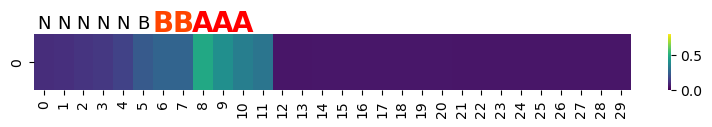

----------------------------------------
Matched no. 792: High attention at columns [7, 8, 9, 10, 11, 12, 13]
Scores: [0.32634691 0.34125198 0.35814392 0.36711    0.29354183 0.29389496
 0.29702058]
Sequence: OOOOEGEEEEEAAAAAAA


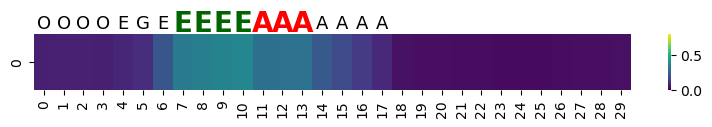

----------------------------------------
Matched no. 809: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.25428219 0.39224743 0.47122961 0.40763752 0.33321061]
Sequence: EEEEEEEEEDDDDDDDDDDDDDDDDDDDDD


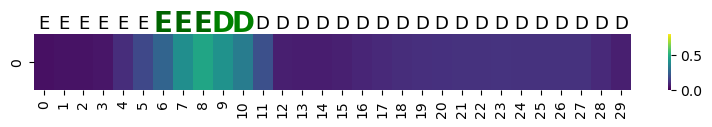

----------------------------------------
Matched no. 817: High attention at columns [7, 8, 9, 10, 11]
Scores: [0.25017981 0.40507747 0.44513433 0.36987197 0.3446957 ]
Sequence: OOOOOOOOOGGGGGGGG


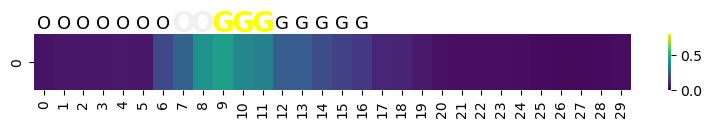

----------------------------------------
Matched no. 830: High attention at columns [3, 4, 5, 6, 7, 8, 9]
Scores: [0.26291088 0.33797705 0.39862175 0.37013543 0.30587979 0.30445789
 0.29737573]
Sequence: OOGGEEEEEEEGGGNNNNNNNNNNNNNNNN


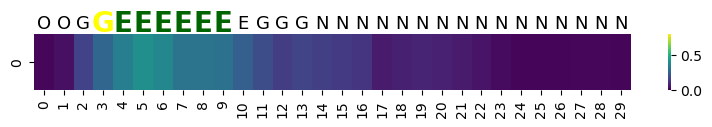

----------------------------------------
Matched no. 831: High attention at columns [8, 9, 10, 11, 12, 13, 14]
Scores: [0.28721279 0.27770661 0.25572437 0.38814203 0.39985276 0.38656653
 0.37453802]
Sequence: EEEAAAAAAAAAAEEEEEEEEEEEEEEEEE


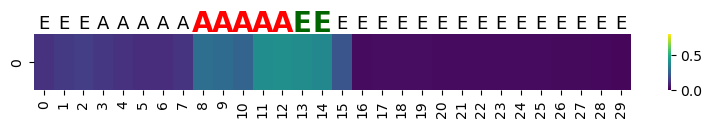

----------------------------------------
Matched no. 838: High attention at columns [5, 6, 7, 8, 9, 10]
Scores: [0.26464689 0.37890953 0.52658703 0.45466747 0.37223933 0.25819448]
Sequence: EEEEEEEGGGEEEEEEEEEEEEEEEEEEEE


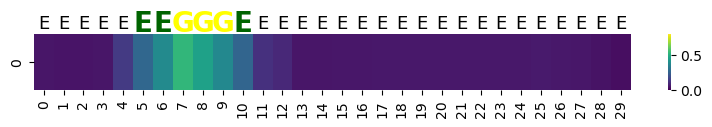

----------------------------------------
Matched no. 842: High attention at columns [14, 15, 16, 17, 18]
Scores: [0.25562857 0.30559731 0.42930881 0.43710435 0.27419714]
Sequence: OOOGGBBBAAAAAABCCFFDDEEEEEEEEE


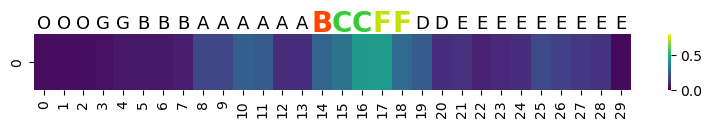

----------------------------------------
Matched no. 846: High attention at columns [6, 7, 8, 9, 10, 11]
Scores: [0.32965295 0.43228479 0.4147341  0.41971056 0.31860039 0.25303709]
Sequence: OOOOOOOOOOAAAAAAAAAAGGGEEEEEGG


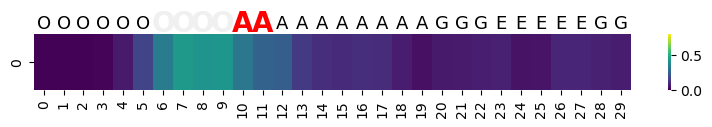

----------------------------------------
Matched no. 853: High attention at columns [24, 25, 26, 27, 28]
Scores: [0.27769019 0.52416008 0.52787706 0.41787184 0.27455846]
Sequence: EEEEEEEEEEDDDDDDDDDDDDDFFFDDDD


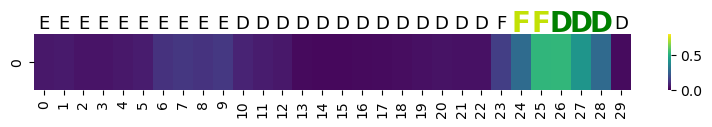

----------------------------------------
Matched no. 858: High attention at columns [23, 24, 25, 26, 27]
Scores: [0.28069698 0.44273542 0.46243941 0.46323086 0.34620577]
Sequence: OOOOOOAAAAAAAAAAAAAABEEEEEDEEE


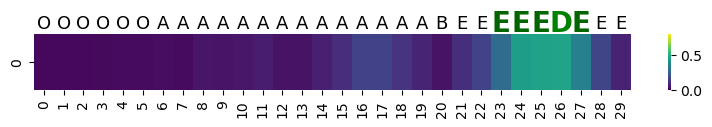

----------------------------------------
Matched no. 874: High attention at columns [24, 25, 26, 27, 28]
Scores: [0.33730491 0.48030725 0.51102999 0.48554456 0.29452746]
Sequence: EEEEEEEEEEEEEEEEEEEEEEEEFDDDEE


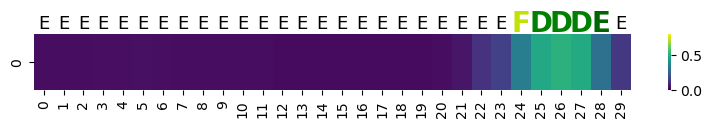

----------------------------------------
Matched no. 882: High attention at columns [1, 2, 3, 4, 5]
Scores: [0.28129604 0.44552325 0.40971181 0.38632116 0.32406083]
Sequence: BGGGEEEEEEEEEEEEEEEEE


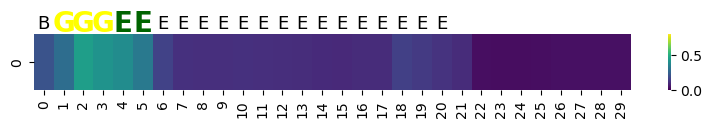

----------------------------------------
Matched no. 890: High attention at columns [9, 10, 11, 12, 13, 14, 15]
Scores: [0.30125167 0.33891878 0.34213741 0.45141559 0.29312075 0.36876515
 0.36218988]
Sequence: EEGGGGBABAAAABGEEEEEEEEEGBBABB


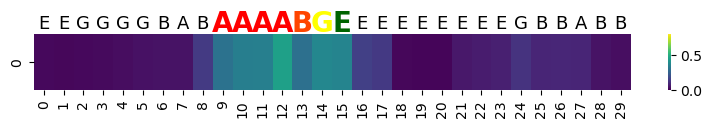

----------------------------------------
Matched no. 891: High attention at columns [0, 18, 19, 20, 21, 22]
Scores: [0.35143842 0.28331746 0.42190998 0.32890258 0.29154021 0.2729029 ]
Sequence: GGGBAAAAAAAAAAABCCCCCFEGBAEEEE


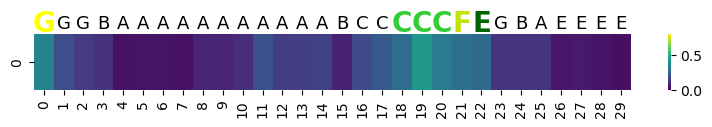

----------------------------------------
Matched no. 892: High attention at columns [12, 13, 14, 15, 16]
Scores: [0.36322772 0.39119153 0.40398085 0.46630965 0.27922729]
Sequence: EEDDDDDDDDDDDFBBAAAA


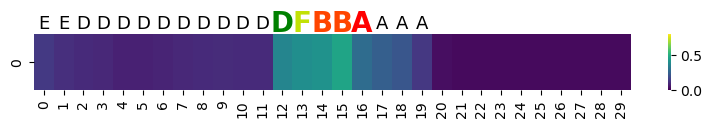

----------------------------------------
Matched no. 894: High attention at columns [10, 11, 15, 16, 17, 18, 19]
Scores: [0.26064959 0.26007892 0.28611097 0.37265419 0.33733647 0.47455148
 0.27552754]
Sequence: FFEEAAAAAAAAAABBFFFDDDDDDDDD


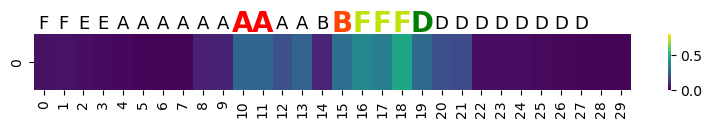

----------------------------------------
Matched no. 896: High attention at columns [17, 18, 19, 20, 21]
Scores: [0.28792086 0.41913238 0.42081332 0.31004683 0.25390903]
Sequence: NNNNNNNMMMMMLNNNNNMMMMNNNNNNNN


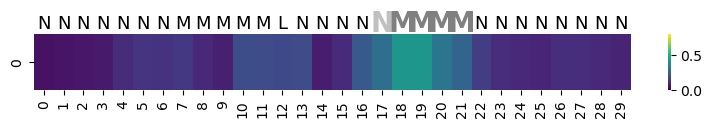

----------------------------------------
Matched no. 900: High attention at columns [15, 16, 17, 18, 19]
Scores: [0.29108236 0.4187984  0.4659236  0.30387566 0.29308263]
Sequence: GGGBBBBBAAAAAAACCCCFFFFFFFFFFF


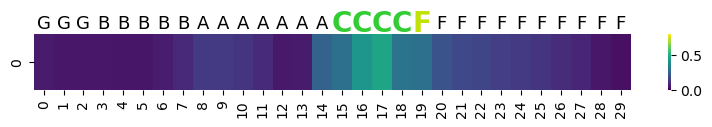

----------------------------------------
Matched no. 904: High attention at columns [6, 7, 8, 9, 10, 12, 13]
Scores: [0.2582069  0.37562304 0.36845669 0.27448172 0.25309644 0.27648893
 0.2682004 ]
Sequence: NNNMMMMLJAAAAAAABBBBBGGGGGGGGG


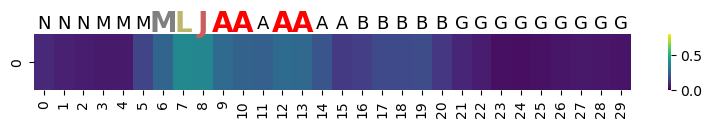

----------------------------------------
Matched no. 912: High attention at columns [17, 18, 19, 20, 21, 22]
Scores: [0.31212934 0.34568573 0.49620642 0.46133043 0.29169997 0.25364361]
Sequence: DDDDEAAAAAAAAAAAEEEEFFFFFFFFDD


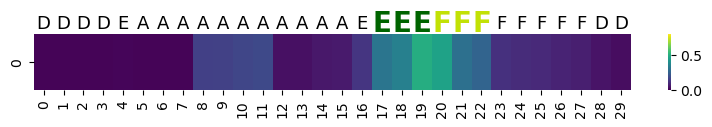

----------------------------------------
Matched no. 915: High attention at columns [16, 17, 18, 19, 20]
Scores: [0.26666086 0.52612224 0.52023848 0.40961245 0.31595968]
Sequence: OOOOOOOOOOOOOOOOOGEEEEEEEEEEEE


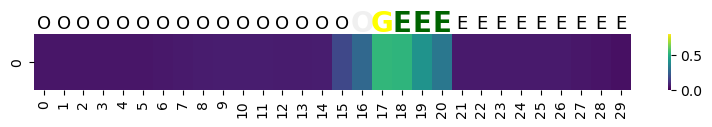

----------------------------------------
Matched no. 921: High attention at columns [10, 11, 12, 13, 14]
Scores: [0.25763782 0.33295153 0.47516519 0.43754513 0.33201777]
Sequence: EEEEBAAAAAAAAOOOOOOOOOOOOOOOOO


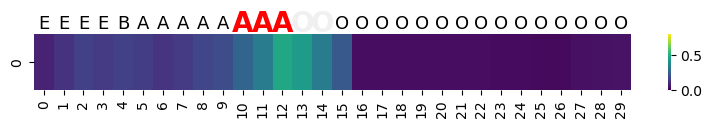

----------------------------------------
Matched no. 925: High attention at columns [19, 20, 21, 22, 23, 24, 25, 26, 27]
Scores: [0.26027599 0.28037115 0.34410525 0.41403132 0.27064403 0.31933169
 0.37800511 0.31489113 0.25575888]
Sequence: DDDDDDDDDDDDDDDDDDDDDDEEEEEEED


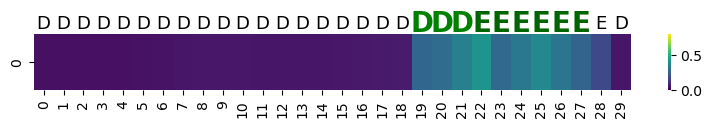

----------------------------------------
Matched no. 926: High attention at columns [18, 19, 20, 21, 22, 23]
Scores: [0.31106105 0.25070062 0.46352605 0.47940686 0.27827459 0.28201183]
Sequence: EEEEEEEAAAAAAAAAAAAEEFFFFDDDDD


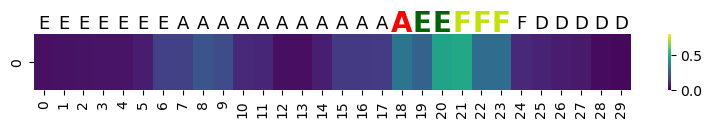

----------------------------------------
Matched no. 933: High attention at columns [15, 16, 17, 18, 19]
Scores: [0.34795484 0.37192534 0.49517245 0.3742349  0.26280215]
Sequence: EEEEGBBAAAJJJJJAABGEEEEEEEEEEE


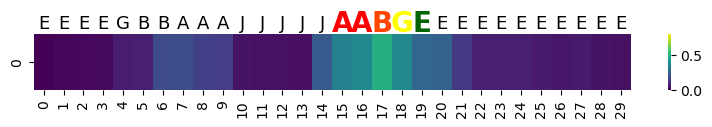

----------------------------------------
Matched no. 946: High attention at columns [21, 22, 23, 24, 25]
Scores: [0.29918376 0.38241016 0.42957786 0.48541552 0.3359051 ]
Sequence: EEEEEBAAAAAAAAAAAAABBCCCFFCCDD


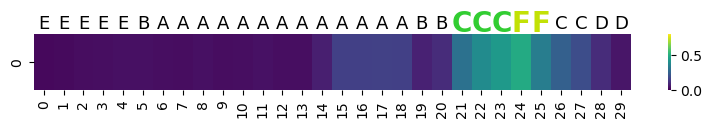

----------------------------------------
Matched no. 948: High attention at columns [19, 20, 21, 22, 23]
Scores: [0.25052291 0.42844318 0.51361494 0.40860819 0.36823856]
Sequence: MMMMMMMJJJJJJJJJJJJJJNNNNNNNNN


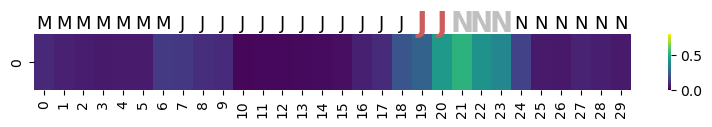

----------------------------------------
Matched no. 956: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.27719091 0.48161767 0.42407424 0.35795663 0.28580288]
Sequence: EEEEEEEEEE


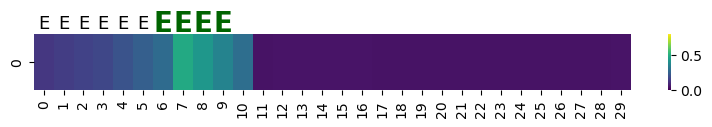

----------------------------------------
Matched no. 957: High attention at columns [0, 1, 2, 3, 4, 5, 6, 7]
Scores: [0.36667224 0.33269222 0.30611876 0.31870282 0.30758033 0.42517793
 0.36827119 0.28556876]
Sequence: OOOOOOEEEEEEEEEEEEEEEEEEEEEEEE


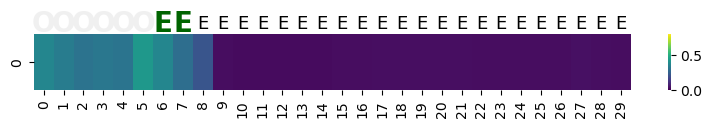

----------------------------------------
Matched no. 959: High attention at columns [15, 16, 17, 18, 19]
Scores: [0.3347094  0.41631855 0.51396929 0.38746065 0.25523888]
Sequence: NNNNNBBAAAJJAABCFFDDD


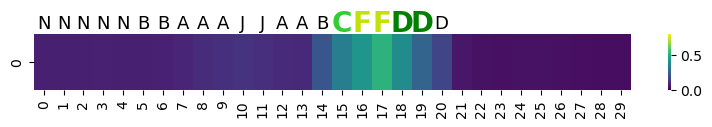

----------------------------------------
Matched no. 962: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.27719091 0.48161767 0.42407424 0.35795663 0.28580288]
Sequence: EEEEEEEEEE


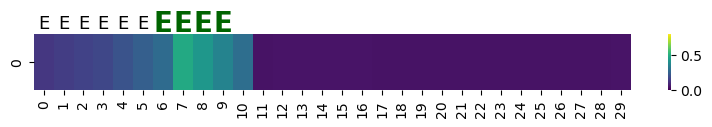

----------------------------------------
Matched no. 967: High attention at columns [7, 8, 9, 10, 11, 16, 17, 18, 19]
Scores: [0.25836966 0.26782588 0.25809183 0.25213047 0.25269345 0.29794489
 0.32448304 0.32798639 0.29879845]
Sequence: OOOOOOOOOOOOOOOAAAAAAAAAABEEEE


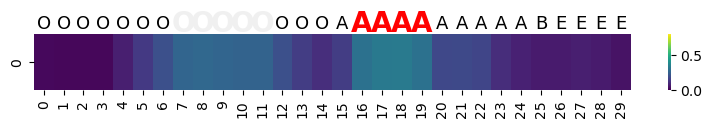

----------------------------------------
Matched no. 969: High attention at columns [0, 1, 2, 3, 4, 5]
Scores: [0.26275773 0.34492619 0.42982724 0.36822163 0.4322742  0.34516681]
Sequence: EEEEEGOOOOOO


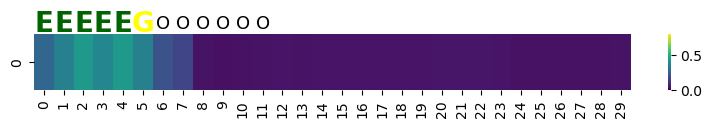

----------------------------------------
Matched no. 970: High attention at columns [19, 20, 21, 22, 23]
Scores: [0.36774293 0.45081035 0.46840573 0.43822984 0.26097905]
Sequence: GGEAAAAAAAAAAAAAABGGFFFFFFFDDD


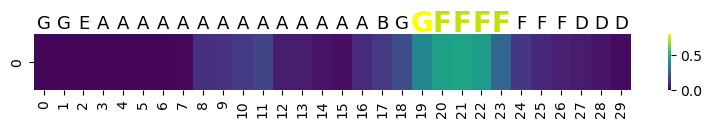

----------------------------------------
Matched no. 974: High attention at columns [22, 23, 24, 25, 26]
Scores: [0.25154373 0.31522619 0.49153563 0.47249376 0.35717233]
Sequence: AAAAAAAAAAAAAAAAAAAABBBCCAAABB


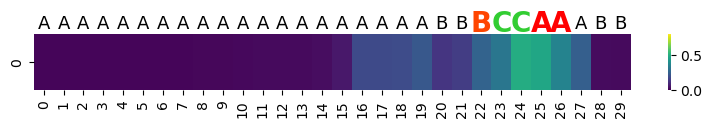

----------------------------------------
Matched no. 985: High attention at columns [12, 13, 14, 15, 16, 17]
Scores: [0.30456656 0.28015156 0.51088086 0.43310262 0.30923884 0.2958413 ]
Sequence: OOOOAAAAAAAAAAAOOOOOOOOOOOOOOO


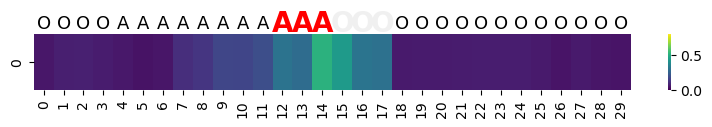

----------------------------------------
Matched no. 992: High attention at columns [16, 17, 18, 19, 20, 25]
Scores: [0.29152041 0.3545978  0.35315432 0.32786322 0.25702438 0.26014896]
Sequence: EEEEDDDDDDDDDFFFFFFFFFFFFFFFFF


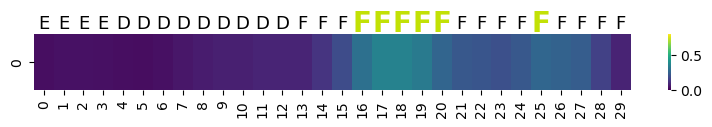

----------------------------------------


In [119]:

threshold = 0.25
indices = np.argwhere(atten_mat > threshold)

# Group by row
high_score_rows = defaultdict(list)
for row, col in indices:
    high_score_rows[row].append(col)

# Function to detect contiguous sequences of 5+
def has_long_consecutive(col_list, min_len=5):
    col_list = sorted(col_list)
    count = 1
    for i in range(1, len(col_list)):
        if col_list[i] == col_list[i-1] + 1:
            count += 1
            if count >= min_len:
                return True
        else:
            count = 1
    return False

# Display rows with long consecutive high scores
for row in sorted(high_score_rows.keys()):
    cols = sorted(high_score_rows[row])
    
    if has_long_consecutive(cols, min_len=5):
        print(f"Matched no. {row}: High attention at columns {cols}")
        print("Scores:", atten_mat[row, cols])
        seq = test_dev["ori_seq"].iloc[row]
        print("Sequence:", seq)
        
        fig = plt.figure(figsize=(8, 1.5))
        ax = sns.heatmap(data=atten_mat[row:row+1, :30], cmap="viridis", cbar=True, vmin=0, vmax=0.8)

        # Annotate letters above the heatmap
        for j, letter in enumerate(seq[:30]):
            score = atten_mat[row, j]
            if score > threshold:
                ax.text(j + 0.5, -0.2, letter, ha='center', va='center',
                        color=state_col_dict[letter], weight='bold', fontsize=20)
            else:
                ax.text(j + 0.5, -0.2, letter, ha='center', va='center', fontsize=13)

        plt.tight_layout()
        plt.show()
        print("-" * 40)


In [123]:
# Define the function as requested
def prom_motif_vis_on_mat(dev_path, atten_path, threshold=0.33):
    # Load input data
    dev_mat = dev_conv(dev_path)
    atten_mat = np.load(atten_path)

    # Identify positions with high attention
    indices = np.argwhere(atten_mat > threshold)

    # Group column indices by row
    high_score_rows = defaultdict(list)
    for row, col in indices:
        high_score_rows[row].append(col)

    # Helper function to detect contiguous high-scoring positions
    def has_long_consecutive(col_list, min_len=5):
        col_list = sorted(col_list)
        count = 1
        for i in range(1, len(col_list)):
            if col_list[i] == col_list[i-1] + 1:
                count += 1
                if count >= min_len:
                    return True
            else:
                count = 1
        return False

    # Display selected rows
    for row in sorted(high_score_rows.keys()):
        cols = sorted(high_score_rows[row])
        if has_long_consecutive(cols, min_len=5):
            print(f"Matched no. {row}: High attention at columns {cols}")
            print("Scores:", atten_mat[row, cols])
            seq = dev_mat["ori_seq"].iloc[row]
            print("Sequence:", seq)

            fig = plt.figure(figsize=(8, 1.5))
            ax = sns.heatmap(data=atten_mat[row:row+1, :30], cmap="viridis", cbar=True, vmin=0, vmax=0.8)

            # Annotate letters above the heatmap
            for j, letter in enumerate(seq[:30]):
                score = atten_mat[row, j]
                if score > threshold:
                    ax.text(j + 0.5, -0.2, letter, ha='center', va='center',
                            color=state_col_dict[letter], weight='bold', fontsize=20)
                else:
                    ax.text(j + 0.5, -0.2, letter, ha='center', va='center', fontsize=13)

            plt.tight_layout()
            plt.show()
            print("-" * 40)


Matched no. 3: High attention at columns [13, 14, 15, 16, 17]
Scores: [0.30298827 0.43610343 0.48293626 0.53013144 0.32833103]
Sequence: AAAAAAAAAAAAAABCC


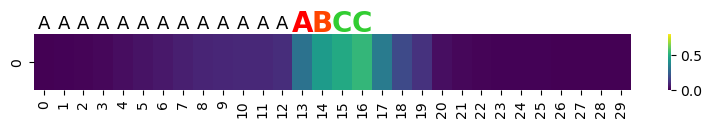

----------------------------------------
Matched no. 17: High attention at columns [0, 2, 3, 4, 5, 6]
Scores: [0.32821029 0.30445178 0.38000149 0.34175882 0.32581807 0.37368291]
Sequence: EEEEEEEDDDDDDDDDDDDDDDDDDDDDDD


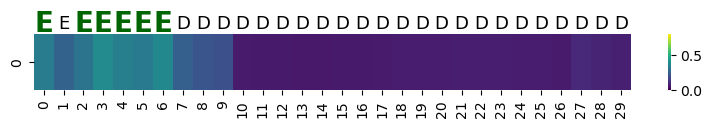

----------------------------------------
Matched no. 44: High attention at columns [14, 15, 16, 17, 18]
Scores: [0.30480888 0.33305839 0.37080205 0.38920425 0.34578284]
Sequence: OOOOOOOOAAAAAAAAABGEEEEE


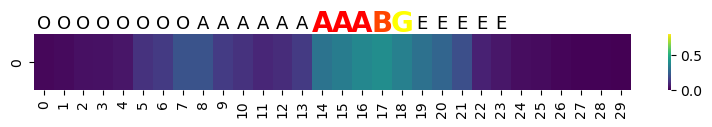

----------------------------------------
Matched no. 50: High attention at columns [5, 6, 7, 8, 9]
Scores: [0.32243263 0.41309941 0.55210582 0.42737877 0.31027374]
Sequence: AAAAACCFDDDDDDDDDDDDDDDDDDDDDD


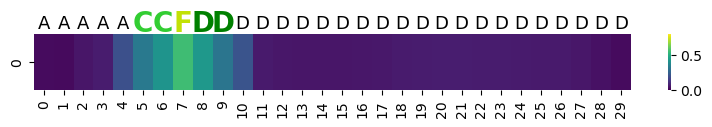

----------------------------------------
Matched no. 93: High attention at columns [0, 1, 2, 3, 4]
Scores: [0.50083926 0.36026488 0.44362788 0.45501146 0.33278793]
Sequence: GGGGOOOOOOOOOOOOOOOOOOOOOOOOOO


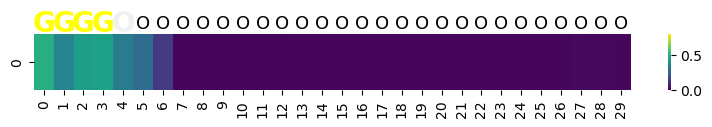

----------------------------------------
Matched no. 126: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.32914319 0.5273992  0.47870982 0.43075966 0.32022987]
Sequence: EEEEEEEAAAABOOOOOOOOOOOOOOOOOO


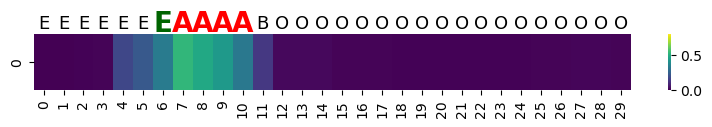

----------------------------------------
Matched no. 137: High attention at columns [9, 10, 11, 12, 13]
Scores: [0.34126931 0.44937861 0.45084494 0.40636814 0.34220765]
Sequence: OOOOOOOOOIIIIOOOOOOOOOOOOOOOOO


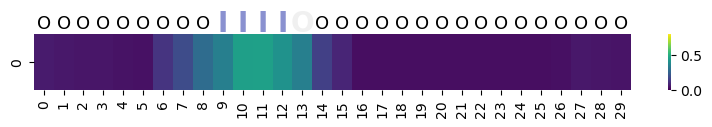

----------------------------------------
Matched no. 161: High attention at columns [3, 4, 5, 6, 7]
Scores: [0.34476375 0.37846855 0.44567696 0.46356003 0.31474029]
Sequence: NNNNGNEEAAAAAAAA


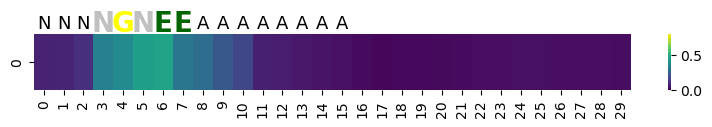

----------------------------------------
Matched no. 164: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.32634179 0.33809734 0.37906103 0.36817218 0.30698074]
Sequence: EGGGBBBBBAABBAAAABA


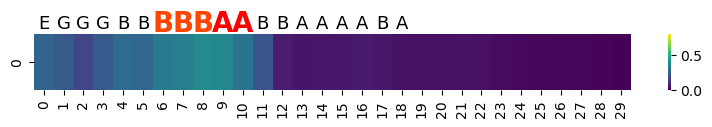

----------------------------------------
Matched no. 179: High attention at columns [22, 23, 24, 25, 26]
Scores: [0.30598339 0.41460629 0.48878596 0.48224181 0.32196389]
Sequence: EEEEEEEGGGGEEEEEEEEEEEEEEAJJJA


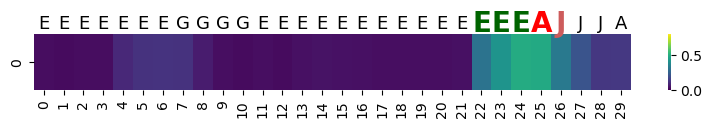

----------------------------------------
Matched no. 188: High attention at columns [0, 2, 3, 4, 5, 6]
Scores: [0.32821029 0.30445178 0.38000149 0.34175882 0.32581807 0.37368291]
Sequence: EEEEEEEDDDDDDDDDDDDDDDDDDDDDDD


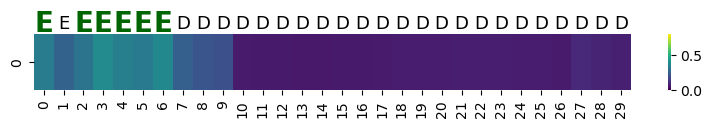

----------------------------------------
Matched no. 199: High attention at columns [0, 1, 2, 3, 4, 5]
Scores: [0.42373741 0.34510363 0.41390223 0.36321842 0.36601695 0.30613249]
Sequence: KLLMMNNNNNNNNNNNN


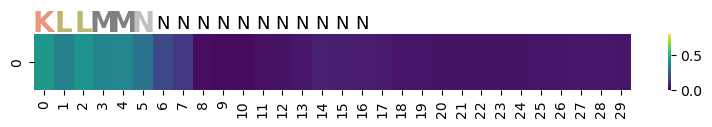

----------------------------------------
Matched no. 200: High attention at columns [0, 2, 3, 4, 5, 6]
Scores: [0.32821029 0.30445178 0.38000149 0.34175882 0.32581807 0.37368291]
Sequence: EEEEEEEDDDDDDDDDDDDDDDDDDDDDDD


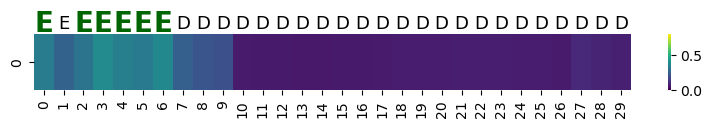

----------------------------------------
Matched no. 250: High attention at columns [17, 18, 19, 20, 21, 22]
Scores: [0.34071471 0.343145   0.41294085 0.45306163 0.3126126  0.309539  ]
Sequence: CCCCAAAAAAAABBGGGGFFDDDDEEEEEE


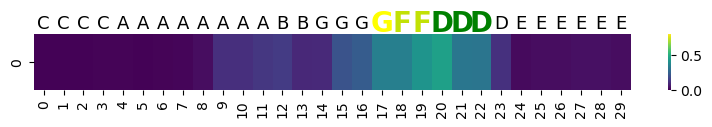

----------------------------------------
Matched no. 257: High attention at columns [0, 2, 3, 4, 5, 6]
Scores: [0.32821029 0.30445178 0.38000149 0.34175882 0.32581807 0.37368291]
Sequence: EEEEEEEDDDDDDDDDDDDDDDDDDDDDDD


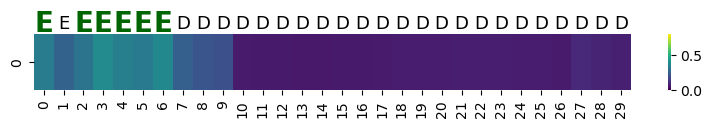

----------------------------------------
Matched no. 267: High attention at columns [17, 18, 19, 20, 21, 22]
Scores: [0.3033171  0.30869619 0.53208755 0.52128919 0.31960365 0.30316293]
Sequence: OOOOOOOAAAAAAAAAAEEEFFDDDDDDDD


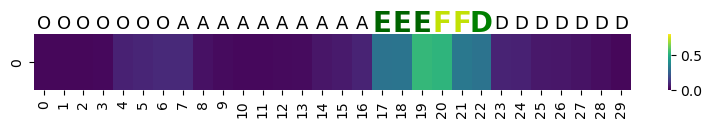

----------------------------------------
Matched no. 269: High attention at columns [22, 23, 24, 25, 26]
Scores: [0.31883757 0.32777626 0.32990937 0.44396935 0.30895932]
Sequence: DDDDDDDDDDDDDDDDDDDDDDEEEEAAAA


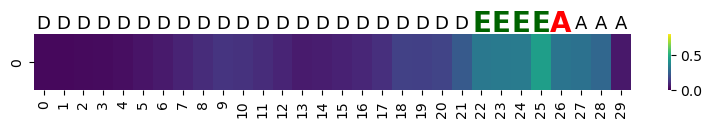

----------------------------------------
Matched no. 411: High attention at columns [8, 9, 10, 11, 12]
Scores: [0.31692365 0.48741478 0.47296068 0.45188821 0.33386937]
Sequence: OOOOOOOOOIIIOOOOOOOOOOOOOOOOOO


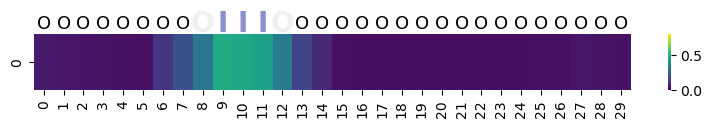

----------------------------------------
Matched no. 426: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.32435663 0.33553499 0.32451383 0.3629302  0.30439856]
Sequence: MMMMMMNNNMMNNNNNNNNNNNNNNNNNNN


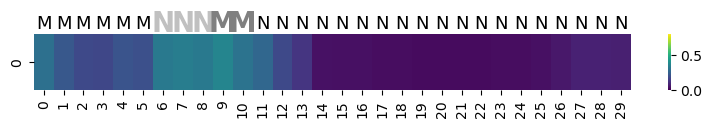

----------------------------------------
Matched no. 483: High attention at columns [2, 3, 4, 5, 6]
Scores: [0.3446431  0.44955776 0.47194777 0.46204395 0.32027342]
Sequence: JJJJJMMMLNN


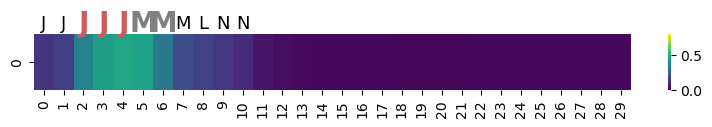

----------------------------------------
Matched no. 493: High attention at columns [14, 15, 16, 17, 18]
Scores: [0.32380014 0.36425828 0.4476717  0.36829657 0.30606335]
Sequence: FCCAAAAAAAAAAAAABEEEEEEEEEEEEE


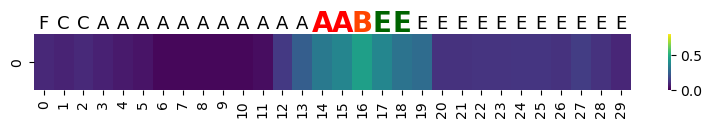

----------------------------------------
Matched no. 530: High attention at columns [17, 18, 19, 20, 21]
Scores: [0.30288979 0.41452249 0.43090428 0.37752398 0.37767177]
Sequence: BBBBBBAAAAAAAAABBBFFFFFFEEEEEE


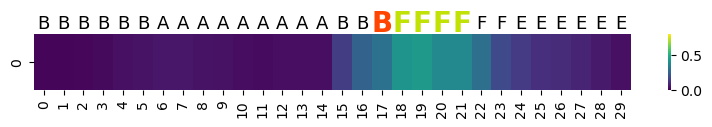

----------------------------------------
Matched no. 562: High attention at columns [0, 1, 2, 3, 4, 5]
Scores: [0.48497252 0.38544076 0.39589443 0.35791777 0.36034391 0.32297065]
Sequence: GGGGGGOOOOOOOOOOO


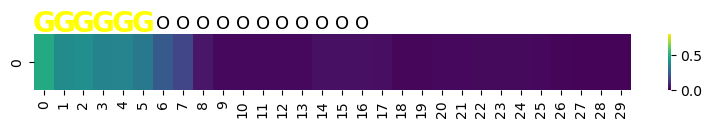

----------------------------------------
Matched no. 581: High attention at columns [4, 5, 6, 7, 8]
Scores: [0.35368417 0.3955381  0.50269937 0.42170646 0.32380913]
Sequence: AAAAAAABBOOOOOOOOOOOOOOOOOOOOO


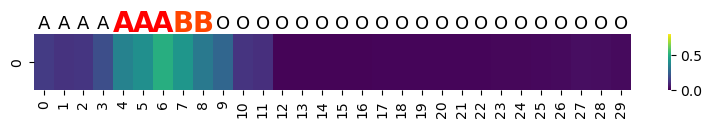

----------------------------------------
Matched no. 606: High attention at columns [18, 19, 20, 21, 22]
Scores: [0.32762191 0.43778526 0.40527898 0.32315891 0.30631143]
Sequence: BBAAAABBBBABAAABBBBFFFFFDDD


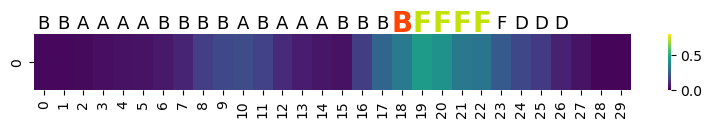

----------------------------------------
Matched no. 691: High attention at columns [15, 16, 17, 18, 19]
Scores: [0.34936995 0.45036443 0.41036298 0.39646454 0.31288163]
Sequence: DDDDDDDDDDDDDDEEEEEEEDDDDDDDDD


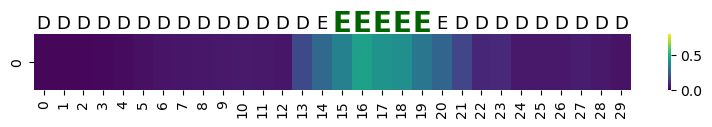

----------------------------------------
Matched no. 699: High attention at columns [5, 6, 7, 8, 9]
Scores: [0.30714745 0.50469674 0.49674102 0.42861254 0.31074053]
Sequence: OOOOOOGBAAAABBBGGGEEEEEEEEEEEE


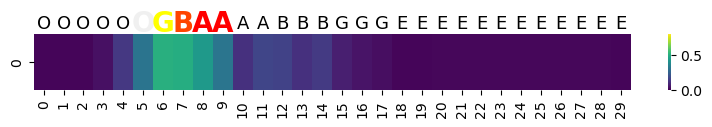

----------------------------------------
Matched no. 710: High attention at columns [5, 6, 7, 8, 9]
Scores: [0.32966231 0.38867184 0.4458876  0.43133776 0.30630415]
Sequence: NNNNNNNBAAAAAAAACCCCCCCCCCCFFF


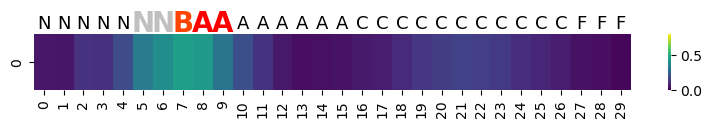

----------------------------------------
Matched no. 747: High attention at columns [5, 6, 7, 8, 9]
Scores: [0.32955387 0.33196891 0.32629329 0.33468108 0.34735769]
Sequence: EEEEEEEEEEEEEOOOOOOOOOOOOOOOOO


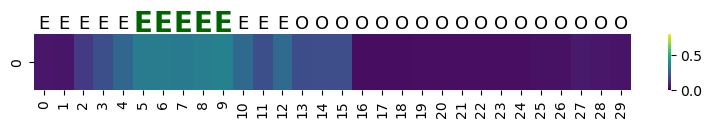

----------------------------------------
Matched no. 765: High attention at columns [18, 19, 20, 21, 22]
Scores: [0.31549276 0.37588006 0.40093987 0.55844579 0.32914698]
Sequence: BBBBBAAAAAAAAAABBBBGEFFFFCCCCC


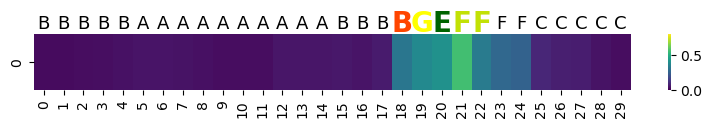

----------------------------------------
Matched no. 778: High attention at columns [17, 18, 19, 20, 21]
Scores: [0.32549496 0.51503907 0.48528864 0.33918432 0.3266174 ]
Sequence: OOOOOOAAAAAAAAAEEEEFFDDDDDDDDD


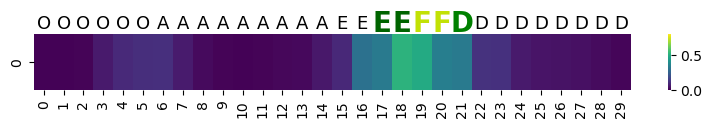

----------------------------------------
Matched no. 834: High attention at columns [0, 2, 3, 4, 5, 6]
Scores: [0.32821029 0.30445178 0.38000149 0.34175882 0.32581807 0.37368291]
Sequence: EEEEEEEDDDDDDDDDDDDDDDDDDDDDDD


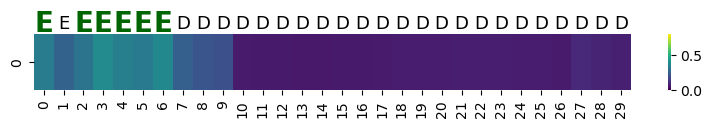

----------------------------------------
Matched no. 849: High attention at columns [12, 13, 14, 15, 16]
Scores: [0.3158582  0.4657349  0.34218562 0.35876606 0.35273046]
Sequence: CBAAAAAAAAAAABBBAEEEEEEEEEEEEE


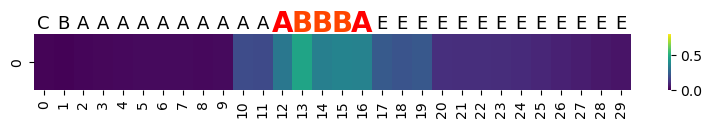

----------------------------------------
Matched no. 857: High attention at columns [0, 1, 2, 3, 4]
Scores: [0.44577324 0.37693856 0.37303983 0.36710231 0.31118705]
Sequence: OONNNNNNNNNNNNNNN


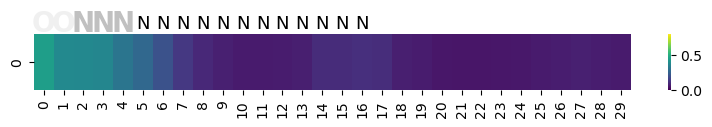

----------------------------------------
Matched no. 858: High attention at columns [1, 2, 3, 4, 5]
Scores: [0.32643708 0.36903353 0.42419141 0.37490241 0.3008016 ]
Sequence: EEEHIIIIIII


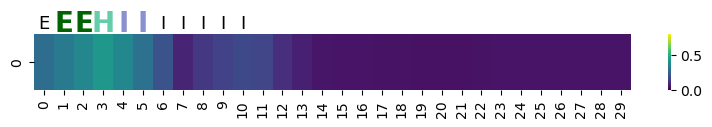

----------------------------------------
Matched no. 898: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.33039126 0.37547269 0.42893775 0.50941777 0.30139545]
Sequence: NNNNLKAABGNNNNNNNNNNNNNNNNN


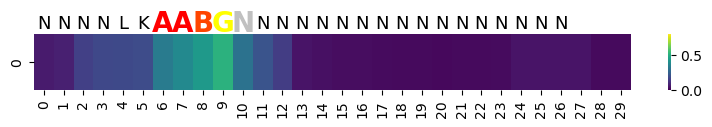

----------------------------------------
Matched no. 935: High attention at columns [11, 12, 13, 14, 15, 16]
Scores: [0.31935722 0.3285283  0.49979095 0.4485367  0.35818925 0.31196072]
Sequence: OOOOOOOOGGGLLGGGG


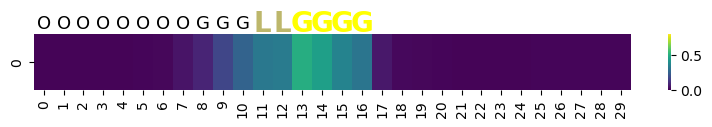

----------------------------------------
Matched no. 936: High attention at columns [6, 7, 8, 9, 10]
Scores: [0.31823159 0.43955225 0.38083381 0.31493768 0.32693163]
Sequence: AAAAAAAAAAAOO


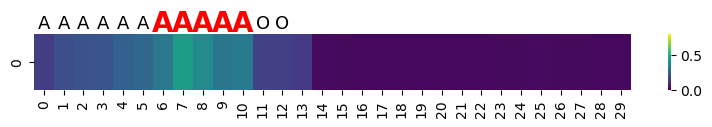

----------------------------------------
Matched no. 988: High attention at columns [2, 3, 4, 5, 6]
Scores: [0.33560908 0.30528173 0.46645077 0.55527561 0.31809766]
Sequence: EEEEEAAAAAAAAAAAAABGEEEEGEEGGG


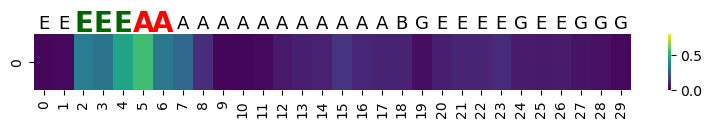

----------------------------------------
Matched no. 995: High attention at columns [21, 22, 23, 24, 25, 26]
Scores: [0.35884581 0.34207263 0.41735942 0.38883241 0.31693539 0.31459021]
Sequence: EEEGGBBBAAAAAACCCCCCCCCFFFFFFD


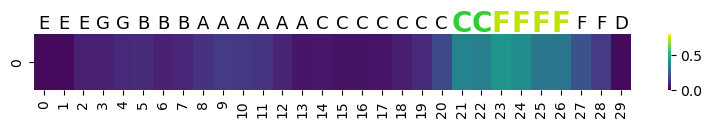

----------------------------------------


In [124]:
# test_file_name="not_n_rpkm30"
dev_path_30="../database/fine_tune/prom/up2kdown4k/gene_exp/4mer/all/not_n_rpkm30/dev.tsv"
atten_path_50 = "../database/ft_result/prom/up2kdown4k/gene_exp/4mer/atten_mat/not_n_rpkm30/atten.npy"
prom_motif_vis_on_mat(dev_path_30, atten_path_50, threshold=0.30)

AAAAB 836 80 AAABBGEEEEEEEEEEEGNNNNNNNNNNNNNNNNNNNNNNNLLLLLLLLMNNNNNNNNNNNNNNNNNBAAAAABGEEEEE 



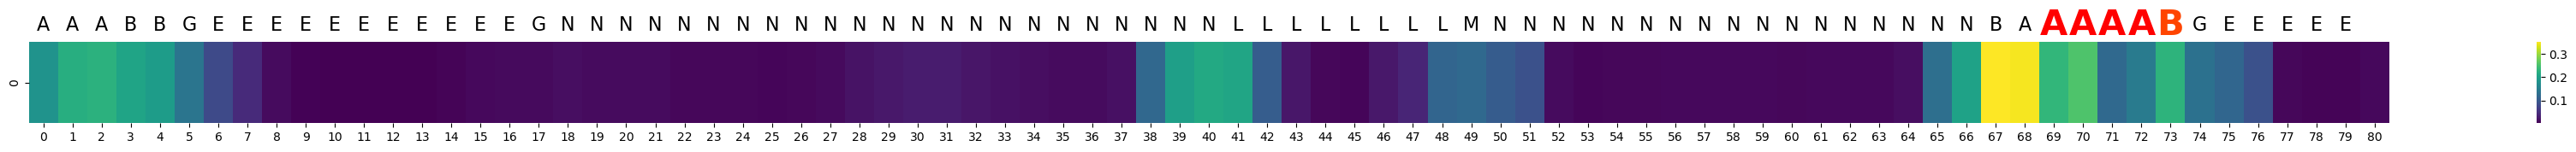

In [ ]:
file_name="compNg"
dev_path="../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv"
atten_path = "../database/ft_result/pred/4_compNg/atten.npy"
motif_str="AAAAB"
# motif_inst="AAAAAAAABBAA"
# motif_inst="AAAAAAAAAEEE"
motif_inst="NBAAAAABGEEE"
# motif_inst="AAAAAAAAEEEE"
# motif_inst="AAAAAAABBBGG"
motif_vis(file_name, dev_path, atten_path, motif_str, motif_inst)

EEDDD 19 81 NNJJKABGEEDDDEEEEEEEEEEEEGGGGGGGGEEEEEEEEEEEEEEEEEEEEEEEGGGGGGGGGGEEEEEEEEEEEEEEE 



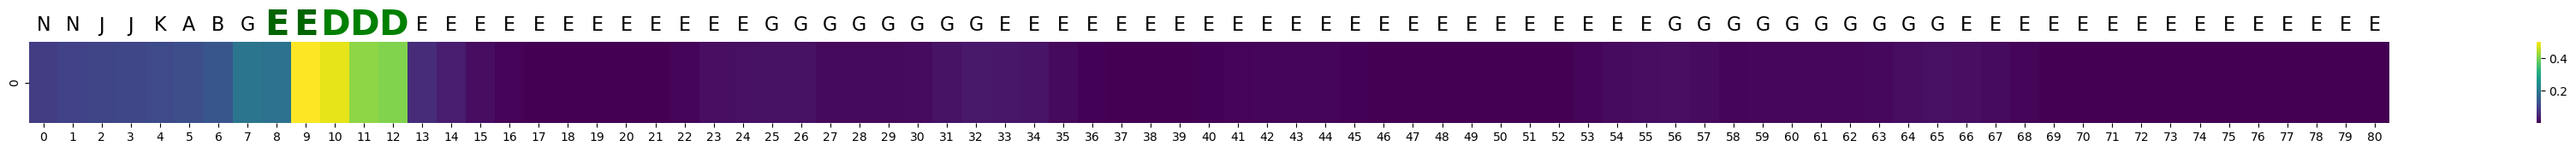

EEDDD 47 81 AAAAAAAAAAAAABBBCFFFEEGEEEEDDDDDDDDDDDDDEEEEEEEEEEEEEEDEEEEEEDDDDDDDDEEDDDEEEEEEE 



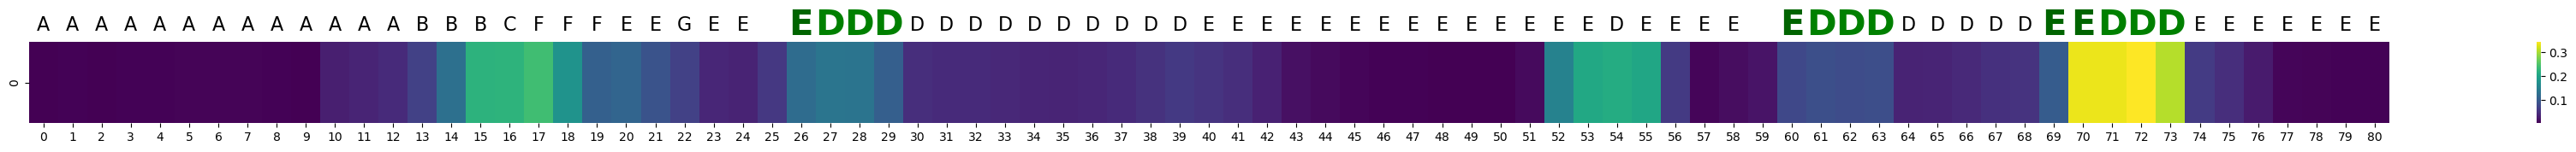

In [ ]:
motif_str="EEDDD"
motif_inst="DDDEEDDDEEEE"
motif_vis(file_name,dev_path, atten_path, motif_str, motif_inst)

EEDDD 319 81 AAAAAAAAAEEEDDDDEEEEEEEGGEEEEDDDDDDEEEEEEEEEEEEEEEDDDDDDDDDDDDDDDEEEEEEEEEEEEEEEE 



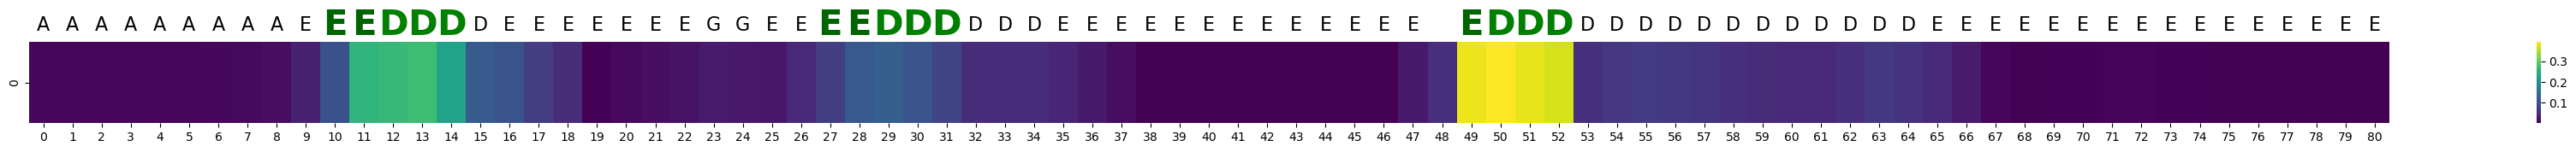

EEDDD 921 81 AAAAAAAAAEEEDDDDEEEEEEEGGEEEEDDDDDDEEEEEEEEEEEEEEEDDDDDDDDDDDDDDDEEEEEEEEEEEEEEEE 



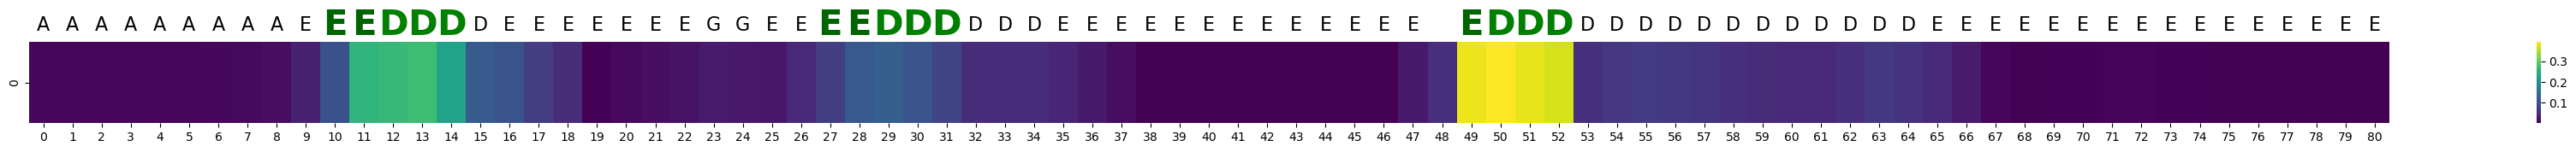

In [ ]:
motif_str="EEDDD"
motif_inst="AAEEEDDDDEEE"
motif_vis(file_name,dev_path, atten_path, motif_str, motif_inst)

In [ ]:
dev_dna=pd.read_csv("../database/dnabert/examples/sample_data/ft/6/dev.tsv", sep="\t")
dev_dna

sequence  label
0    GTGGGG TGGGGA GGGGAG GGGAGG GGAGGG GAGGGA AGGG...      0
1    GTGTGG TGTGGG GTGGGA TGGGAT GGGATC GGATCA GATC...      0
2    CCCTGC CCTGCA CTGCAT TGCATG GCATGC CATGCC ATGC...      0
3    TTGGAG TGGAGC GGAGCA GAGCAA AGCAAG GCAAGG CAAG...      0
4    AGCACA GCACAG CACAGG ACAGGG CAGGGC AGGGCA GGGC...      0
..                                                 ...    ...
995  GGGCTG GGCTGC GCTGCA CTGCAG TGCAGG GCAGGC CAGG...      1
996  CTGACC TGACCC GACCCT ACCCTA CCCTAG CCTAGC CTAG...      0
997  ACTTAC CTTACT TTACTG TACTGT ACTGTA CTGTAC TGTA...      1
998  CTGAGC TGAGCC GAGCCT AGCCTG GCCTGG CCTGGC CTGG...      0
999  CTGCCT TGCCTG GCCTGA CCTGAC CTGACT TGACTT GACT...      1

[1000 rows x 2 columns]

In [ ]:
[kmer2seq(elm) for elm in dev_dna["sequence"]]

['GTGGGGAGGGAGGCCGCCCCACTGCAGGTGGGCCTGTAGCAGCTGCACCTGAGGCAGGGCTGGCAGCCCCTGTGGGGAGGGAGGCCGCCCCACTGCAGGTG',
 'GTGTGGGATCATGTATCAGTGCAGCCTTGACCTCCTGGGCTCAAGCATTCTTCCCACCTCAACCTCTTGAGTAGCTGAAATTACAGGAACATGCCACCACA',
 'CCCTGCATGCCACATAGCAAGGTGCTGGGTCACTGATGCTAACATCTAAACAGGGGCCAGGTGCGGTGGCTCACTCTTGAAATCCCAGCACTTTGGGAGGC',
 'TTGGAGCAAGGCTATGCACCATACATGCTCTGAGTGGGCTTGATTCCTCCAGGGAAGAGGCCAGGAAAGCATTGATGTGAAAACAGCCTTTCCCTTGCCAT',
 'AGCACAGGGCACTGGTGGAGGGAGCCCTGCGGGGCAGTCCTCAAGGCCTCCGGATGGGTGTGAGAGGCACCGGGGCTGAAGCAGCATCTGGGTTTGAGGAA',
 'AGGCCAGCTGGGGTCAAGGCAAGGGGGCTGCCCAGCACAGTGGTTCTGCTCCAGAGGTGCAGTCAGACTGCCTGGGTTGGCTCATGCCTGGGTCTGTCATT',
 'GTGCGAGATGACGCACTTCCTGCCTGAGGCGGCCGCTGTTCTCGCGGCTTCCGGCAGGTGGCGCTGAGACCACGGGAAGCCAGCCTGGCTGTCGGTTAGCC',
 'GTTCTTGGATCACACTCGAGGAAAGCTCCAGCTGGGCCCAGATTTGGGGCTTCTGTCCTGAAAGGCGCTGGCTCCTGGTGTGAATGGGAGGCCCAGGGCTG',
 'GGCCAGGGGACCAGGCTGGGAGAGCTGCCAACCGCACCTGTGAAGGAATGGTCAGGAACCCTCCCACCCTGGGATGCATTCCTGGCTTTTACCAGTTATTC',
 'ATCCCAGCACTTTGGGAGGCCGAGGTGGGTGGATCATCTGAGGT

In [ ]:
[len(kmer2seq(elm)) for elm in dev_dna["sequence"]]

[101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101,
 101

In [ ]:
train_dna=pd.read_csv("../database/dnabert/examples/sample_data/ft/6/train.tsv", sep="\t")
train_dna

sequence  label
0      CACAGC ACAGCC CAGCCA AGCCAG GCCAGC CCAGCC CAGC...      0
1      CTAATC TAATCT AATCTA ATCTAG TCTAGT CTAGTA TAGT...      1
2      GGAAGA GAAGAG AAGAGG AGAGGG GAGGGA AGGGAA GGGA...      1
3      CGAAAG GAAAGC AAAGCA AAGCAA AGCAAT GCAATC CAAT...      1
4      TGACTC GACTCC ACTCCC CTCCCA TCCCAA CCCAAA CCAA...      1
...                                                  ...    ...
32361  AGGCTG GGCTGA GCTGAG CTGAGG TGAGGC GAGGCA AGGC...      0
32362  ACTGGG CTGGGG TGGGGA GGGGAA GGGAAC GGAACG GAAC...      1
32363  ACCCTG CCCTGA CCTGAA CTGAAG TGAAGA GAAGAA AAGA...      1
32364  TTGGCC TGGCCT GGCCTG GCCTGA CCTGAC CTGACC TGAC...      1
32365  GTGATG TGATGG GATGGT ATGGTG TGGTGT GGTGTT GTGT...      0

[32366 rows x 2 columns]

In [ ]:
[kmer2seq(elm) for elm in train_dna["sequence"]]

['CACAGCCAGCCACTAGGCCCTGTCCTGCAGCCCCCTGTAGGGGTCTGGAACAGCCAGGAGTGGTTTAAGAGGCAGGGGAGTCGCCTTGCCCTGTGCCACAC',
 'CTAATCTAGTAATGCCGCGTTGGTGGAAAGACATGACATACCTCAAACAGCAGGGGGCGCCATGCGCCAAGCCCGCAGAGGGTTGTCCAACTCCTATTCCT',
 'GGAAGAGGGAAGGAAATGCCCCGGGTCCCAGGCGGGGCCTCGAGCGTGCCCACGCCGCCCCCTGCTGGCCACGCCTGGAGTTGCAGGAACCGGGCGCCGGG',
 'CGAAAGCAATCAGTGGCCTGGACCATGTGTAGTATAGAGAGCAACAGCGCCATCTATGCTTAATTTGGCAACATTACATGTAGTCCCGGAAAATCTTTTAA',
 'TGACTCCCAAACCAACAAAAGGGGAGGGAGTTCATCACCACTAGACTTTCCTTATAAAAAACACTAGAGGGAGTGCTTAAGCAGAAAGAAAAAAATACTAA',
 'AAGCATGAAATGAAAGACTGGGCTAGGCACAGTGGCTCACACCTGTAATCCCAGCACTTTGGGAGGCCAAGACAGGCAGATGACCTGAGGTCAGGAGTTTG',
 'GGCTTTGTTTTCTGTGAGTTACGGGGCTGCCACCTGCAGGTAAAATCTGGACATTGCCCTGAAATTGACCGAACCTTGGATACAAACCCGGCCTGACAGTG',
 'TCACCGTTACTGCCTCCTAGTGGCGGATACGGCGGCAATAGTGGCGCACATTCAAGGCAGGAAGCAAGAGGAACAGAGCCACCAGCAGGTTTGGCCCAGTG',
 'AGAAAACAAAAGCTCCGGAGTAGGAAAGTGACACAGCGCCACCTCCCGGTAGCCTGGCCGGCCAAGGCCTCTGGCTTAAGCGGGCCTCTGGCCTGCCAAAA',
 'AAGTAGAGGCCTCCTGCTTCAGGGAAGTAGAGCCGGTGTCTCGC

In [ ]:
dev_compless=pd.read_csv("../database/fine_tune/CompG_and_lessCompG/4mer/dev.tsv", sep="\t")
dev_compless

sequence  label
0    DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD D...      1
1    OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO O...      0
2    AAAA AAAA AAAA AAAA AAAA AAAA AAAE AAEE AEEE E...      1
3    EEED EEDD EDDD DDDD DDDD DDDD DDDD DDDD DDDD D...      1
4    OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO O...      0
..                                                 ...    ...
995  AAAA AAAA AAAA AAAA AAAE AAEE AEEE EEEE EEEE E...      1
996  GGGG GGGG GGGG GGGG GGGG GGGG GGGG GGGG GGGG G...      1
997  JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ J...      0
998                                     AAAA AAAA AAAA      1
999  OIII IIII IIII IIII IIII IIII IIII IIII IIII I...      0

[1000 rows x 2 columns]

In [ ]:
dev_compless_ori=dev_compless

In [ ]:
seq_ori=[kmer2seq(elm) for elm in dev_compless_ori["sequence"]]

In [ ]:
dev_compless_ori["sequence"]=seq_ori

In [ ]:
dev_compless_ori

sequence  label
0                                   DDDDDDDDDDDDDDDFBB      1
1    OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...      0
2                                    AAAAAAAAAEEEEEEEG      1
3        EEEDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDEEEEEEEEEGBB      1
4    OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...      0
..                                                 ...    ...
995                     AAAAAAAEEEEEEEEEEEEEDDDEEEEEEE      1
996  GGGGGGGGGGGGEEEEEEEEEGGGGOONNNNNIIIIIOOOOOOOOO...      1
997         JJJJJJJJJJJJJJMMMNNNNNNNNNNGGEEEEEEEEEGGGG      0
998                                             AAAAAA      1
999  OIIIIIIIIIIIOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO...      0

[1000 rows x 2 columns]

In [ ]:
[kmer2seq(elm) for elm in dev_compless["sequence"]]

['DDDDDDDDDDDDDDDFBB',
 'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOIIIIIIIOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOIIIIIIIIIIIIIIIOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO',
 'AAAAAAAAAEEEEEEEG',
 'EEEDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDEEEEEEEEEGBB',
 'OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOGGOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOIIIIIIIIIIIIIIIIOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOIIIIIIOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

(array([401., 135.,  80.,  41.,  41.,  39.,  35.,  14.,  19., 195.]),
 array([  4. ,  54.6, 105.2, 155.8, 206.4, 257. , 307.6, 358.2, 408.8,
        459.4, 510. ]),
 <BarContainer object of 10 artists>)

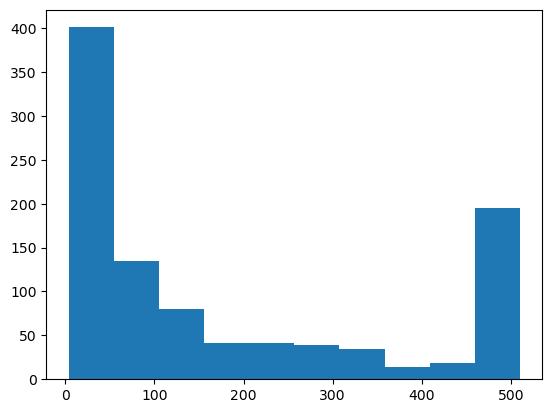

In [ ]:
plt.hist([len(kmer2seq(elm)) for elm in dev_compless["sequence"]])

In [ ]:
atten_compless= np.load("../database/ft_result/pred/4_compless/atten.npy")

In [ ]:
atten_compNg= np.load("../database/ft_result/pred/4_compNg/atten.npy")

In [ ]:
atten_gng= np.load("../database/ft_result/pred/4_GnG/atten.npy")

In [ ]:
max([len(kmer2seq(elm)) for elm in dev_compless["sequence"]])

510

<Axes: >

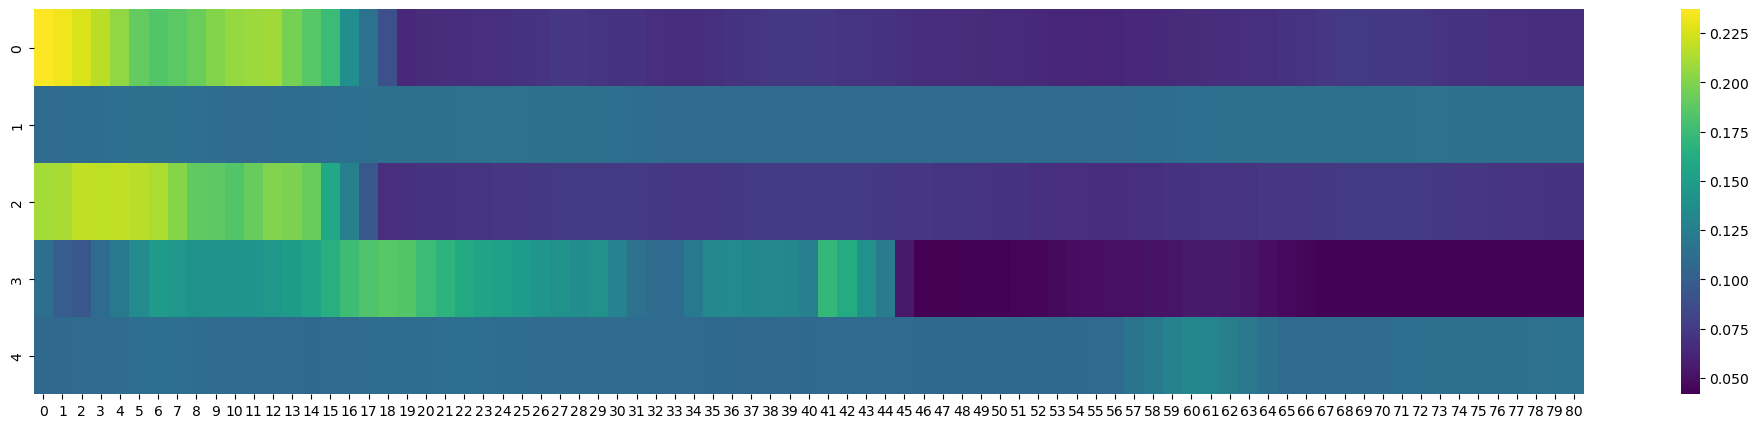

In [ ]:
figure=plt.figure(figsize=(25,5))
sns.heatmap(data=atten_compless[:5], cmap="viridis")

In [ ]:
atten_gng.shape

(1000, 81)

In [ ]:
atten_compless.shape

(1000, 81)

In [ ]:
atten_compNg.shape

(1000, 81)

<Axes: >

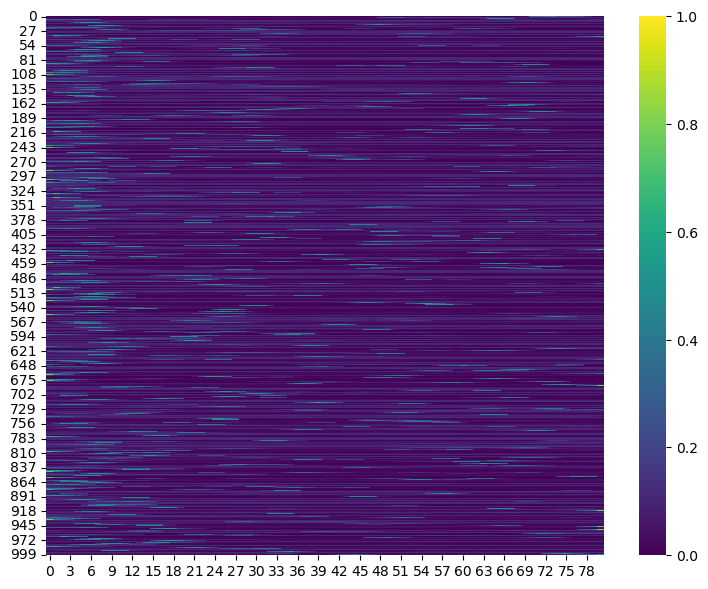

In [ ]:
figure=plt.figure(figsize=(9,7))
sns.heatmap(data=atten_gng, cmap="viridis", vmin=0, vmax=1)

<AxesSubplot:>

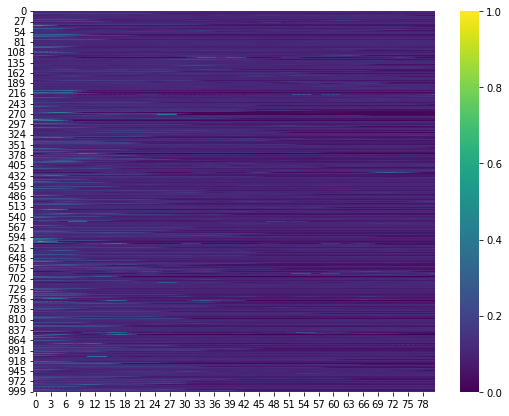

In [ ]:
figure=plt.figure(figsize=(9,7))
sns.heatmap(data=atten_compless, cmap="viridis", vmin=0, vmax=1)

<AxesSubplot:>

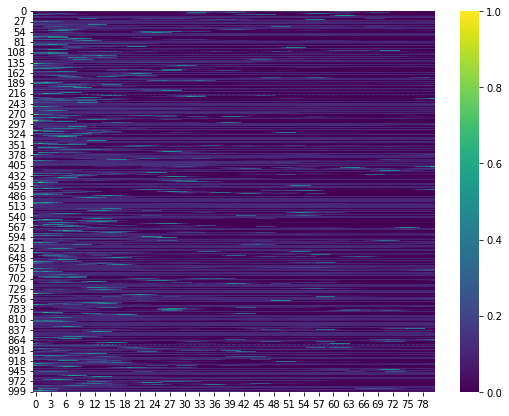

In [ ]:
figure=plt.figure(figsize=(9,7))
sns.heatmap(data=atten_compNg, cmap="viridis", vmin=0, vmax=1)

In [ ]:
path_gene_exp="../database/ft_result/pred/4_gene_exp/test02_double_data/"
file_lst=sorted(os.listdir(path_gene_exp))
suff="/atten.npy"
file_gene_all=sorted([path_gene_exp+file+suff for file in file_lst])
atten_gene_all=[np.load(file) for file in file_gene_all]       
len(atten_gene_all)

8

In [ ]:
path_gene_exp="../database/ft_result/pred/4_gene_exp/test02_double_data/"
file_lst=sorted(os.listdir(path_gene_exp))
suff="/atten.npy"
file_gene_all=sorted([path_gene_exp+file+suff for file in file_lst])
atten_gene_all=[np.load(file) for file in file_gene_all]       
len(atten_gene_all)

8

In [ ]:
file_gene_all[7]

'../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm50_or_not/atten.npy'

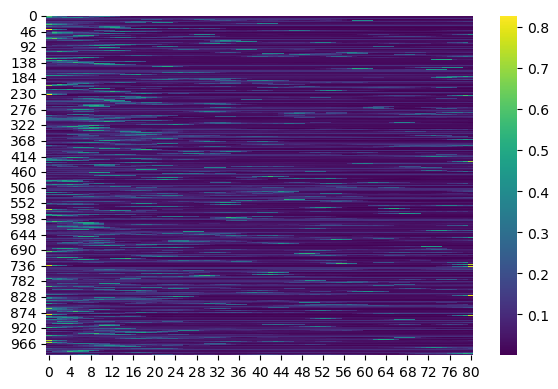

In [ ]:
figure=plt.figure(figsize=(6,4))
ax=sns.heatmap(data=atten_gene_all[7], cmap="viridis")
plt.tight_layout()
plt.savefig("../database/figs/attend_mat_rpkm50_or_not.pdf",format="pdf")
plt.show()

In [ ]:
atten_gene_all[7][:30]

array([[0.0267284 , 0.02686083, 0.02683633, ..., 0.02633312, 0.02640847,
        0.02608398],
       [0.58863622, 0.3257436 , 0.23721844, ..., 0.0186255 , 0.01844484,
        0.01854869],
       [0.02783883, 0.02786401, 0.02801443, ..., 0.04259034, 0.02601558,
        0.02506689],
       ...,
       [0.04640501, 0.03962811, 0.04859686, ..., 0.02600127, 0.02697012,
        0.02722921],
       [0.11265187, 0.11224612, 0.11118385, ..., 0.10681081, 0.10538199,
        0.10266027],
       [0.41761818, 0.52732945, 0.42118276, ..., 0.04528824, 0.04519762,
        0.0456082 ]])

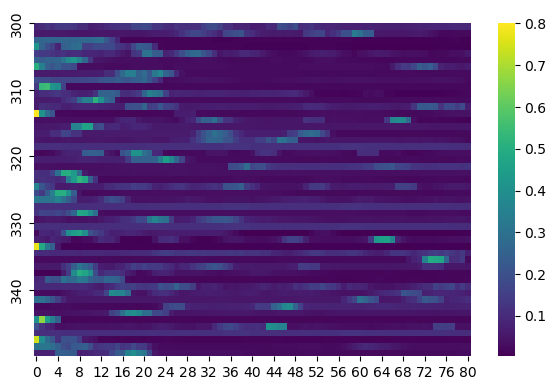

In [ ]:

############ THIS IS FOR GENIC REGIONS
start_pos = 300
end_pos = 350

# start_pos = 280
# end_pos = 340

figure = plt.figure(figsize=(6, 4))
data_slice = atten_gene_all[7][start_pos:end_pos]
ax = sns.heatmap(data=data_slice, cmap="viridis")

# Set yticks at regular intervals
step = 10
yticks = np.arange(0, data_slice.shape[0], step)
yticklabels = [start_pos + i for i in yticks]
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels)

plt.tight_layout()
plt.savefig("../database/figs/genic_regions_attend_mat_rpkm50_or_not03.pdf", format="pdf")
plt.show()

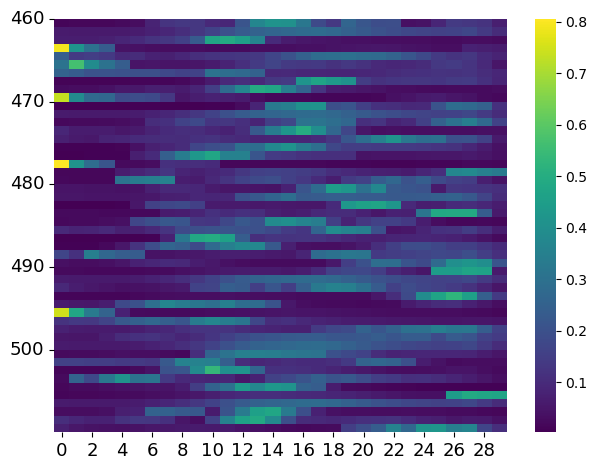

In [ ]:

############ THIS IS FOR PROMOTER

prom_50_not_path="../database/ft_result/prom/up2kdown4k/gene_exp/4mer/atten_mat/rpkm0_n_rpkm50/atten.npy"
prom_50_not_atten=np.load(prom_50_not_path)


start_pos = 460
end_pos = 510

data_slice_prom_50_not = prom_50_not_atten[start_pos:end_pos, 0:30]
ax50_not = sns.heatmap(data=data_slice_prom_50_not, cmap="viridis")

# Set yticks at regular intervals
step = 10
yticks = np.arange(0, data_slice_prom_50_not.shape[0], step)
yticklabels = [start_pos + i for i in yticks]
ax50_not.set_yticks(yticks)
ax50_not.set_yticklabels(yticklabels)
ax50_not.tick_params(axis='both', labelsize=13)

plt.tight_layout()
plt.savefig("../database/figs/prom_attend_mat_rpkm50_or_not01.pdf", format="pdf")
plt.show()


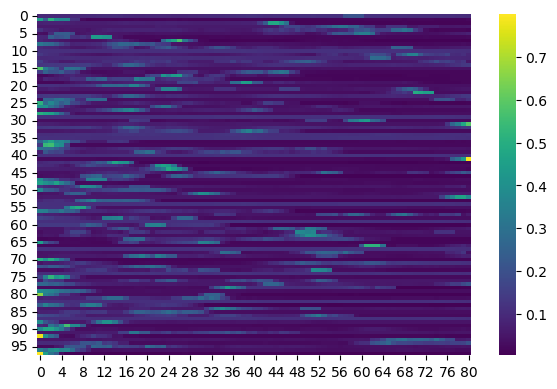

In [ ]:
figure=plt.figure(figsize=(6,4))
# ax=sns.heatmap(data=atten_gene_all[7][690:740], cmap="viridis")
ax=sns.heatmap(data=atten_gene_all[7][782:880], cmap="viridis")
plt.tight_layout()
plt.savefig("../database/figs/attend_mat_rpkm50_or_not02.pdf",format="pdf")
plt.show()

In [ ]:
sorted(file_gene_all)

['../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm10_or_exp/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm10_or_not/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm20_or_exp/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm20_or_not/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm30_or_exp/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm30_or_not/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm50_or_exp/atten.npy',
 '../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm50_or_not/atten.npy']

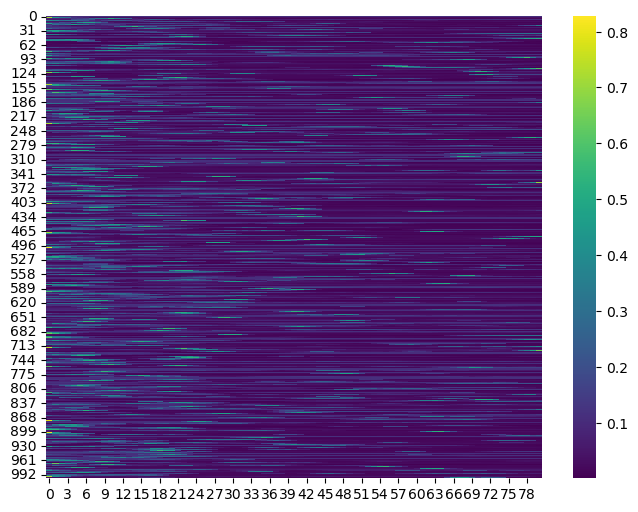

In [ ]:
figure=plt.figure(figsize=(8,6))
ax=sns.heatmap(data=atten_gene_all[5], cmap="viridis")

In [ ]:
file_gene_all[4]

'../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm30_or_exp/atten.npy'

In [ ]:
file_gene_all[5]

'../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm30_or_not/atten.npy'

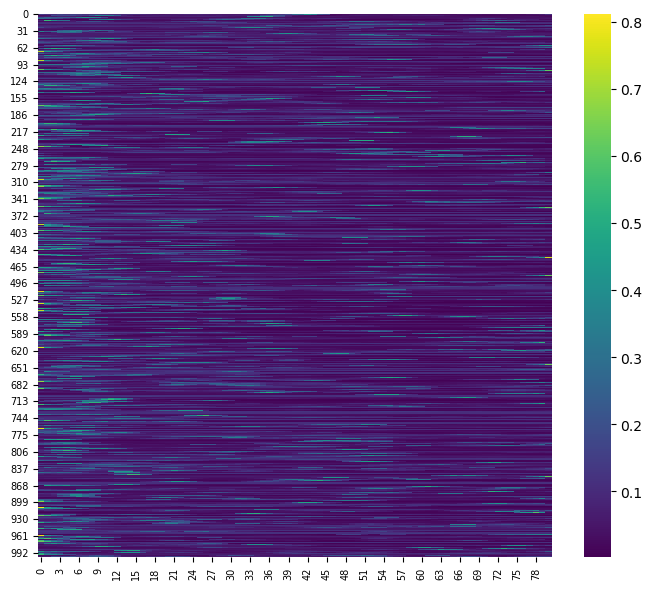

In [ ]:
figure=plt.figure(figsize=(7,6))
ax=sns.heatmap(data=atten_gene_all[4], cmap="viridis")
# For x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
# For y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
# Set a tight layout
plt.tight_layout()
plt.savefig("../database/figs/attend_mat_rpkm30_or_exp.pdf",format="pdf")
plt.show()

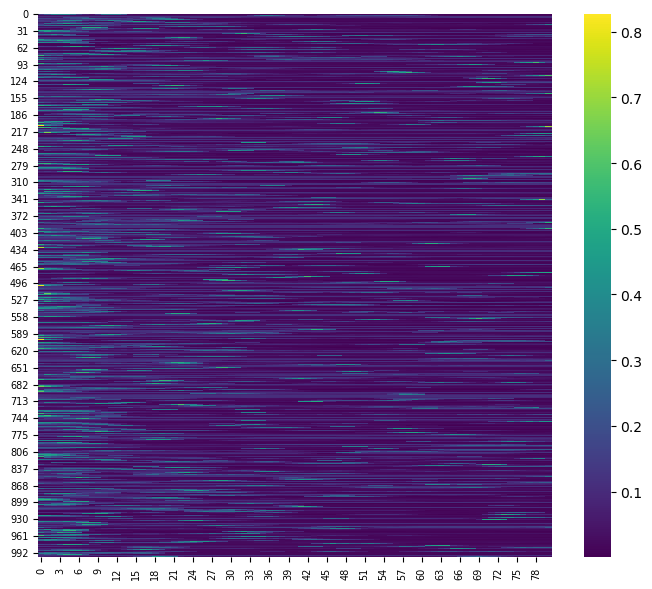

In [ ]:
figure=plt.figure(figsize=(7,6))
ax=sns.heatmap(data=atten_gene_all[5], cmap="viridis")
# For x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
# For y-axis labels
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
# Set a tight layout
plt.tight_layout()
plt.savefig("../database/figs/attend_mat_rpkm30_or_not.pdf",format="pdf")
plt.show()

In [ ]:
figure=plt.figure(figsize=(8,6))
ax=sns.heatmap(data=atten_gene_all[5], cmap="viridis")

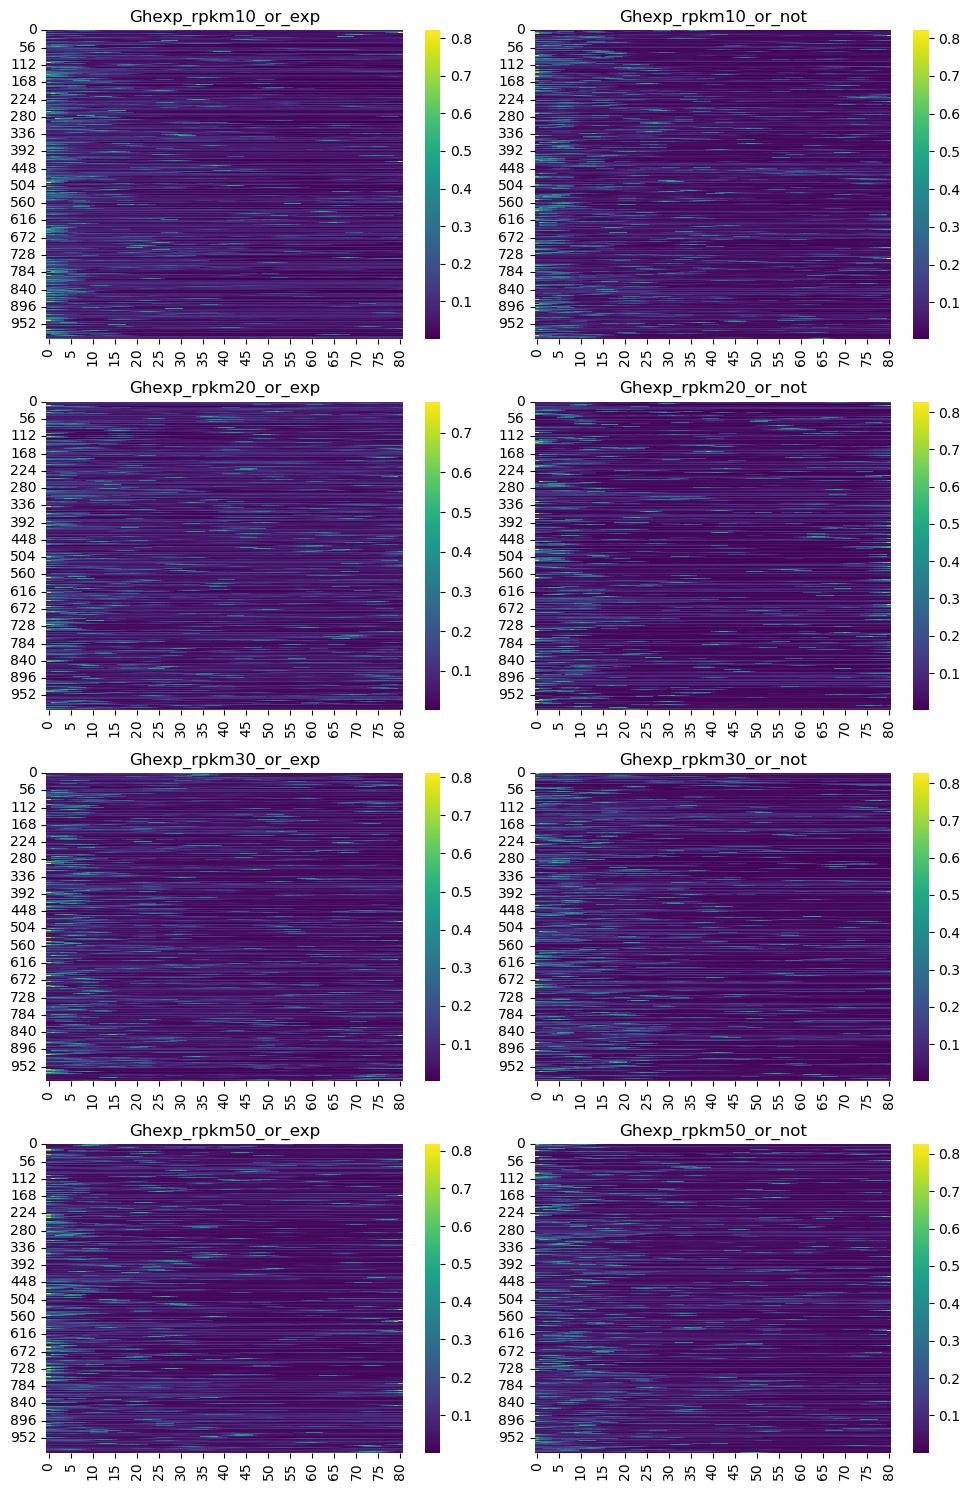

In [ ]:
titles=file_lst
# Create a grid of 4x2 subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 15))
# Flatten the axes array, to easily iterate over it
axs = axs.flatten()
# For each dataframe and corresponding subplot
for df, ax, title in zip(atten_gene_all, axs, titles):
    # Draw a heatmap on the subplot
    sns.heatmap(df, ax=ax, cmap='viridis')
    ax.set_title(title)

# Set a tight layout
plt.tight_layout()

plt.savefig("../database/figs/attend_mat_gene_exp_all.pdf",format="pdf")  # file size ~ 15 MB
# plt.savefig("test_fig.svg",format="svg")  # file size~ 115 MB
# Show the plot
plt.show()

In [ ]:
titles=file_lst
# Create a grid of 4x2 subplots
fig, axs = plt.subplots(4, 2, figsize=(10, 4))
# Flatten the axes array, to easily iterate over it
axs = axs.flatten()
# For each dataframe and corresponding subplot
atten_gene_2=
for df, ax, title in zip(atten_gene_all, axs, titles):
    # Draw a heatmap on the subplot
    sns.heatmap(df, ax=ax, cmap='viridis')
    ax.set_title(title)

# Set a tight layout
plt.tight_layout()

plt.savefig("../database/figs/attend_mat_gene_exp_all.pdf",format="pdf")  # file size ~ 15 MB
# plt.savefig("test_fig.svg",format="svg")  # file size~ 115 MB
# Show the plot
plt.show()

In [ ]:
dev=pd.read_csv("../database/fine_tune/CompG_and_lessCompG/4mer/dev.tsv", sep="\t")
dev

sequence  label
0    DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD D...      1
1    OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO O...      0
2    AAAA AAAA AAAA AAAA AAAA AAAA AAAE AAEE AEEE E...      1
3    EEED EEDD EDDD DDDD DDDD DDDD DDDD DDDD DDDD D...      1
4    OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO O...      0
..                                                 ...    ...
995  AAAA AAAA AAAA AAAA AAAE AAEE AEEE EEEE EEEE E...      1
996  GGGG GGGG GGGG GGGG GGGG GGGG GGGG GGGG GGGG G...      1
997  JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ J...      0
998                                     AAAA AAAA AAAA      1
999  OIII IIII IIII IIII IIII IIII IIII IIII IIII I...      0

[1000 rows x 2 columns]

In [ ]:
pred_4_compless_npy = np.load("../database/ft_result/pred/4_compless/pred_results.npy")

In [ ]:
test_pd=dev

In [ ]:
test_pd["pred"]=pred_4_compless_npy

In [ ]:
test_pd

sequence  label      pred
0    DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD DDDD D...      1  0.999400
1    OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO O...      0  0.000394
2    AAAA AAAA AAAA AAAA AAAA AAAA AAAE AAEE AEEE E...      1  0.999416
3    EEED EEDD EDDD DDDD DDDD DDDD DDDD DDDD DDDD D...      1  0.999371
4    OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO OOOO O...      0  0.000394
..                                                 ...    ...       ...
995  AAAA AAAA AAAA AAAA AAAE AAEE AEEE EEEE EEEE E...      1  0.999411
996  GGGG GGGG GGGG GGGG GGGG GGGG GGGG GGGG GGGG G...      1  0.999406
997  JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ JJJJ J...      0  0.999412
998                                     AAAA AAAA AAAA      1  0.999393
999  OIII IIII IIII IIII IIII IIII IIII IIII IIII I...      0  0.000394

[1000 rows x 3 columns]

In [ ]:
fail_lst=[]
for i in range(len(test_pd)):
    if abs(test_pd["label"].iloc[i]-test_pd["pred"].iloc[i])>=0.2:
        print(i, test_pd["label"].iloc[i],test_pd["pred"].iloc[i])
        fail_lst.append(i)
print("--------------------")
print("total: {} out of {}".format(len(fail_lst),len(test_pd)))
print("Probability for dev.tsv: ",(len(test_pd)-len(fail_lst))/len(test_pd))

61 1 0.0003933963
116 1 0.00053799304
122 0 0.9962845
127 0 0.99920505
211 1 0.00042095644
214 1 0.7531135
264 1 0.0019817066
266 0 0.9993875
267 1 0.7681141
304 0 0.9992514
379 0 0.9993538
406 0 0.99374616
455 0 0.99895006
510 1 0.022724427
668 0 0.9994105
781 0 0.999408
796 1 0.00408655
847 1 0.66559213
927 0 0.99811196
928 0 0.9988588
930 1 0.7957156
944 0 0.9992508
997 0 0.9994122
--------------------
total: 23 out of 1000
Probability for dev.tsv:  0.977


In [ ]:
def pred_prob_overall(dev_path,pred_path, file_id, color1="Blues",color2_lst=["yellowgreen","skyblue","teal","royalblue"]):
    pred=np.load(pred_path)
    dev=pd.read_csv(dev_path, sep="\t")
    dev["pred"]=pred
    dev["pred_bool"]=None
    df=dev
    
    file_output_path="../database/figs/"
    
    assert type(color2_lst) and len(color2_lst)==4, "enter a list of 4 elements, as color names"
    
    # confusion matrix #
    for i in range(len(df)):
        if df["pred"].at[i]>=0.5 :
            df["pred_bool"].at[i]=1
        else:
            df["pred_bool"].at[i]=0
    assert df["pred_bool"].isnull().any()==False, "Check the pred_bool"
    cf_matrix=confusion_matrix(df["label"],df["pred_bool"].astype(bool))

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
#     group_percentages = ["({0:.2%})".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
#     labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
#     labels = np.asarray(labels).reshape(2,2)
########## for visualize with normalization per case####################
    group_percentages = []
    for i in range(cf_matrix.shape[0]):
        for value in cf_matrix[i]:
            group_percentages.append("({0:.2%})".format(value / cf_matrix[i].sum()))

    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
######################################################################
    
    # confusion matrix visualization
    sns.heatmap(cf_matrix, annot=labels, annot_kws={'size': 16}, fmt='', cmap=color1)
    
    ############### save the figure 1 ###############
    file_name1=file_output_path+file_id+'_confusion_matrix.pdf'
    plt.savefig(file_name1, format='pdf', bbox_inches='tight')
    #################################################
    print(classification_report(df["label"], df["pred_bool"].astype(bool)))
    
    high_prob, low_prob=[],[]
    label_1, label_0=[],[]
    high_1, high_0=[],[]
    low_1, low_0=[],[]

    for i in range(len(df)):
        # high_prob is defined as larger than 0.5       
        if df["pred"].iloc[i]>=0.5:
            high_prob.append(df["pred"].iloc[i])
            label_1.append(df["label"].iloc[i])
            if df["label"].iloc[i]==1:  # predition is higher than 0.5(=true), and label is 1 (=true): true positive
                high_1.append(df["pred"].iloc[i])
            else:
                high_0.append(df["pred"].iloc[i])    
        else:
            low_prob.append(df["pred"].iloc[i])
            label_0.append(df["label"].iloc[i])
            if df["label"].iloc[i]==0: # predition is lower than 0.5(=false), and label is 0 (=false): true negative
                low_0.append(df["pred"].iloc[i])
            else:
                low_1.append(df["pred"].iloc[i])

#     print("false positive: {} |  false negative: {}".format(false_positive,false_negative))
    high_pred=pd.DataFrame({'label': label_1, 'pred': high_prob})
    low_pred=pd.DataFrame({'label': label_0, 'pred': low_prob})

    fig=plt.figure(figsize=(8,8))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)
    plt.subplot(2, 2, 1)
    sns.violinplot(data=high_prob, color=color2_lst[0])
    plt.title('High Probability', fontsize=13)
    plt.xticks([])
    plt.xlabel("predition >= 0.5", fontsize=13)
    plt.ylabel("Prediction", fontsize=13)

    plt.subplot(2, 2, 2)
    sns.violinplot(data=low_prob, color=color2_lst[1])
    plt.title('Low Probability', fontsize=13)
    plt.xticks([])
    plt.xlabel("predition < 0.5", fontsize=13)
    plt.ylabel("Prediction", fontsize=13)
    
    plt.subplot(2, 2, 3)
    sns.violinplot(data=high_1, color=color2_lst[2])
    plt.title('True positive', fontsize=13)
    plt.xticks([])
    plt.xlabel("For label 1", fontsize=13)
    plt.ylabel("Prediction", fontsize=13)
    
    plt.subplot(2, 2, 4)
    sns.violinplot(data=low_0, color=color2_lst[3])
    plt.title('True negative', fontsize=13)
    plt.xticks([])
    plt.xlabel("For label 0", fontsize=13)
    plt.ylabel("Prediction", fontsize=13)
    
    ############### save the figure 2 ###############
    file_name2=file_output_path+file_id+'_violinplot.pdf'
    plt.savefig(file_name2, format='pdf', bbox_inches='tight')
    #################################################

    plt.show()

    return high_pred,low_pred

In [ ]:
dev_path="../database/fine_tune/genic_and_intergenic/4mer/dev.tsv"
pred_path="../database/ft_result/pred/4_GnG/pred_results.npy"

              precision    recall  f1-score   support

           0       0.76      0.88      0.81       514
           1       0.84      0.71      0.77       486

    accuracy                           0.79      1000
   macro avg       0.80      0.79      0.79      1000
weighted avg       0.80      0.79      0.79      1000



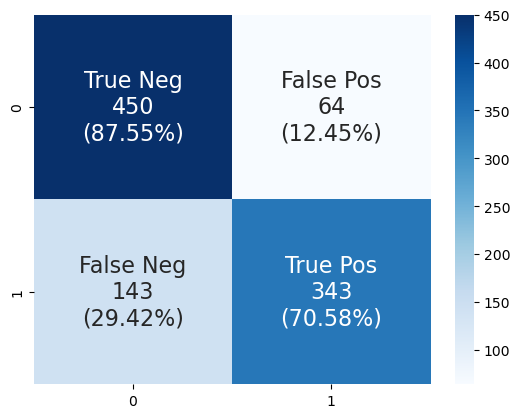

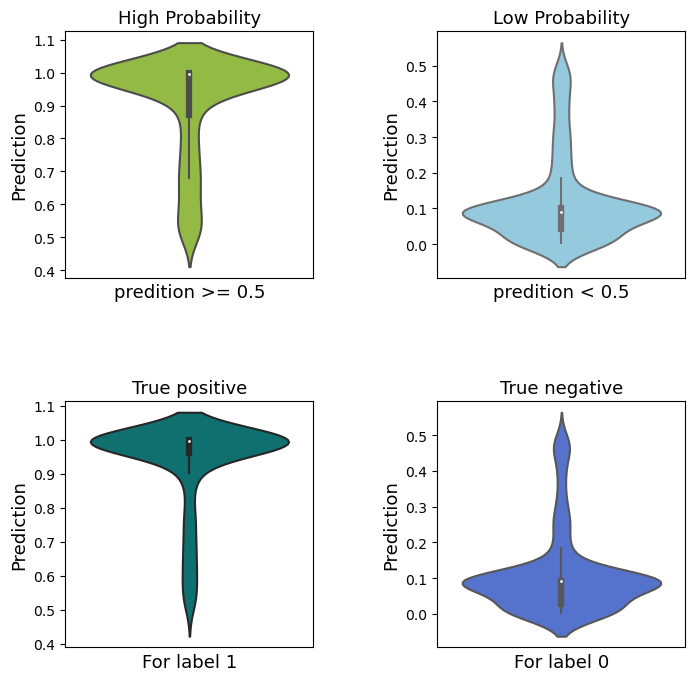

In [ ]:
high_pred,low_pred=pred_prob_overall(dev_path,pred_path,file_id="GnG")

In [ ]:
dev_path="../database/fine_tune/CompG_and_lessCompG/4mer/dev.tsv"
pred_path="../database/ft_result/pred/4_compless/pred_results.npy"

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       498
           1       0.97      0.99      0.98       502

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



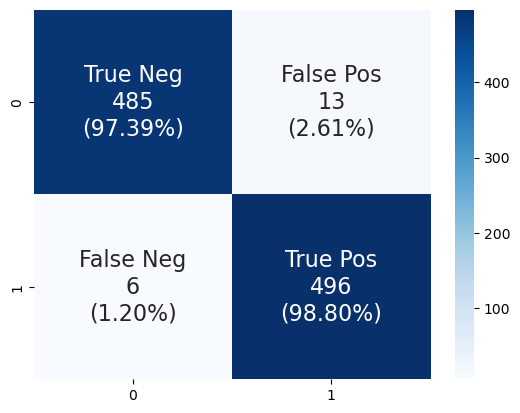

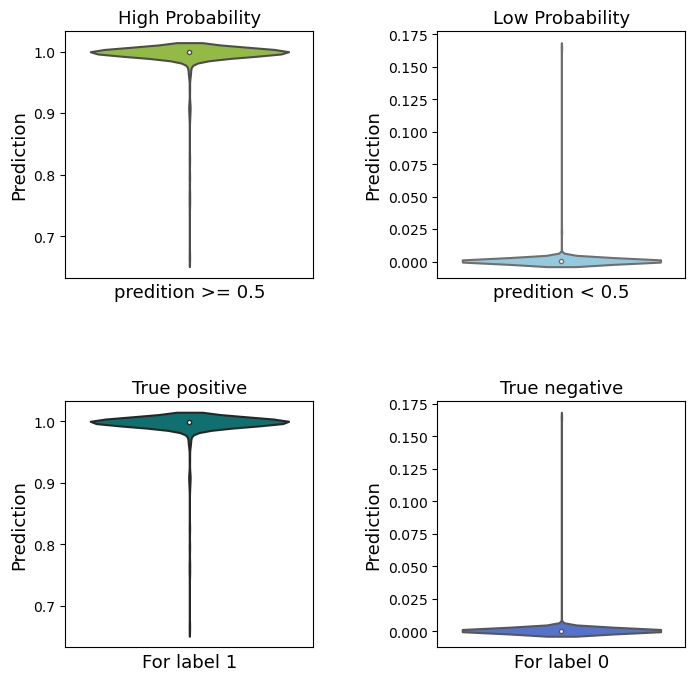

In [ ]:
high_pred,low_pred=pred_prob_overall(dev_path,pred_path, file_id="comp_less")

In [ ]:
dev_path2="../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv"
pred_path2="../database/ft_result/pred/4_compNg/pred_results.npy"

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       484
           1       0.93      0.97      0.95       516

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



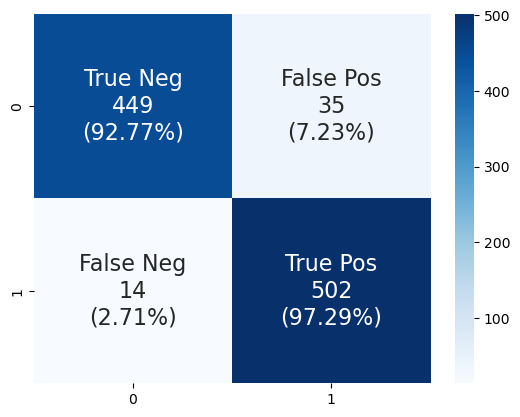

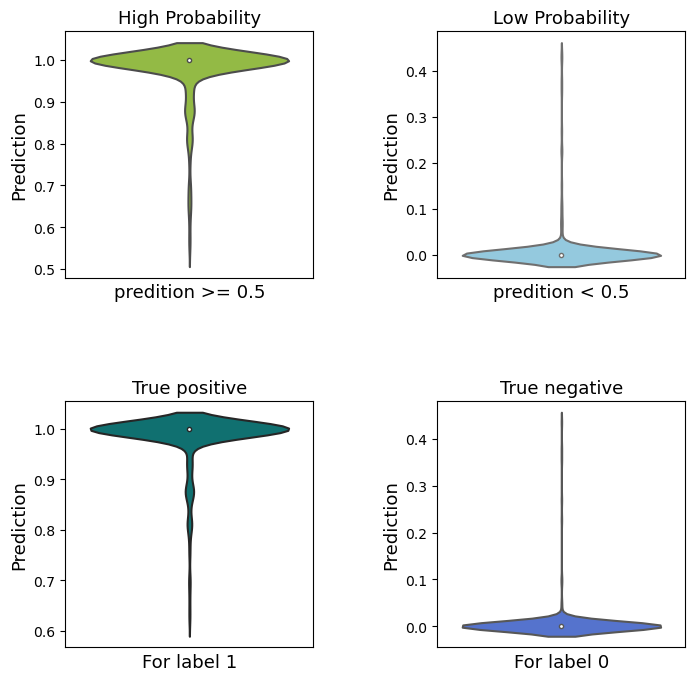

In [ ]:
high_pred,low_pred=pred_prob_overall(dev_path2,pred_path2, file_id="compNg")

In [ ]:
dev_path="../database/fine_tune/gene_exp/4mer/Ghexp_rpkm10_or_exp/tr_len_40k/dev.tsv"
pred_path="../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm10_or_exp/pred_results.npy"

In [ ]:
pred_path.split("/")[-2]

'Ghexp_rpkm10_or_exp'

In [ ]:
dev_path_pre="../database/fine_tune/gene_exp/4mer/"
dev_path_suf="/tr_len_40k/dev.tsv"
dev_path_mid_lst=sorted([item for item in os.listdir(dev_path_pre) if "rpkm" in item])

In [ ]:
pred_path_pre="../database/ft_result/pred/4_gene_exp/test02_double_data/"
pred_path_suf="/pred_results.npy"
pred_path_mid_lst=sorted([item for item in os.listdir(pred_path_pre) if "rpkm" in item])

In [ ]:
def vis_template_pred_prob_overall(dev_path_pre,pred_path_pre):
    dev_path_suf="/tr_len_40k/dev.tsv"
    dev_path_mid_lst=sorted([item for item in os.listdir(dev_path_pre) if "rpkm" in item])
    dev_path=[os.path.join(dev_path_pre,elm)+dev_path_suf for elm in dev_path_mid_lst]
    
    pred_path_suf="/pred_results.npy"
    pred_path_mid_lst=sorted([item for item in os.listdir(pred_path_pre) if "rpkm" in item])
    pred_path=[os.path.join(pred_path_pre,elm)+pred_path_suf for elm in pred_path_mid_lst] 
    
    assert len(dev_path)==len(pred_path), "length discrepancy: check the number of dev_path and pred_path."
    for i in range(len(dev_path)):
        dev=dev_path[i]
        pred=pred_path[i]
        assert dev.split("/")[-3]==pred.split("/")[-2], "file name discrepandy: check dev and pred file names."
        print("-------------------")
        print(dev.split("/")[-3])
        print("-------------------")
        high_pred,low_pred=pred_prob_overall(dev,pred)
    
    return None

In [ ]:
vis_template_pred_prob_overall(dev_path_pre,pred_path_pre)

-------------------
Ghexp_rpkm10_or_exp
-------------------


TypeError: pred_prob_overall() missing 1 required positional argument: 'file_id'

In [ ]:
dev_path2="../database/fine_tune/CompG_and_intergenic/4mer/dev.tsv"
pred_path2="../database/ft_result/pred/4_compNg/pred_results.npy"
high_pred,low_pred=pred_prob_overall(dev_path2,pred_path2, file_id="compNg")

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       519
           1       0.72      0.72      0.72       481

    accuracy                           0.73      1000
   macro avg       0.73      0.73      0.73      1000
weighted avg       0.73      0.73      0.73      1000



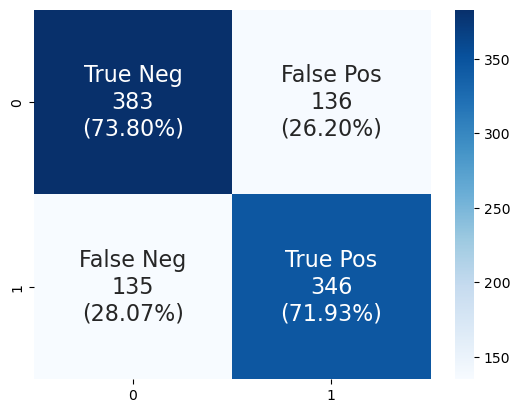

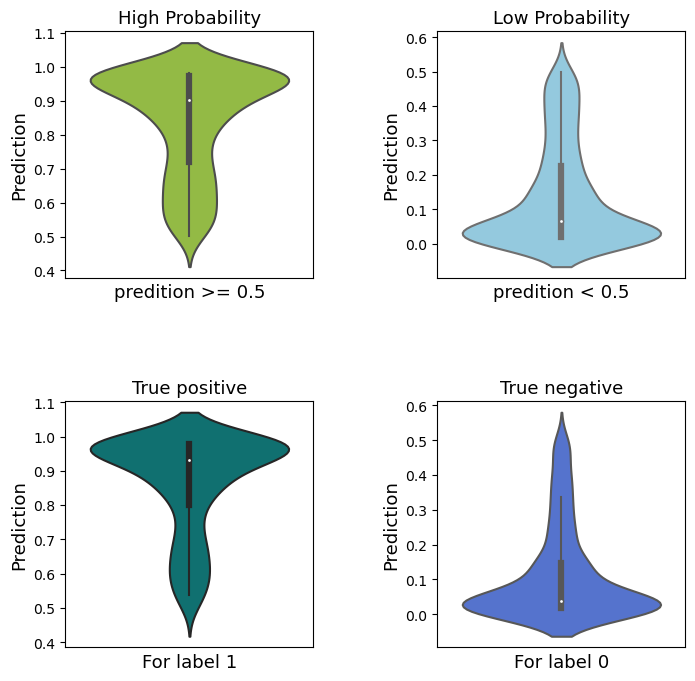

In [ ]:
dev_path10="../database/fine_tune/gene_exp/4mer/Ghexp_rpkm10_or_not/tr_len_40k/dev.tsv"
pred_path10="../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm10_or_not/pred_results.npy"
high_pred10,low_pred10=pred_prob_overall(dev_path10,pred_path10, file_id="exp10_not")

              precision    recall  f1-score   support

           0       0.75      0.79      0.77       485
           1       0.79      0.75      0.77       515

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



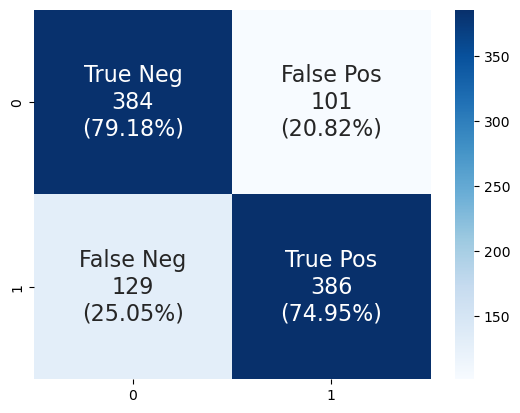

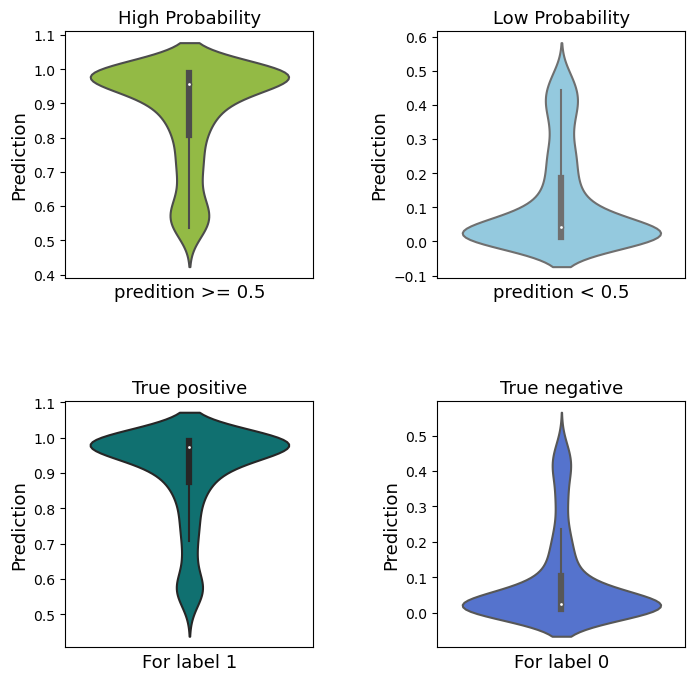

In [ ]:
dev_path20="../database/fine_tune/gene_exp/4mer/Ghexp_rpkm20_or_not/tr_len_40k/dev.tsv"
pred_path20="../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm20_or_not/pred_results.npy"
high_pred20,low_pred20=pred_prob_overall(dev_path20,pred_path20, file_id="exp20_not")

              precision    recall  f1-score   support

           0       0.81      0.86      0.83       483
           1       0.86      0.81      0.83       517

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.83      0.83      0.83      1000



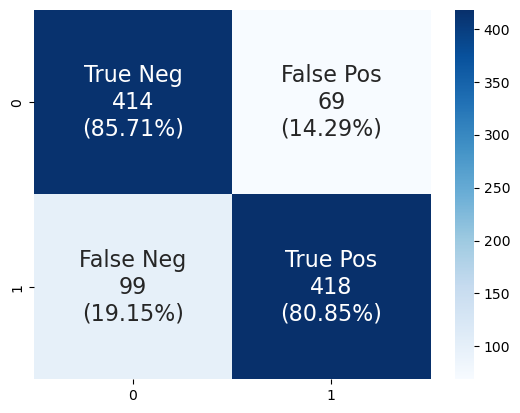

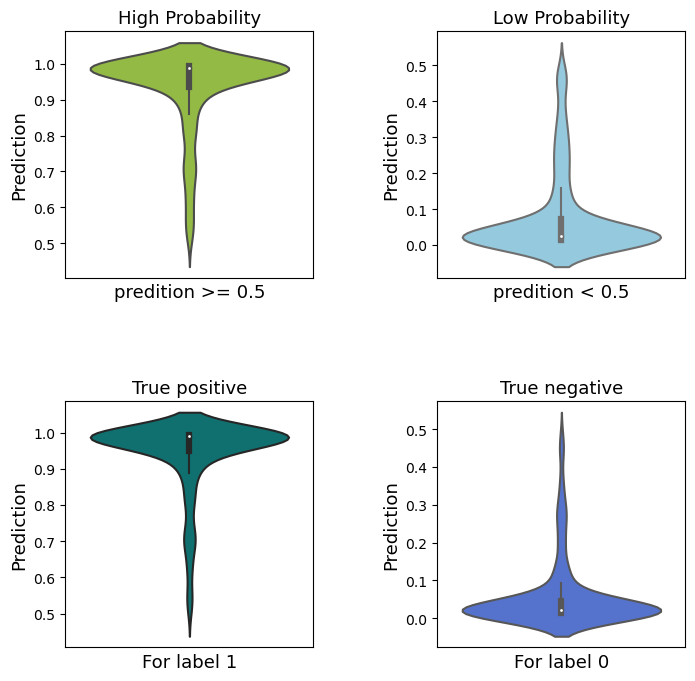

In [ ]:
dev_path30="../database/fine_tune/gene_exp/4mer/Ghexp_rpkm30_or_not/tr_len_40k/dev.tsv"
pred_path30="../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm30_or_not/pred_results.npy"
high_pred30,low_pred30=pred_prob_overall(dev_path30,pred_path30, file_id="exp30_not")

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       507
           1       0.88      0.85      0.86       493

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.87      0.87      0.87      1000



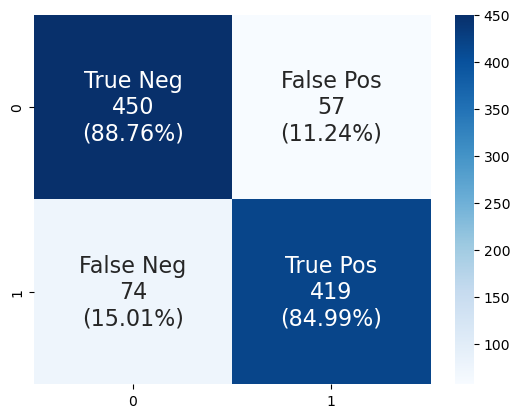

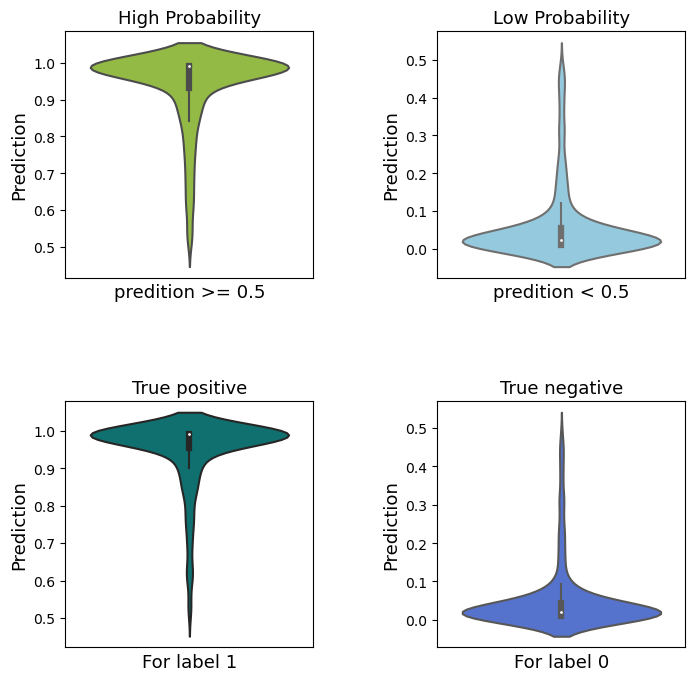

In [ ]:
dev_path50="../database/fine_tune/gene_exp/4mer/Ghexp_rpkm50_or_not/tr_len_40k/dev.tsv"
pred_path50="../database/ft_result/pred/4_gene_exp/test02_double_data/Ghexp_rpkm50_or_not/pred_results.npy"
high_pred50,low_pred50=pred_prob_overall(dev_path50,pred_path50, file_id="exp50_not")

In [ ]:
for dev in [os.path.join(dev_path_pre,elm)+dev_path_suf for elm in dev_path_mid_lst]:
    dev_file=dev
for pred in [os.path.join(pred_path_pre,elm)+pred_path_suf for elm in pred_path_mid_lst]:
    pred_file=pred

In [ ]:
dev_file.split("/")[-3]

'Ghexp_rpkm50_or_not'

In [ ]:
pred_file.split("/")[-2]

'Ghexp_rpkm50_or_not'

In [ ]:
high_pred,low_pred=pred_prob_overall(dev_path,pred_path)

TypeError: pred_prob_overall() missing 1 required positional argument: 'file_id'

In [ ]:
high_pred

label      pred
0        1  0.999400
1        1  0.999416
2        1  0.999371
3        1  0.999414
4        1  0.999417
..     ...       ...
504      1  0.999415
505      1  0.999411
506      1  0.999406
507      0  0.999412
508      1  0.999393

[509 rows x 2 columns]

In [ ]:
pred_4_compless_npy.shape

(1000,)

(array([490.,   1.,   0.,   0.,   0.,   0.,   1.,   3.,   2., 503.]),
 array([3.8895797e-04, 1.0029192e-01, 2.0019490e-01, 3.0009785e-01,
        4.0000081e-01, 4.9990380e-01, 5.9980673e-01, 6.9970971e-01,
        7.9961270e-01, 8.9951563e-01, 9.9941862e-01], dtype=float32),
 <BarContainer object of 10 artists>)

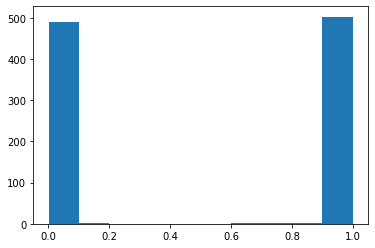

In [ ]:
plt.hist(pred_4_compless_npy)

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np

# Create an image with a white background
width = 800
height = 200
image = Image.new('RGB', (width, height), (255, 255, 255))
draw = ImageDraw.Draw(image)

# Define a list of characters and their corresponding probabilities
alphabet = ['A', 'B', 'C', 'D']
probabilities = [0.2, 0.3, 0.1, 0.4]

# Scale the probabilities to the width of the image
scaled_probabilities = [p * width for p in probabilities]

# Define a color for each character
colors = {'A': (255, 0, 0), 'B': (0, 255, 0), 'C': (0, 0, 255), 'D': (255, 255, 0)}

# Define the font
font = ImageFont.truetype("/Library/Fonts/Arial.ttf", 300)

# Draw the characters on the image
for i in range(len(alphabet)):
    x1 = sum(scaled_probabilities[:i])
    x2 = x1 + scaled_probabilities[i]
    font_size = int(300 * probabilities[i])
    font = ImageFont.truetype("/Library/Fonts/Arial.ttf", font_size)
    draw.text((x1 + (x2-x1)/2, height/2), alphabet[i], fill=colors[alphabet[i]], font=font, align="center")

# Save the image
image.save('motif.png')
